# Open-Meteo API data Analysis (Nashville, TN)

# Geolocation of Las Vegas, NV and Nashville, TN

   longitude  latitude  value                   geometry
0  -115.1391   36.1716     10  POINT (-115.1391 36.1716)
1   -86.7816   36.1627     20   POINT (-86.7816 36.1627)


<Axes: title={'center': 'Geolocation of Las Vegas and Nashville'}>

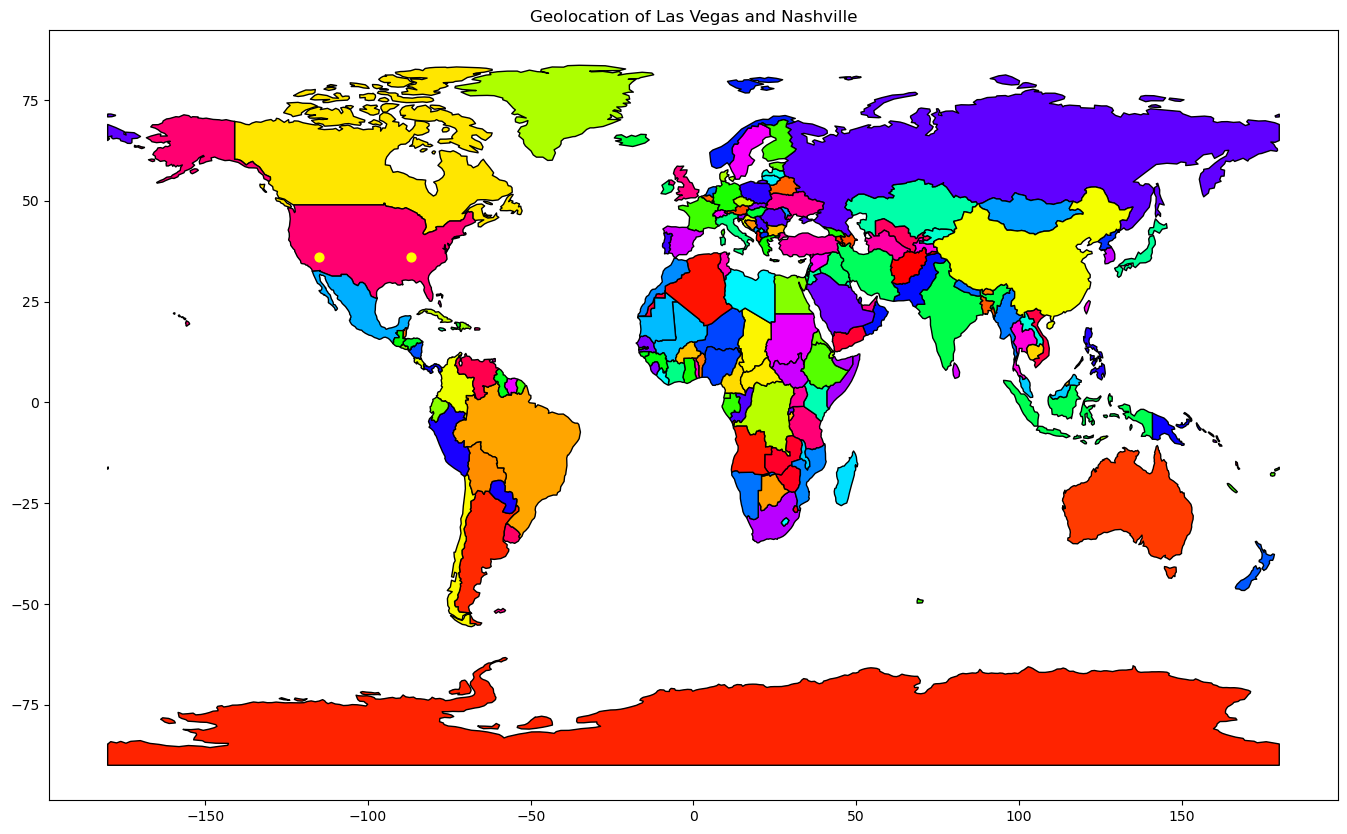

In [155]:
# Visualize geolocation by Latitude and Longitude of Las Vegas and Nashville
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

# Load a world map shapefile (built-in dataset)
world = gpd.read_file(r'110m_cultural\ne_110m_admin_0_countries.shp')
worldpop = gpd.read_file(r'110m_cultural\ne_110m_populated_places.shp')

#    a. Las Vegas (dry), coord: 36.1716° N, 115.1391° W
#    b. Nashville (wet), coord: 36.1627° N, 86.7816° W

data = {'longitude': [-115.1391, -86.7816],
        'latitude': [36.1716, 36.1627],
        'value': [10, 20]}

df = pd.DataFrame(data)

# Create geometry column
geometry = gpd.points_from_xy(df['longitude'], df['latitude'], crs="EPSG:4326")

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

print(gdf)

# # Plotting multiple layers
fig, ax = plt.subplots()
plt.title('Geolocation of Las Vegas and Nashville')
world.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'SOVEREIGNT')
gdf.plot(ax = ax, color = 'yellow', markersize = 40)  # The location of Las Vegas and Nashville can be seen as yellow dots in the map

C:\ProgramData\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\ProgramData\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

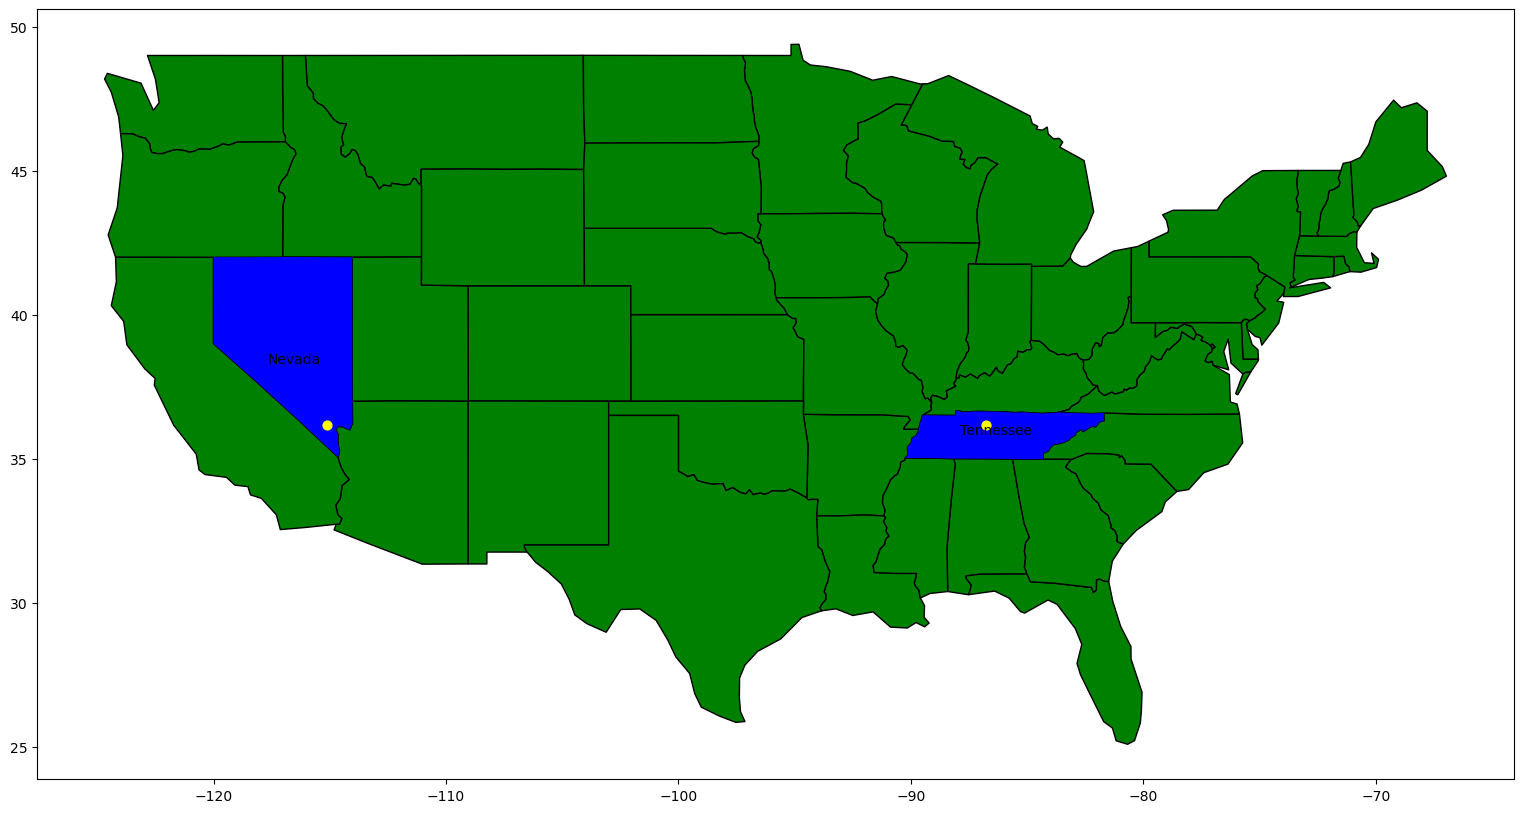

In [156]:
# Visualize Las Vegas (and Nevada) and Nashville (and Tennessee)
# States are depicted with blue color
# Cities are depicted with yellow color
stateprov = gpd.read_file(r'110m_cultural\ne_110m_admin_1_states_provinces.shp')
usamain = stateprov[stateprov["name"] != "Alaska"]
usamain = usamain[usamain["name"] != "Hawaii"]
nevada = stateprov[stateprov["name"] == "Nevada"]
tennessee = stateprov[stateprov["name"] == "Tennessee"]

# Add Column 'coords' for labelling
nevada['coords'] = nevada['geometry'].apply(lambda x: x.representative_point().coords[:])
nevada['coords'] = [coords[0] for coords in nevada['coords']]
tennessee['coords'] = tennessee['geometry'].apply(lambda x: x.representative_point().coords[:])
tennessee['coords'] = [coords[0] for coords in tennessee['coords']]

# # Plotting multiple layers
fig, ax = plt.subplots()

for idx, row in nevada.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')

for idx, row in tennessee.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')
    
usamain.plot(ax = ax, color='green', edgecolor = 'black')
nevada.plot(ax = ax, color = 'blue', markersize = 40)
tennessee.plot(ax = ax, color = 'blue', markersize = 40)
gdf.plot(ax = ax, color = 'yellow', markersize = 40)

In [157]:
stateprov = gpd.read_file(r'110m_cultural\ne_110m_admin_1_states_provinces.shp')
print(stateprov.head((2)))
stateprov.columns

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   

                                wikipedia iso_a2  adm0_sr       name  \
0  http://en.wikipedia.org/wiki/Minnesota     US        1  Minnesota   
1    http://en.wikipedia.org/wiki/Montana     US        1    Montana   

   name_alt name_local   type type_en code_local code_hasc  note hasc_maybe  \
0  MN|Minn.       None  State   State       US27     US.MN  None       None   
1  MT|Mont.       None  State   State       US30     US.MT  None       None   

    region region_cod  provnum_ne  gadm_level  check_me  datarank abbrev  \
0  Midwest       None           0           1        20         1  Minn.   
1     West       None           0           1        20         1  Mont.   

  postal  area_sqkm  sameascity  labelrank  name_len  mapcolor9  mapcolor13  \
0     MN          0         -99       

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [279]:
# Maps of Nashville
import pandas as pd
import geopandas as gpd
gdf = gpd.read_file("cities.geojson")
nashvilledf = gdf.loc[gdf['NAME'].isin(['NASHVILLE'])]

# Remove all unwanted Nashvilles, just leave the one with Index 23012, Nashville in Tennessee state.
# We use drop Method coz this Method doesn't change the GeoDataframe into Series.
# If we use .iloc or .loc Method, it will change the GeoDataframe into Series.
nashvilledf = nashvilledf.drop(20793)
nashvilledf = nashvilledf.drop(22744)
nashvilledf = nashvilledf.drop(23065)
nashvilledf = nashvilledf.drop(23759)

nashvilledf.explore()

# Open-Meteo Data Analysis

In [159]:
# Read from the CSV file
import pandas as pd
import matplotlib.pyplot as plt
path1 = 'openmeteo_data_nashville_tn.csv'
df1 = pd.read_csv(path1)
df1

Unnamed: 0                       date  temperature_2m  \
0              0  2025-02-23 00:00:00+00:00             NaN   
1              1  2025-02-23 01:00:00+00:00             NaN   
2              2  2025-02-23 02:00:00+00:00             NaN   
3              3  2025-02-23 03:00:00+00:00             NaN   
4              4  2025-02-23 04:00:00+00:00             NaN   
...          ...                        ...             ...   
2227        2227  2025-05-26 19:00:00+00:00         21.5025   
2228        2228  2025-05-26 20:00:00+00:00         21.9025   
2229        2229  2025-05-26 21:00:00+00:00         22.0025   
2230        2230  2025-05-26 22:00:00+00:00         21.5525   
2231        2231  2025-05-26 23:00:00+00:00         20.8025   

      relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                      NaN           NaN                   NaN   
1                      NaN           NaN                   NaN   
2                      NaN           NaN                   NaN   
3                      NaN           NaN                   NaN   
4                      NaN           NaN                   NaN   
...                    ...           ...                   ...   
2227                  76.0     17.093630             23.275127   
2228                  77.0     17.687681             23.821278   
2229                  76.0     17.577087             23.358010   
2230                  75.0     16.932825             22.161495   
2231                  75.0     16.208752             21.156380   

      precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                           0.0            NaN   NaN      NaN           NaN   
1                           0.0            NaN   NaN      NaN           NaN   
2                           0.0            NaN   NaN      NaN           NaN   
3                           0.0            NaN   NaN      NaN           NaN   
4                           0.0            NaN   NaN      NaN           NaN   
...                         ...            ...   ...      ...           ...   
2227                        3.0            0.0   0.0      0.0        1018.7   
2228                        2.0            0.0   0.0      0.0        1018.1   
2229                        3.0            0.0   0.0      0.0        1017.5   
2230                        6.0            0.0   0.0      0.0        1017.1   
2231                       10.0            0.0   0.0      0.0        1017.1   

      surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0                  NaN          NaN              NaN              NaN   
1                  NaN          NaN              NaN              NaN   
2                  NaN          NaN              NaN              NaN   
3                  NaN          NaN              NaN              NaN   
4                  NaN          NaN              NaN              NaN   
...                ...          ...              ...              ...   
2227        1000.24040        100.0            100.0             33.0   
2228         999.67584        100.0             98.0            100.0   
2229         999.09290        100.0            100.0            100.0   
2230         998.67255        100.0             74.0            100.0   
2231         998.62580        100.0             71.0            100.0   

      cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0                  NaN         NaN             NaN                     NaN   
1                  NaN         NaN             NaN                     NaN   
2                  NaN         NaN             NaN                     NaN   
3                  NaN         NaN             NaN                     NaN   
4                  NaN         NaN             NaN                     NaN   
...                ...         ...             ...                     ...   
2227              90.0     21100.0        5.091168                   0.265   
2228  

In [160]:
# Remove Duplicate data from raw table
df1 = df1.drop_duplicates()

# Drop/remove all entries with blanks
# df.dropna(subset='temperature_2m', inplace=True)
# df.dropna(subset='relative_humidity_2m', inplace=True)
df1.dropna(inplace=True)

In [161]:
# Set to display all columns
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (12, 8)

# Check whether there's still any blank rows/columns
df1[df1.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, date, temperature_2m, relative_humidity_2m, dew_point_2m, apparent_temperature, precipitation_probability, precipitation, rain, showers, pressure_msl, surface_pressure, cloud_cover, cloud_cover_low, cloud_cover_mid, cloud_cover_high, visibility, wind_speed_10m, soil_moisture_0_to_1cm, soil_moisture_1_to_3cm, soil_moisture_3_to_9cm, soil_moisture_9_to_27cm, soil_moisture_27_to_81cm, evapotranspiration, snowfall, snow_depth, et0_fao_evapotranspiration, vapour_pressure_deficit, wind_speed_80m, wind_speed_120m, wind_speed_180m, wind_direction_10m, wind_direction_80m, wind_direction_120m, wind_direction_180m, temperature_80m, temperature_120m, temperature_180m, soil_temperature_0cm, soil_temperature_6cm, soil_temperature_18cm, soil_temperature_54cm, wind_gusts_10m]
Index: []

In [162]:
# Add Column 'Location'
df1['Location'] = 'Nashville'

# Split the Date into Year, Month and Date
df1[['ymd','hmstz']] = df1['date'].str.split(' ', expand=True)
df1[['year','month','day']] = df1['ymd'].str.split('-', expand=True)
df1[['hour','minute','sectz','tzsec']] = df1['hmstz'].str.split(':', expand=True)

In [163]:
# Find out the correlation among Columns to filter what Columns we'll use for analysis
# For first glance, we filter out by common logic, what Columns are possible to have strong enough correlations.
# We choose a bunch of Columns specified with Index numbers or to be more humanly readable, the Columns name.
df1h = df1[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m',
            'dew_point_2m','vapour_pressure_deficit','temperature_2m','cloud_cover_high','cloud_cover_low','wind_speed_10m',
            'soil_moisture_3_to_9cm','temperature_80m','soil_temperature_0cm']]
df1h

precipitation_probability  cloud_cover_mid  soil_moisture_0_to_1cm  \
581                         0.0              0.0                   0.233   
582                         0.0              0.0                   0.232   
583                         0.0              0.0                   0.232   
584                         0.0              0.0                   0.232   
585                         0.0              0.0                   0.232   
...                         ...              ...                     ...   
2227                        3.0             33.0                   0.265   
2228                        2.0            100.0                   0.262   
2229                        3.0            100.0                   0.261   
2230                        6.0            100.0                   0.260   
2231                       10.0            100.0                   0.259   

      soil_moisture_1_to_3cm  relative_humidity_2m  dew_point_2m  \
581                    0.240                  53.0      7.163813   
582                    0.240                  53.0      7.071089   
583                    0.240                  57.0      7.343195   
584                    0.240                  59.0      7.379331   
585                    0.240                  61.0      7.208212   
...                      ...                   ...           ...   
2227                   0.269                  76.0     17.093630   
2228                   0.266                  77.0     17.687681   
2229                   0.264                  76.0     17.577087   
2230                   0.263                  75.0     16.932825   
2231                   0.262                  75.0     16.208752   

      vapour_pressure_deficit  temperature_2m  cloud_cover_high  \
581                  0.900061         16.7995             100.0   
582                  0.894375         16.6995             100.0   
583                  0.775166         15.8495             100.0   
584                  0.715844         15.3495             100.0   
585                  0.650970         14.6495             100.0   
...                       ...             ...               ...   
2227                 0.615556         21.5025              90.0   
2228                 0.604456         21.9025             100.0   
2229                 0.634595         22.0025             100.0   
2230                 0.643173         21.5525             100.0   
2231                 0.614321         20.8025             100.0   

      cloud_cover_low  wind_speed_10m  soil_moisture_3_to_9cm  \
581               0.0       19.296133                   0.257   
582               0.0       18.792551                   0.257   
583               0.0       18.214718                   0.256   
584               0.0       18.250260                   0.256   
585               0.0       18.643690                   0.256   
...               ...             ...                     ...   
2227            100.0        5.091168                   0.275   
2228             98.0        5.860375                   0.273   
2229            100.0        9.387651                   0.271   
2230             74.0       12.599998                   0.270   
2231             71.0       12.287555                   0.268   

      temperature_80m  soil_temperature_0cm  
581         17.460500             13.617499  
582         17.510500             14.917500  
583         16.460500             14.517500  
584         15.910501             14.417500  
585         15.160501             13.567500  
...               ...                   ...  
2227        21.160500             25.567501  
2228        20.560501             25.567501  
2229        20.210500             24.367500  
2230        19.360500             24.967500  
2231        17.710500             22.217500  

[1651 rows x 14 columns]

In [164]:
# Create a Function to generate sorted, limited Correlation Table of a certain Column/parameter
def gencorr(param):
    df1hcorr = df1h.corr(numeric_only=True).abs().sort_values(by=param, ascending=False)
    df1hcorr = df1hcorr.where(df1hcorr[param] > 0.5)
    df1hcorr = df1hcorr.dropna()
    corresult = df1hcorr[param].round(2)
    return corresult

In [165]:
# Generate Correlation Table for 'temperature_2m'
gencorr('temperature_2m') # Koreksi

temperature_2m             1.00
temperature_80m            0.96
soil_temperature_0cm       0.92
vapour_pressure_deficit    0.65
dew_point_2m               0.63
Name: temperature_2m, dtype: float64

array([<Axes: >], dtype=object)

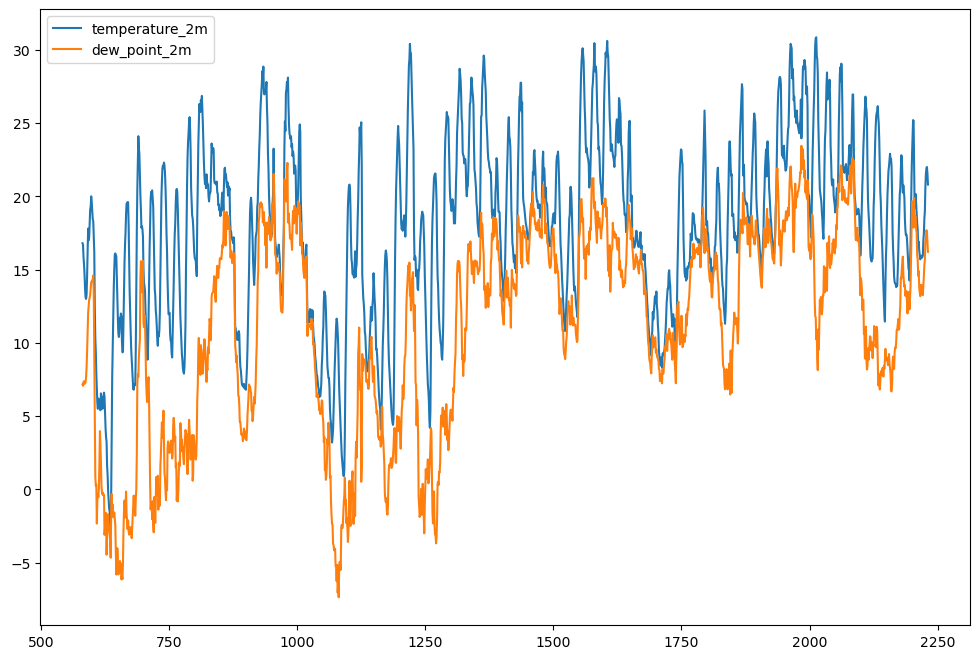

In [166]:
# Draw plot of the most correlated columns with 'temperature_2m'
# For the more than half part of the Plot, the fluctuation of the 3 parameters/columns is similar except on several points.
# This plot supports the Correlation among these three columns.
df1[['temperature_2m','dew_point_2m']].plot(subplots=[('temperature_2m','dew_point_2m')])

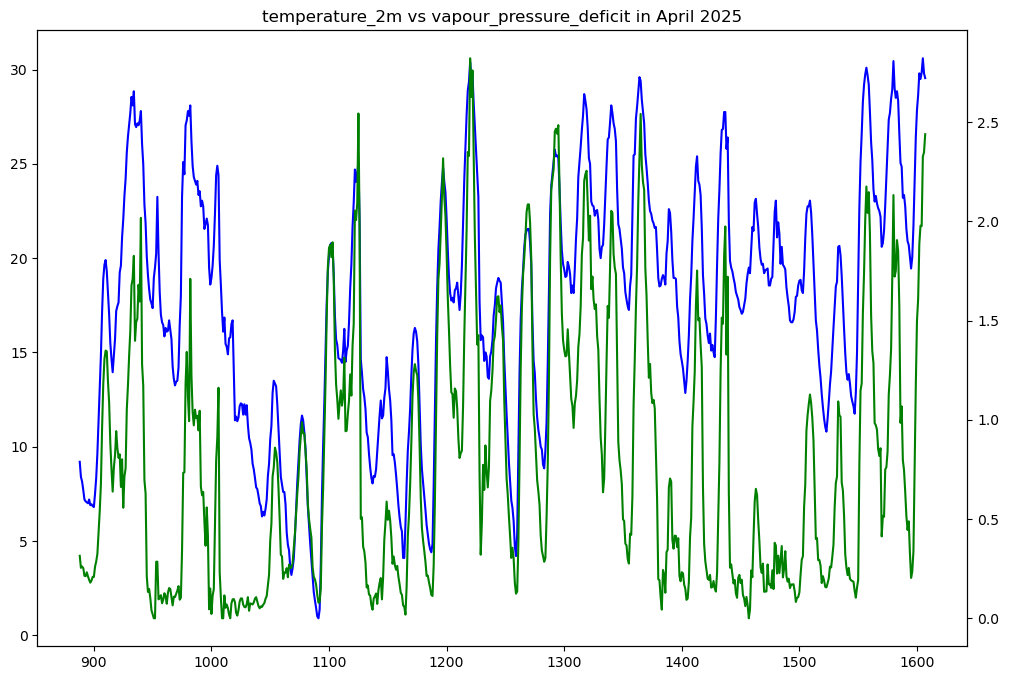

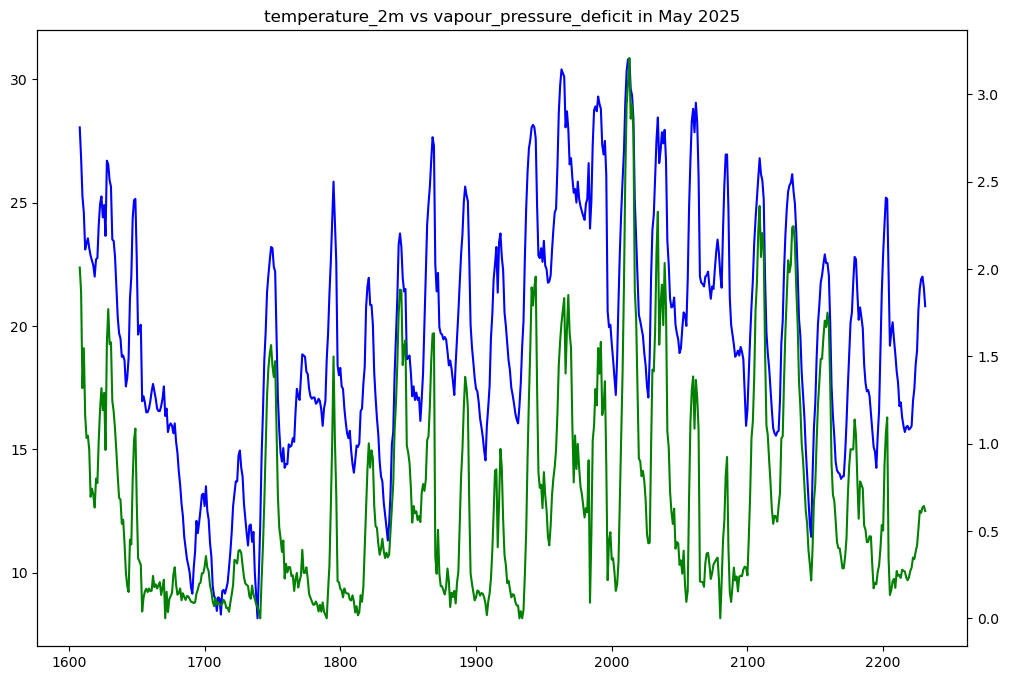

In [167]:
# Draw plot of the most correlated column with 'temperature_2m'
# The 'temperature_2m' and 'vapour_pressure_deficit' fluctuations for the most part are similar except at several points.
df04 = df1.where(df1['month'] == '04').dropna()
df05 = df1.where(df1['month'] == '05').dropna()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('temperature_2m vs vapour_pressure_deficit in April 2025')
ax1.plot(df04[['temperature_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['vapour_pressure_deficit']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('temperature_2m vs vapour_pressure_deficit in May 2025')
ax1.plot(df05[['temperature_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['vapour_pressure_deficit']], color='green', label='Data 2')

In [168]:
# Generate Correlation Table for 'relative_humidity_2m'
gencorr('relative_humidity_2m')

relative_humidity_2m       1.00
vapour_pressure_deficit    0.86
soil_moisture_0_to_1cm     0.59
soil_moisture_1_to_3cm     0.57
dew_point_2m               0.56
soil_moisture_3_to_9cm     0.53
cloud_cover_low            0.52
Name: relative_humidity_2m, dtype: float64

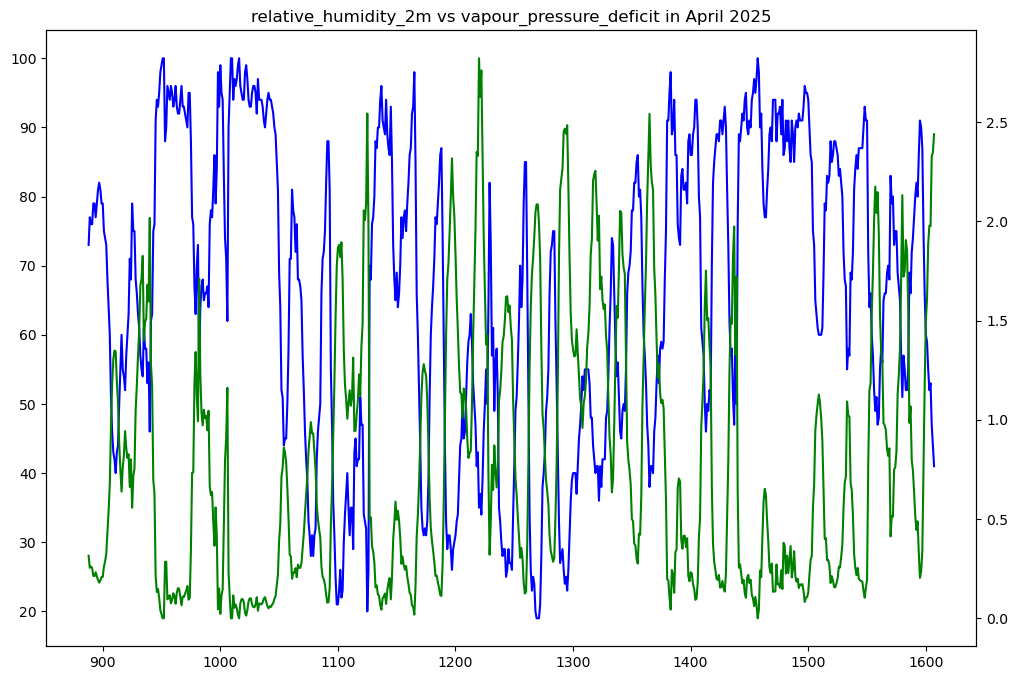

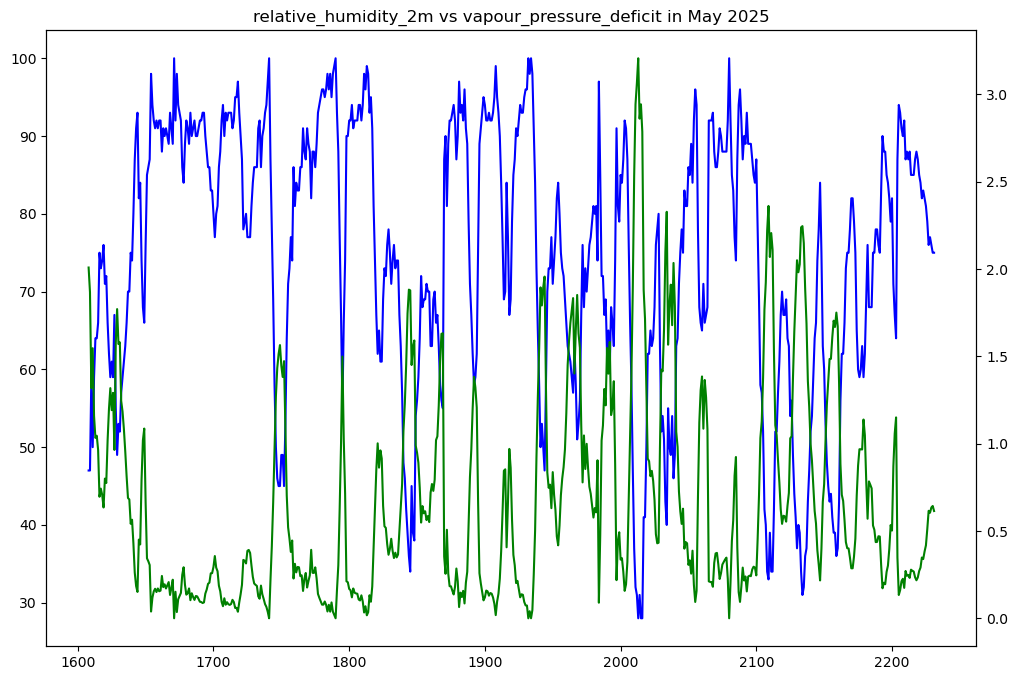

In [169]:
# Draw plot of the most correlated column with 'relative_humidity_2m'
# The relative_humidity_2m values are the good reverse of the vapour_pressure_deficit for the most part.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs vapour_pressure_deficit in April 2025')
ax1.plot(df04[['relative_humidity_2m']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['vapour_pressure_deficit']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('relative_humidity_2m vs vapour_pressure_deficit in May 2025')
ax1.plot(df05[['relative_humidity_2m']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['vapour_pressure_deficit']], color='green', label='Data 2')

In [170]:
# Generate Correlation Table for 'dew_point_2m'
gencorr('dew_point_2m')

dew_point_2m            1.00
temperature_80m         0.71
soil_temperature_0cm    0.63
temperature_2m          0.63
relative_humidity_2m    0.56
Name: dew_point_2m, dtype: float64

<Axes: title={'center': 'dew_point_2m vs temperature_2m in May 2025'}>

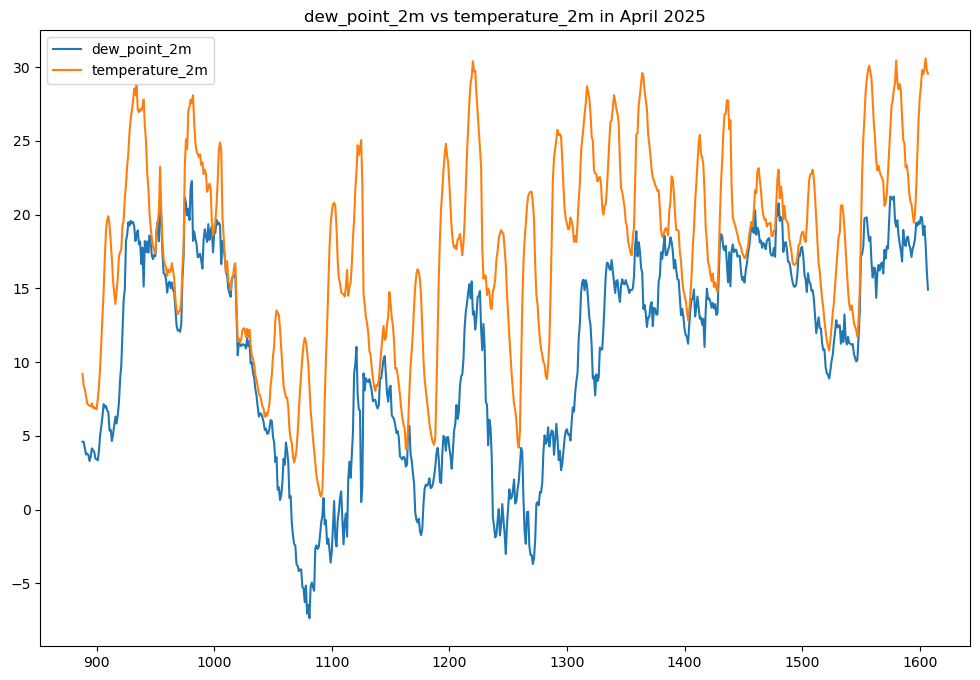

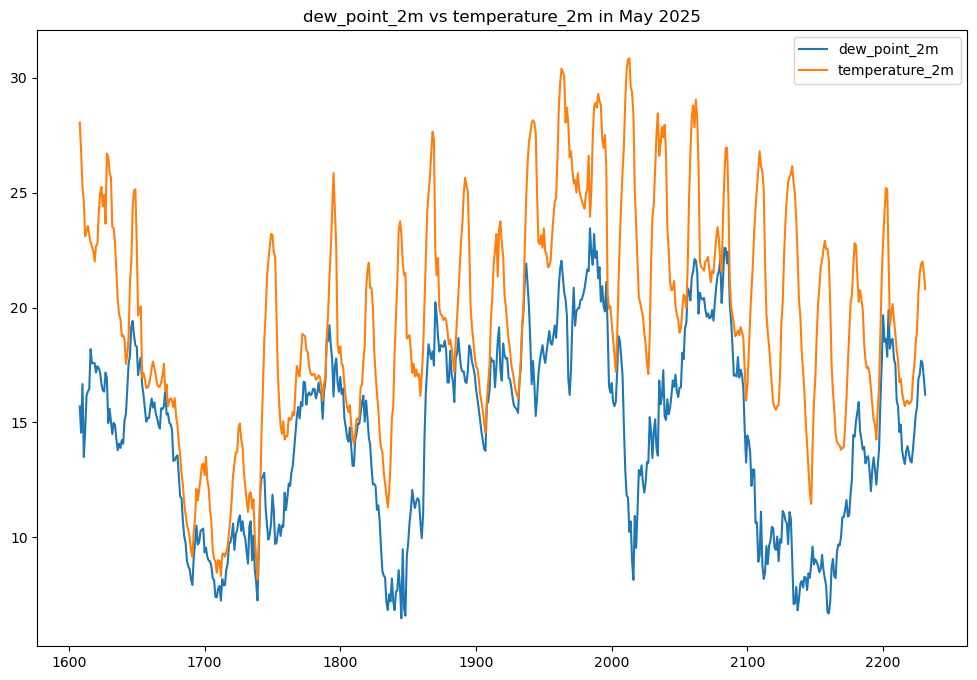

In [171]:
# Draw plot of the most correlated column with 'dew_point_2m'
# The 'dew_point_2m' and 'temperature_2m' fluctuations for more than half part are similar except at several points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['dew_point_2m','temperature_2m']].plot(title='dew_point_2m vs temperature_2m in April 2025')
df05[['dew_point_2m','temperature_2m']].plot(title='dew_point_2m vs temperature_2m in May 2025')

In [172]:
# Generate Correlation Table for 'precipitation_probability'
gencorr('precipitation_probability')

precipitation_probability    1.00
cloud_cover_mid              0.51
Name: precipitation_probability, dtype: float64

<Axes: title={'center': 'precipitation_probability vs cloud_cover_mid in May 2025'}>

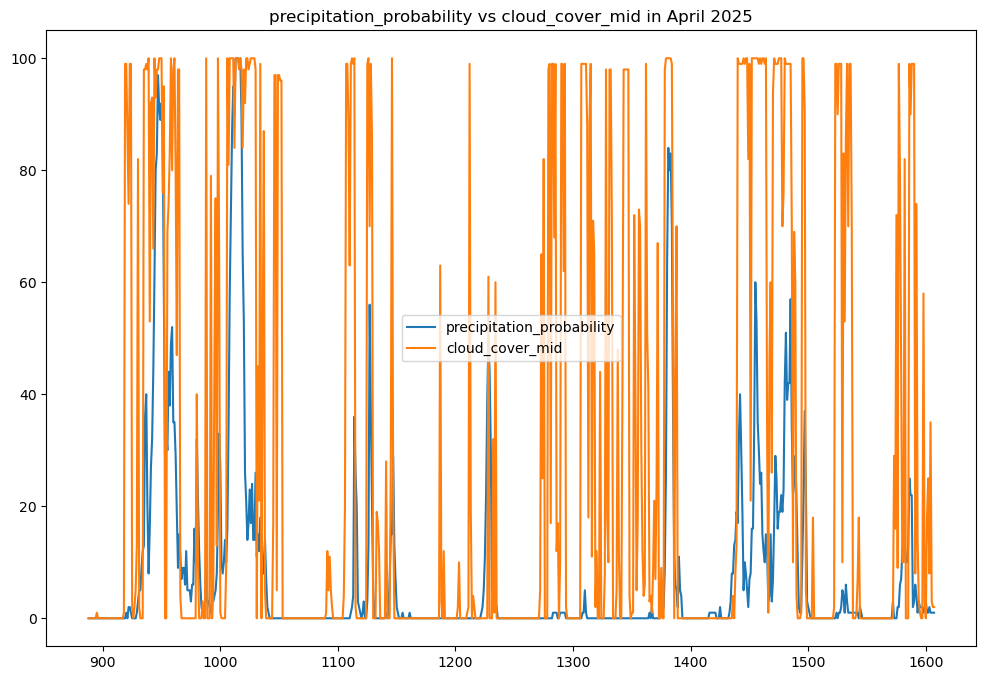

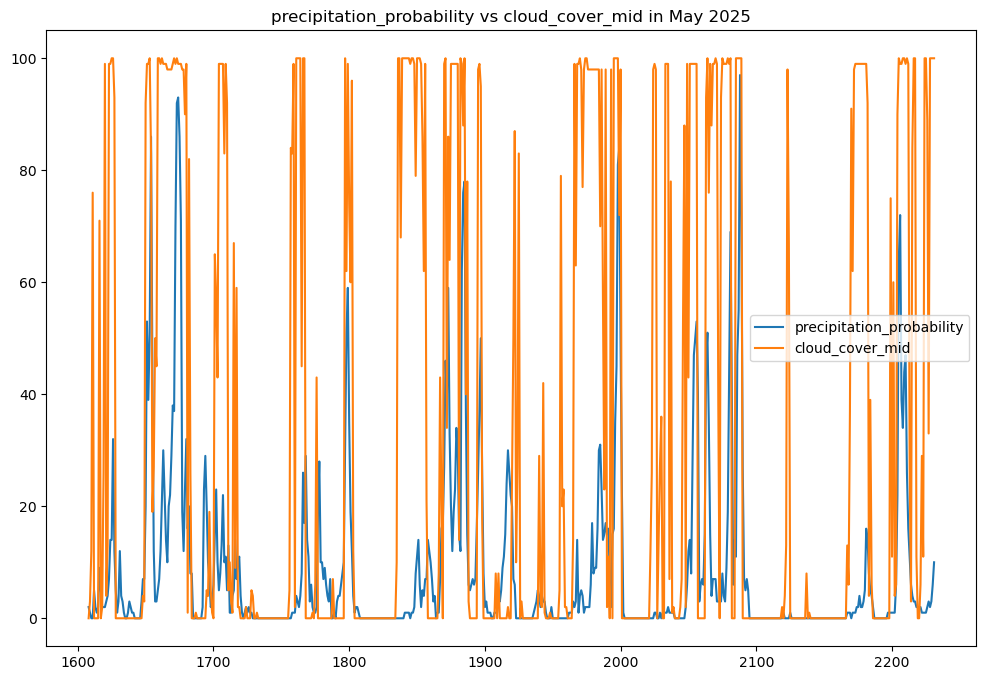

In [173]:
# Draw plot of the most correlated column with 'precipitation_probability'
# The 'precipitation_probability' and 'cloud_cover_mid' fluctuations for the half part are correlated.
import matplotlib.pyplot as plt
df04[['precipitation_probability','cloud_cover_mid']].plot(title='precipitation_probability vs cloud_cover_mid in April 2025')
df05[['precipitation_probability','cloud_cover_mid']].plot(title='precipitation_probability vs cloud_cover_mid in May 2025')

In [174]:
# Generate Correlation Table for 'cloud_cover_low'
gencorr('cloud_cover_low')

cloud_cover_low         1.00
relative_humidity_2m    0.52
Name: cloud_cover_low, dtype: float64

<Axes: title={'center': 'cloud_cover_low vs cloud_cover in May 2025'}>

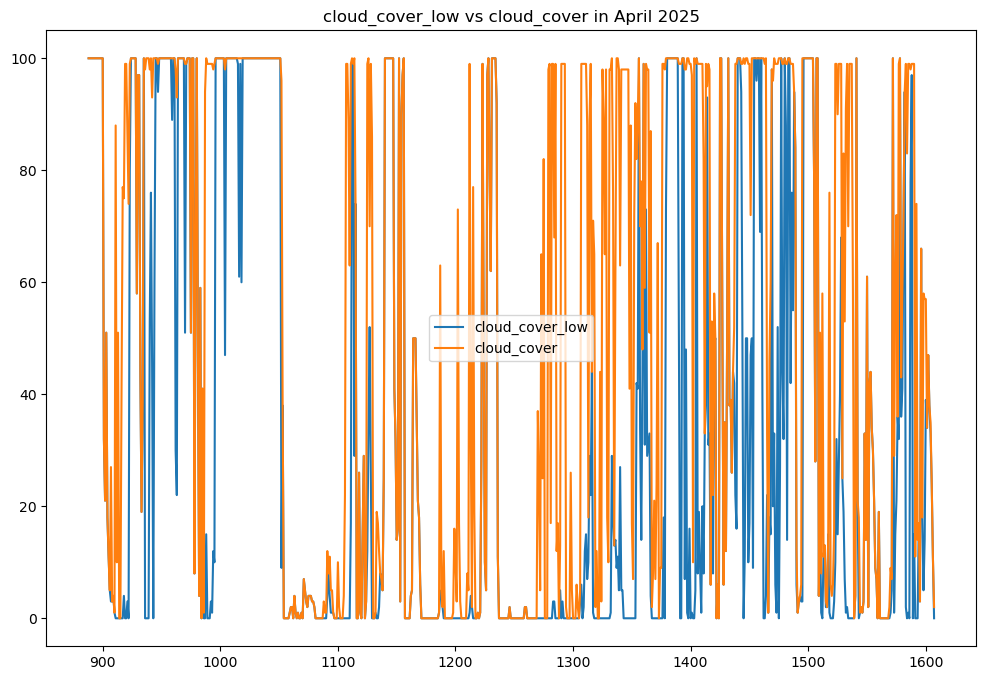

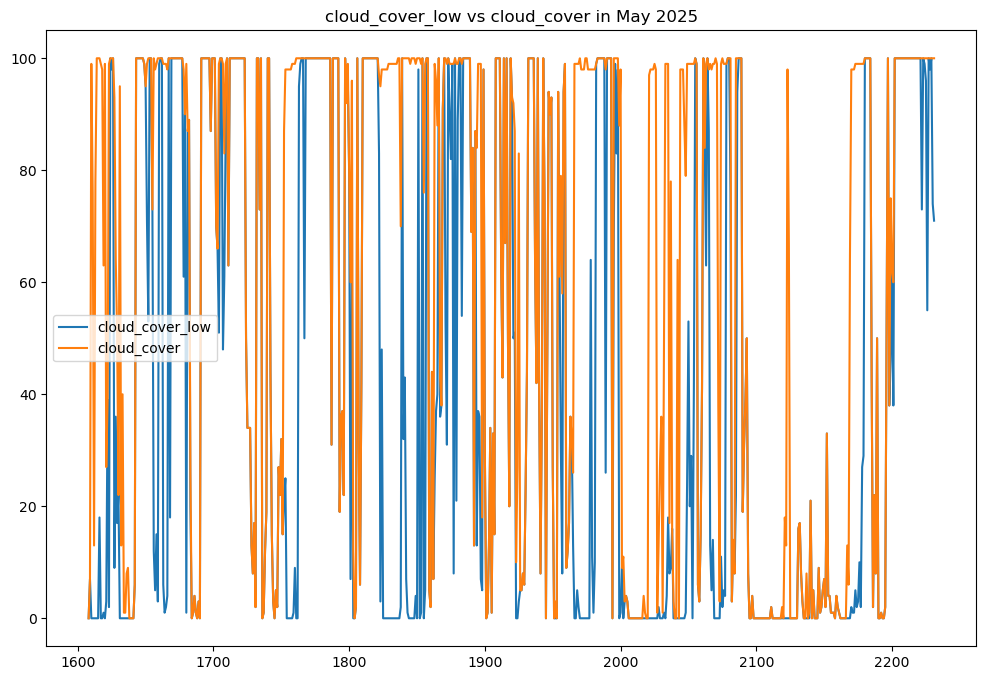

In [175]:
# Draw plot of the most correlated column with 'cloud_cover_low'
# The 'cloud_cover_low' and 'cloud_cover' fluctuations for more than half part are similar except at several points.
import matplotlib.pyplot as plt
df04[['cloud_cover_low','cloud_cover']].plot(title='cloud_cover_low vs cloud_cover in April 2025')
df05[['cloud_cover_low','cloud_cover']].plot(title='cloud_cover_low vs cloud_cover in May 2025')

In [176]:
# Generate Correlation Table for 'cloud_cover_mid'
gencorr('cloud_cover_mid')

cloud_cover_mid              1.00
cloud_cover_high             0.57
precipitation_probability    0.51
Name: cloud_cover_mid, dtype: float64

<Axes: title={'center': 'cloud_cover_mid vs cloud_cover in May 2025'}>

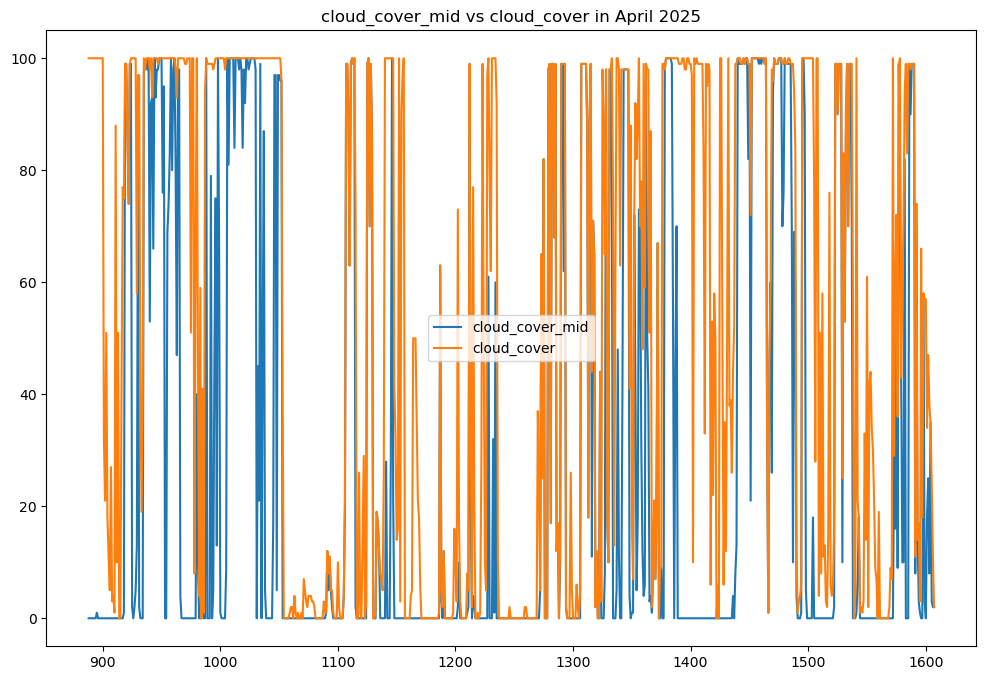

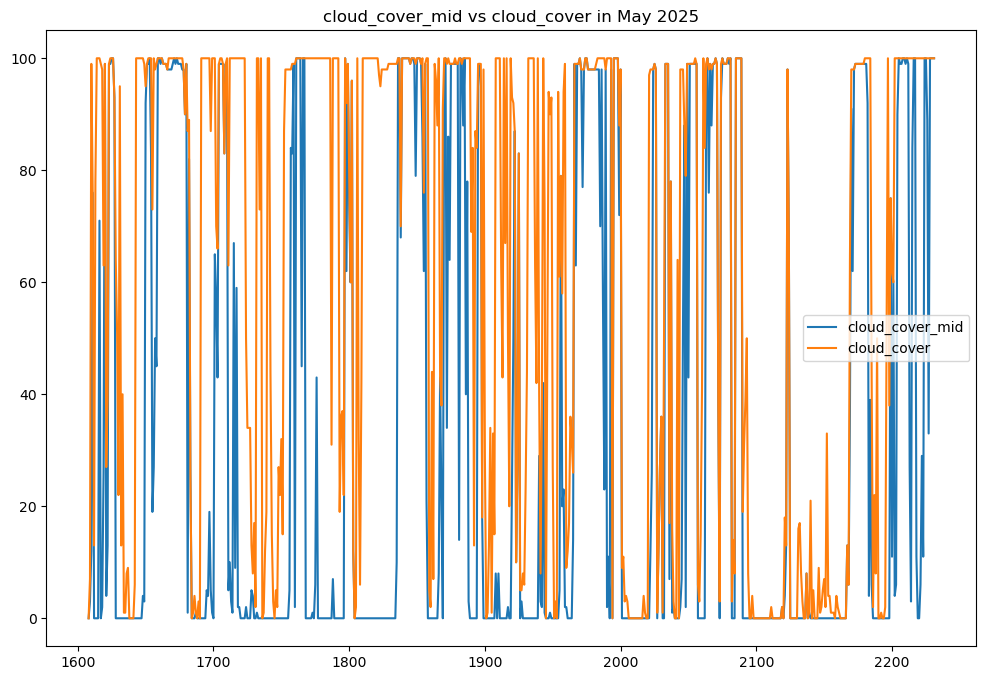

In [177]:
# Draw plot of the most correlated column with 'cloud_cover_mid'
# The 'cloud_cover_mid' and 'cloud_cover' fluctuations for more than half part are not so similar.
import matplotlib.pyplot as plt
df04[['cloud_cover_mid','cloud_cover']].plot(title='cloud_cover_mid vs cloud_cover in April 2025')
df05[['cloud_cover_mid','cloud_cover']].plot(title='cloud_cover_mid vs cloud_cover in May 2025')

In [178]:
# Generate Correlation Table for 'cloud_cover_high'
gencorr('cloud_cover_high')

cloud_cover_high    1.00
cloud_cover_mid     0.57
Name: cloud_cover_high, dtype: float64

<Axes: title={'center': 'cloud_cover_high vs cloud_cover_mid in May 2025'}>

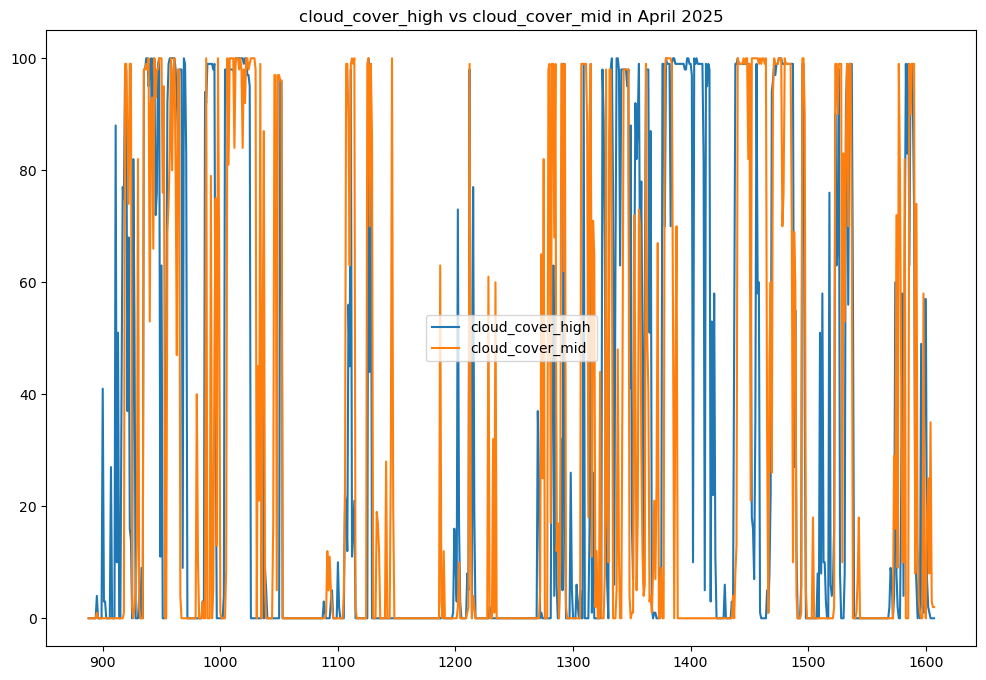

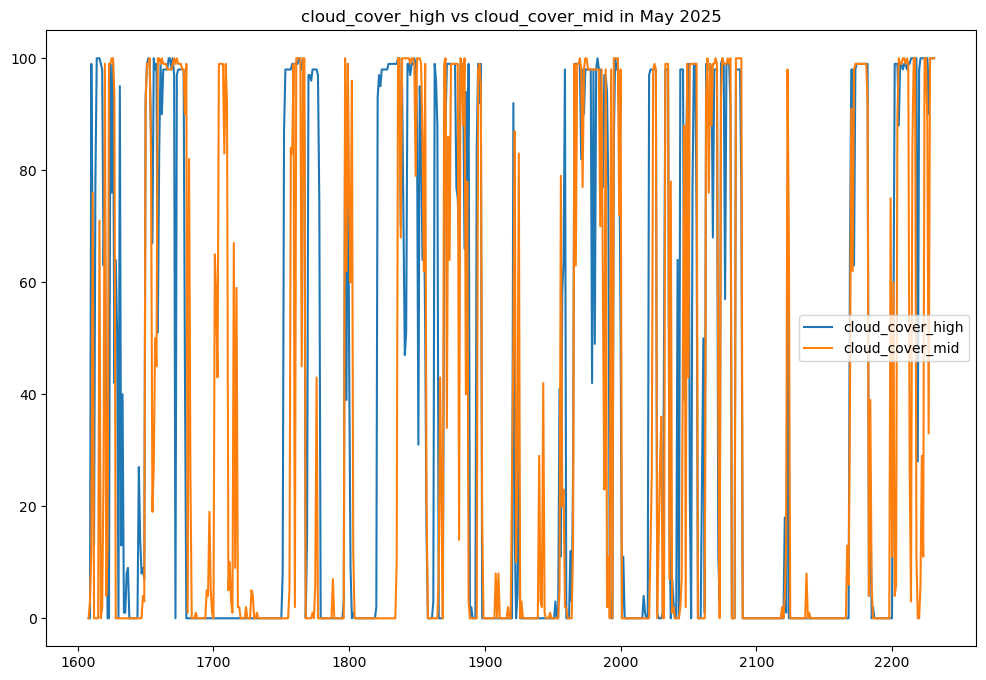

In [179]:
# Draw plot of the most correlated column with 'cloud_cover_high'
# The 'cloud_cover_high' and 'cloud_cover_mid' fluctuations for more than half part are not so similar.
import matplotlib.pyplot as plt
df04[['cloud_cover_high','cloud_cover_mid']].plot(title='cloud_cover_high vs cloud_cover_mid in April 2025')
df05[['cloud_cover_high','cloud_cover_mid']].plot(title='cloud_cover_high vs cloud_cover_mid in May 2025')

In [180]:
# Generate Correlation Table for 'wind_speed_10m'
gencorr('wind_speed_10m')

wind_speed_10m    1.0
Name: wind_speed_10m, dtype: float64

<Axes: title={'center': 'wind_speed_10m vs wind_gusts_10m in May 2025'}>

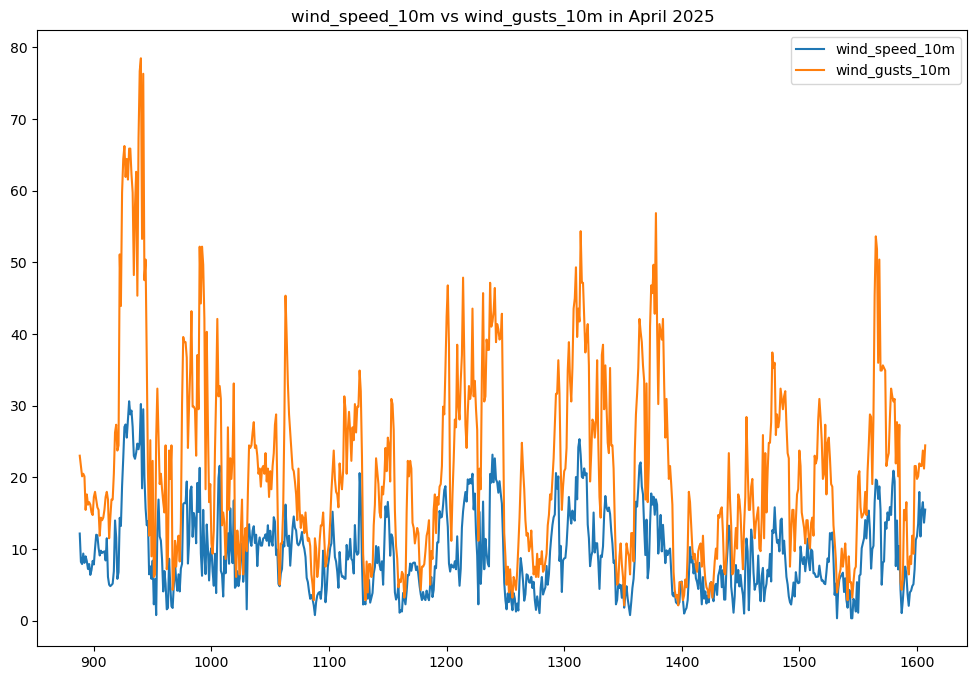

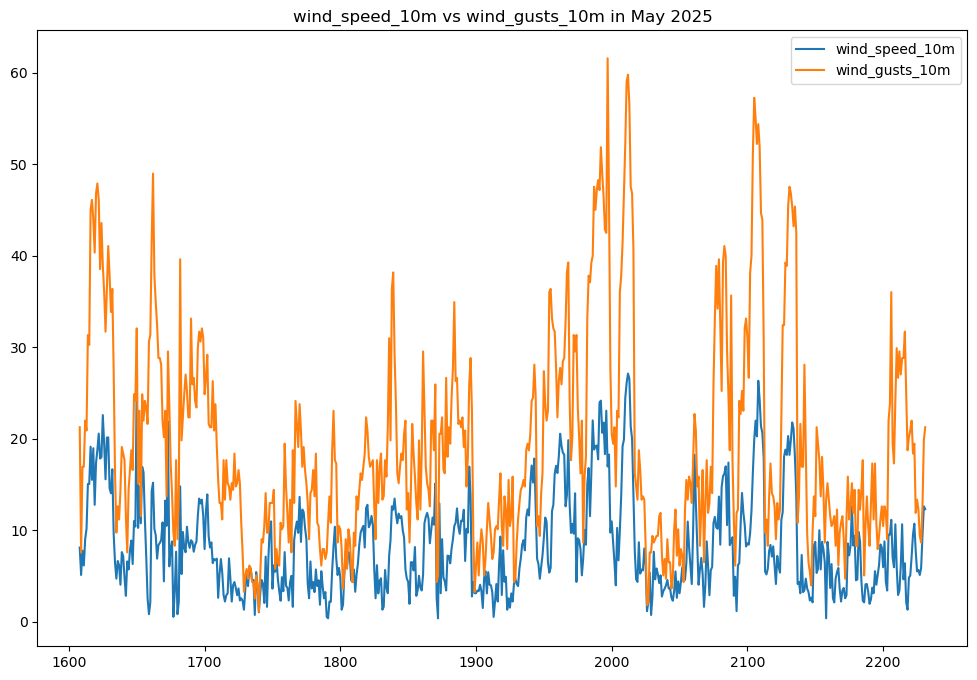

In [181]:
# Draw plot of the most correlated column with 'wind_speed_10m'
# The 'wind_speed_10m' and 'wind_gusts_10m' fluctuations for the most part are similar except at several points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['wind_speed_10m','wind_gusts_10m']].plot(title='wind_speed_10m vs wind_gusts_10m in April 2025')
df05[['wind_speed_10m','wind_gusts_10m']].plot(title='wind_speed_10m vs wind_gusts_10m in May 2025')

In [182]:
# Generate Correlation Table for 'soil_moisture_0_to_1cm'
gencorr('soil_moisture_0_to_1cm')

soil_moisture_0_to_1cm     1.00
soil_moisture_1_to_3cm     0.99
soil_moisture_3_to_9cm     0.93
relative_humidity_2m       0.59
vapour_pressure_deficit    0.55
Name: soil_moisture_0_to_1cm, dtype: float64

<Axes: title={'center': 'soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in May 2025'}>

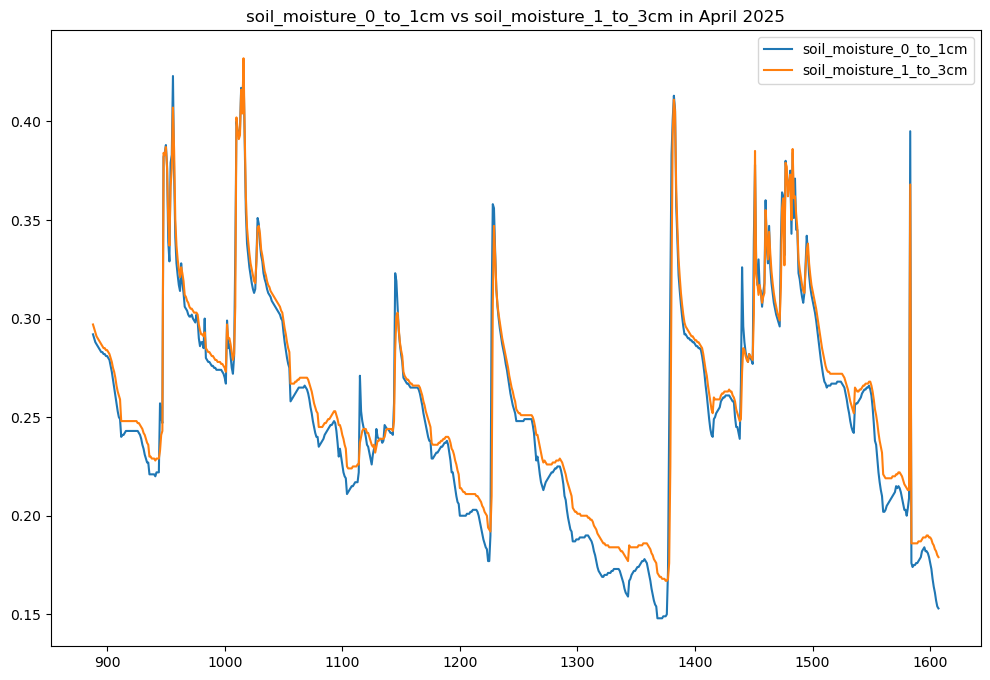

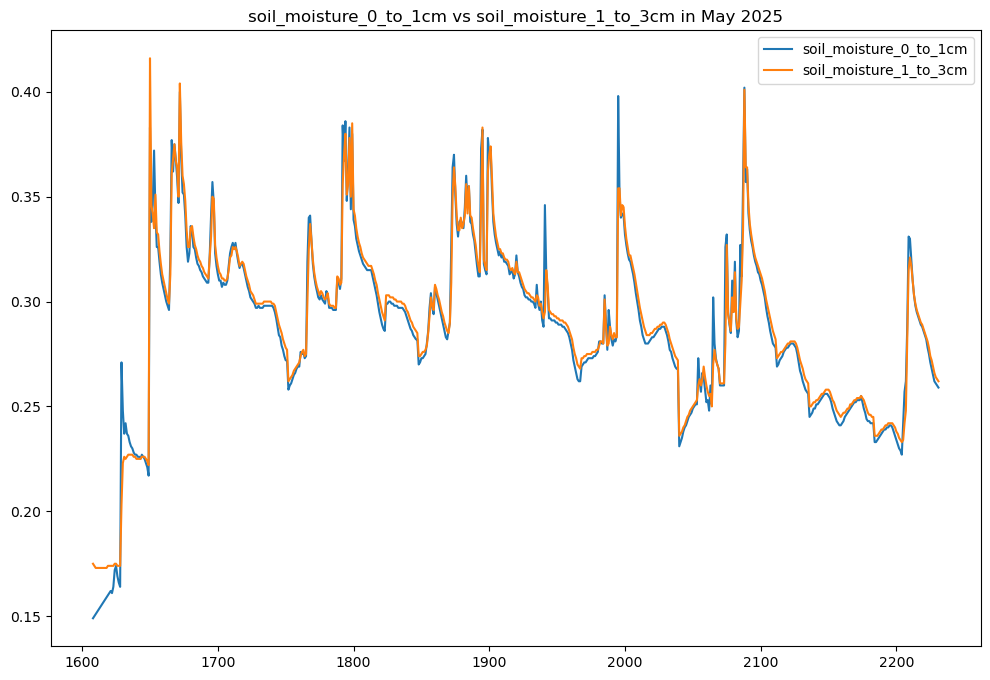

In [183]:
# Draw plot of the most correlated column with 'soil_moisture_0_to_1cm'
# The 'soil_moisture_0_to_1cm' and 'soil_moisture_1_to_3cm' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_0_to_1cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in April 2025')
df05[['soil_moisture_0_to_1cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_0_to_1cm vs soil_moisture_1_to_3cm in May 2025')

In [184]:
# Generate Correlation Table for 'temperature_80m'
gencorr('temperature_80m')

temperature_80m            1.00
temperature_2m             0.96
soil_temperature_0cm       0.86
dew_point_2m               0.71
vapour_pressure_deficit    0.52
Name: temperature_80m, dtype: float64

<Axes: title={'center': 'temperature_80m vs temperature_2m in May 2025'}>

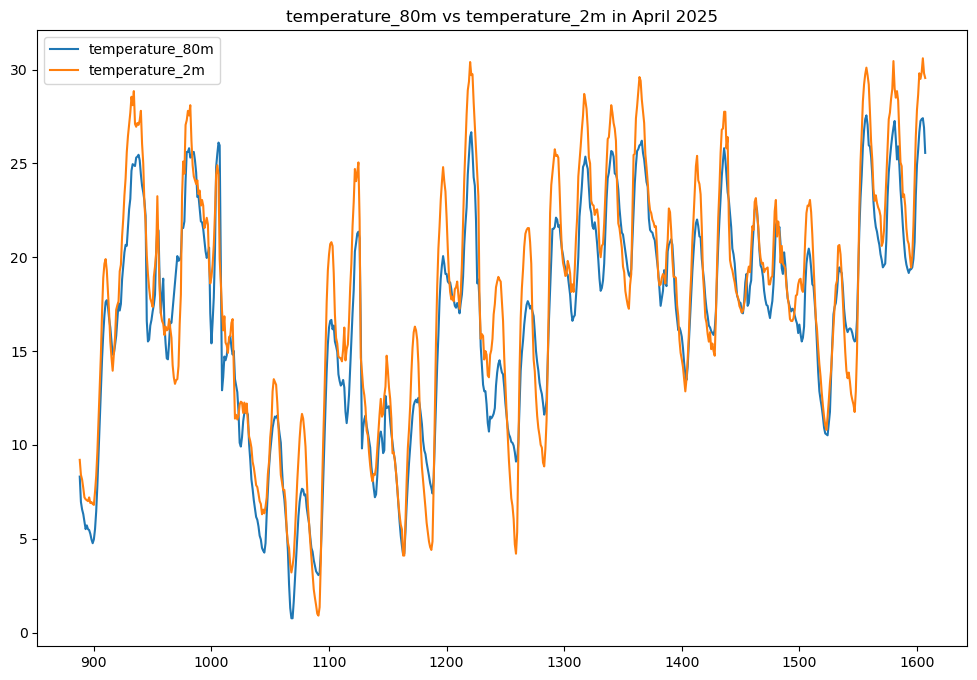

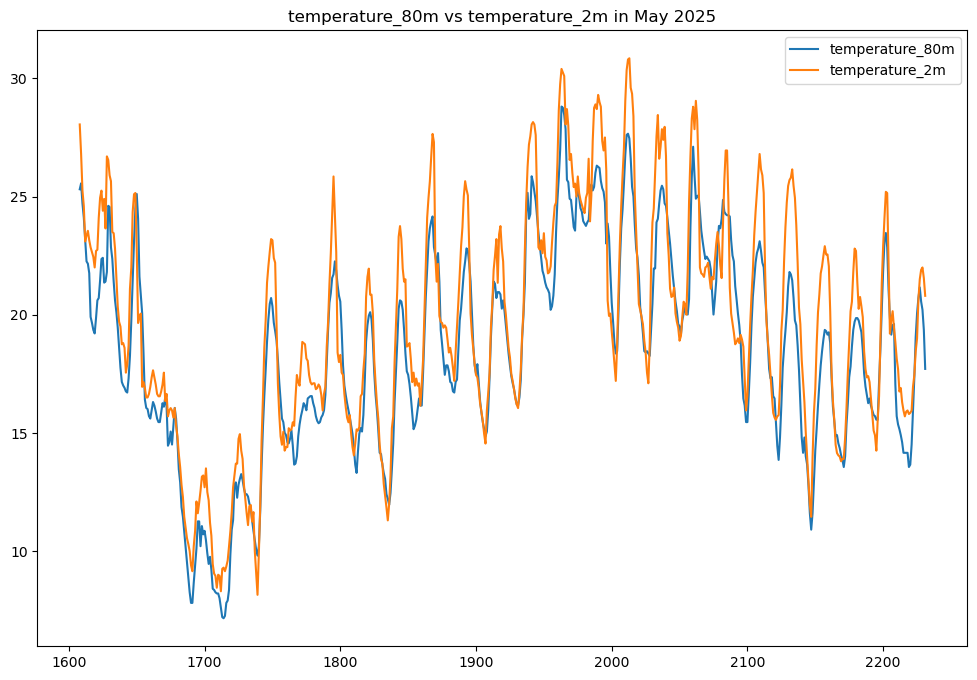

In [185]:
# Draw plot of the most correlated column with 'temperature_80m'
# The 'temperature_80m' and 'temperature_2m' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['temperature_80m','temperature_2m']].plot(title='temperature_80m vs temperature_2m in April 2025')
df05[['temperature_80m','temperature_2m']].plot(title='temperature_80m vs temperature_2m in May 2025')

In [186]:
# Generate Correlation Table for 'soil_temperature_0cm'
gencorr('soil_temperature_0cm')

soil_temperature_0cm       1.00
temperature_2m             0.92
temperature_80m            0.86
dew_point_2m               0.63
vapour_pressure_deficit    0.54
Name: soil_temperature_0cm, dtype: float64

<Axes: title={'center': 'soil_temperature_0cm vs temperature_2m in May 2025'}>

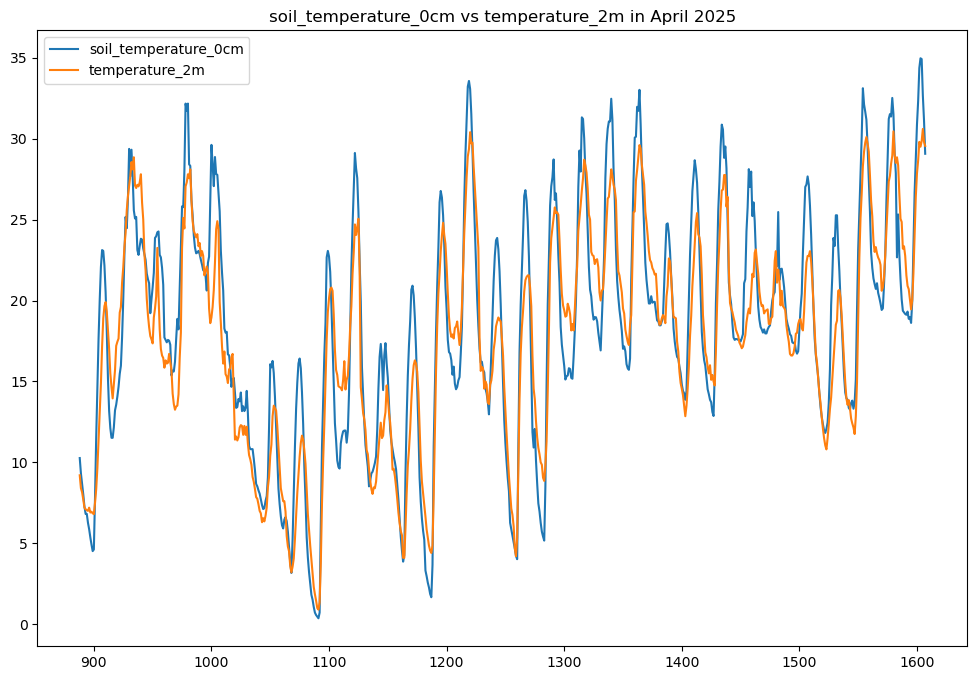

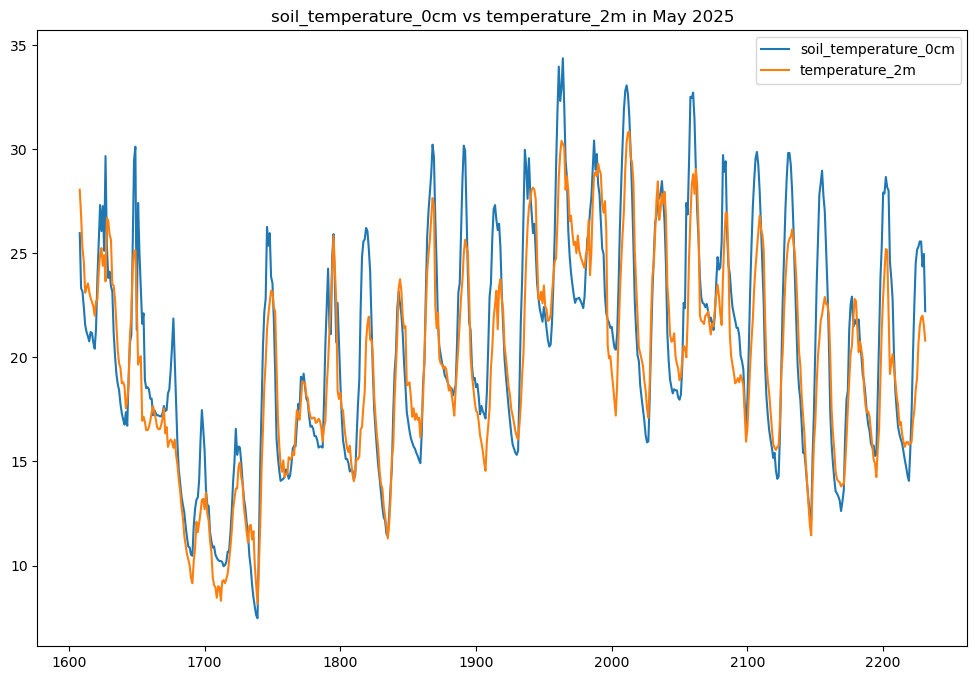

In [187]:
# Draw plot of the most correlated column with 'soil_temperature_0cm'
# The 'soil_temperature_0cm' and 'temperature_2m' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_temperature_0cm','temperature_2m']].plot(title='soil_temperature_0cm vs temperature_2m in April 2025')
df05[['soil_temperature_0cm','temperature_2m']].plot(title='soil_temperature_0cm vs temperature_2m in May 2025')

In [188]:
# Generate Correlation Table for 'soil_moisture_1_to_3cm'
gencorr('soil_moisture_1_to_3cm')

soil_moisture_1_to_3cm     1.00
soil_moisture_0_to_1cm     0.99
soil_moisture_3_to_9cm     0.96
relative_humidity_2m       0.57
vapour_pressure_deficit    0.52
Name: soil_moisture_1_to_3cm, dtype: float64

<Axes: title={'center': 'soil_moisture_1_to_3cm vs soil_moisture_0_to_1cm in May 2025'}>

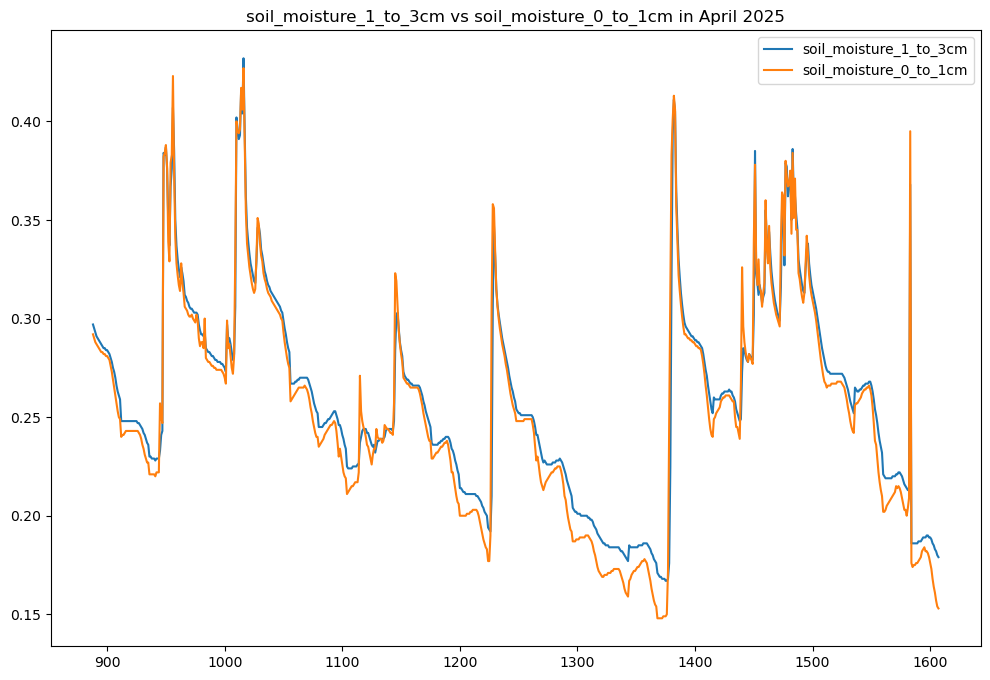

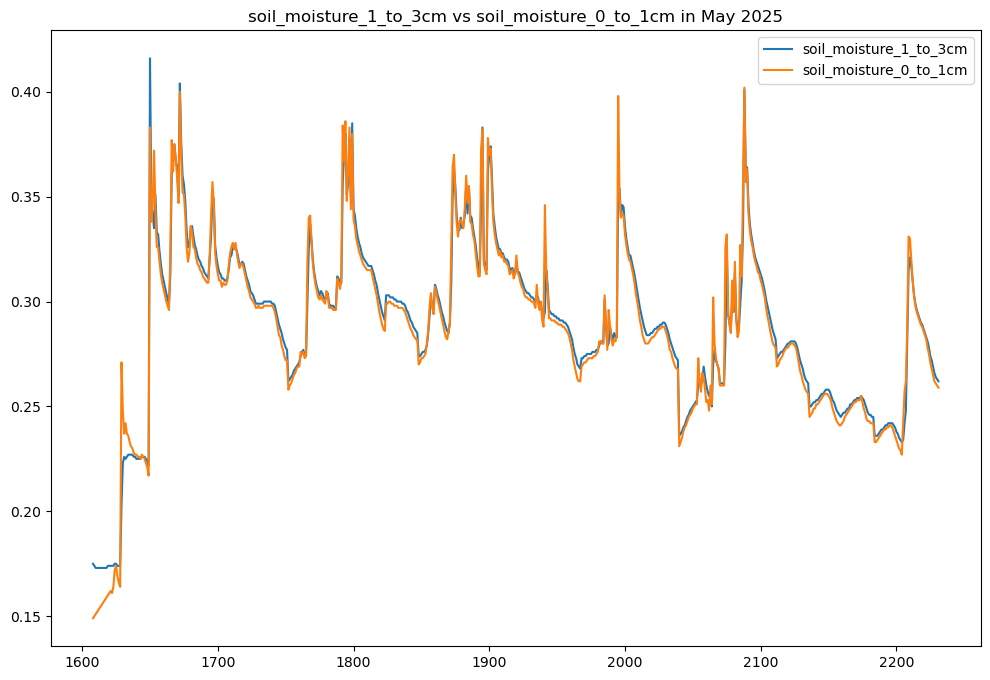

In [189]:
# Draw plot of the most correlated column with 'soil_moisture_1_to_3cm'
# The 'soil_moisture_1_to_3cm' and 'soil_moisture_0_to_1cm' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_1_to_3cm','soil_moisture_0_to_1cm']].plot(title='soil_moisture_1_to_3cm vs soil_moisture_0_to_1cm in April 2025')
df05[['soil_moisture_1_to_3cm','soil_moisture_0_to_1cm']].plot(title='soil_moisture_1_to_3cm vs soil_moisture_0_to_1cm in May 2025')

In [190]:
# Generate Correlation Table for 'soil_moisture_3_to_9cm'
gencorr('soil_moisture_3_to_9cm')

soil_moisture_3_to_9cm    1.00
soil_moisture_1_to_3cm    0.96
soil_moisture_0_to_1cm    0.93
relative_humidity_2m      0.53
Name: soil_moisture_3_to_9cm, dtype: float64

<Axes: title={'center': 'soil_moisture_3_to_9cm vs soil_moisture_1_to_3cm in May 2025'}>

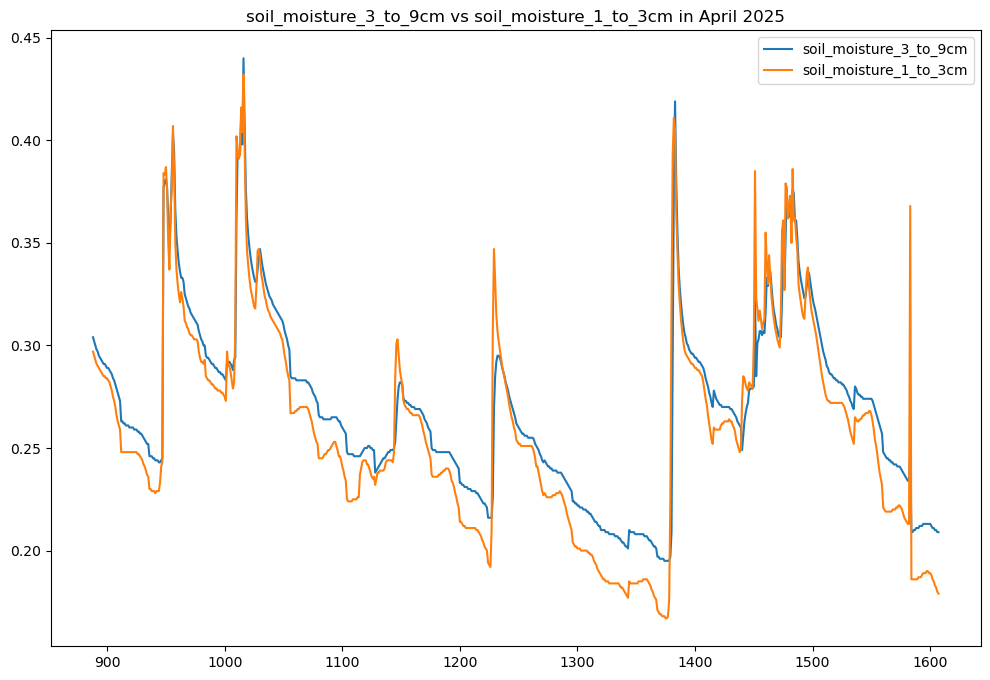

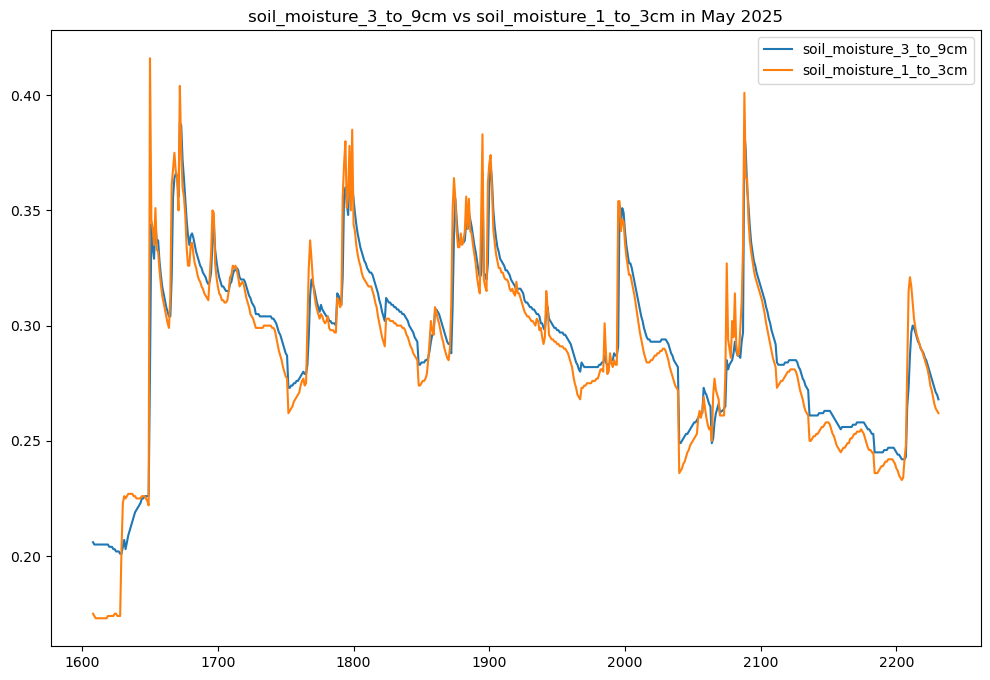

In [191]:
# Draw plot of the most correlated column with 'soil_moisture_3_to_9cm'
# The 'soil_moisture_3_to_9cm' and 'soil_moisture_1_to_3cm' fluctuations for the most part are similar except at very few points.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['soil_moisture_3_to_9cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_3_to_9cm vs soil_moisture_1_to_3cm in April 2025')
df05[['soil_moisture_3_to_9cm','soil_moisture_1_to_3cm']].plot(title='soil_moisture_3_to_9cm vs soil_moisture_1_to_3cm in May 2025')

In [192]:
# Generate Correlation Table for 'vapour_pressure_deficit'
gencorr('vapour_pressure_deficit')

vapour_pressure_deficit    1.00
relative_humidity_2m       0.86
temperature_2m             0.65
soil_moisture_0_to_1cm     0.55
soil_temperature_0cm       0.54
temperature_80m            0.52
soil_moisture_1_to_3cm     0.52
Name: vapour_pressure_deficit, dtype: float64

<Axes: title={'center': 'vapour_pressure_deficit vs soil_moisture_0_to_1cm in May 2025'}>

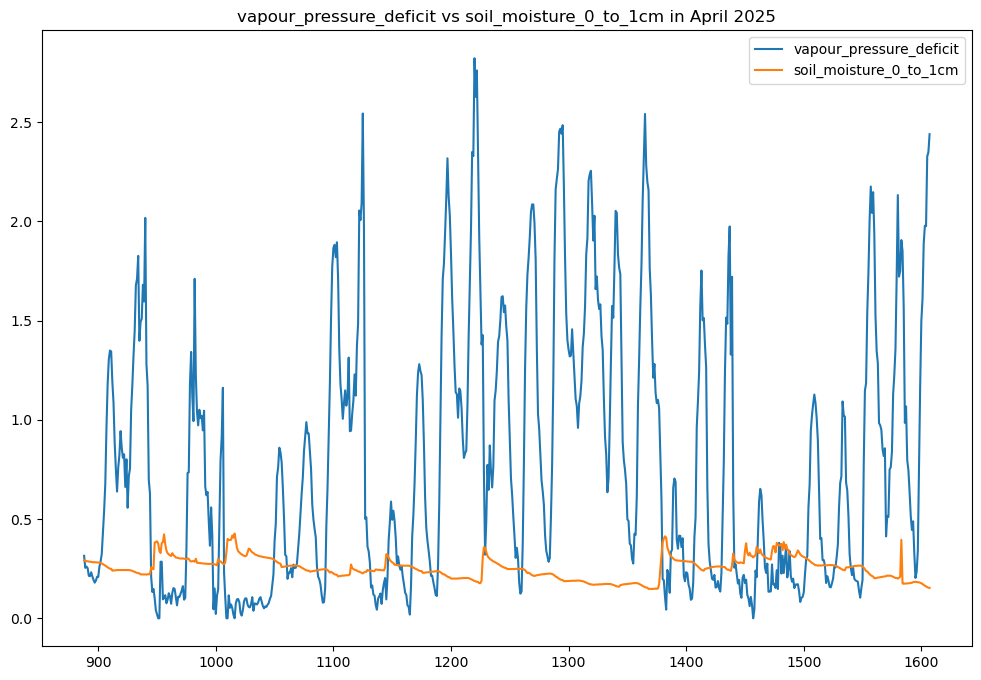

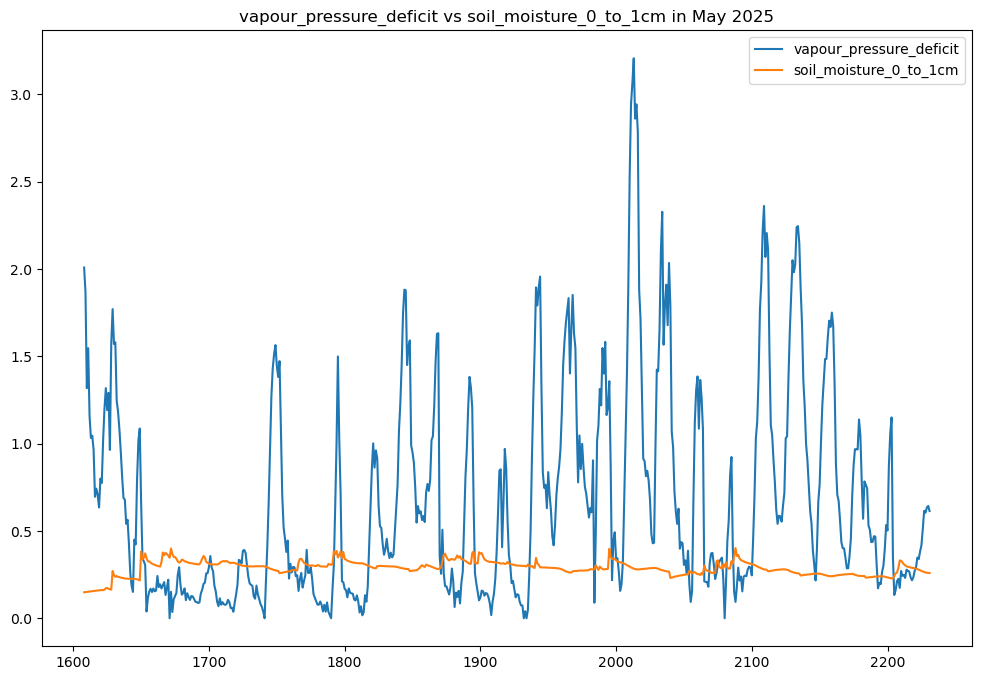

In [193]:
# Draw plot of the most correlated column with 'vapour_pressure_deficit'
# The 'vapour_pressure_deficit' and 'soil_moisture_0_to_1cm' fluctuations for more than half part are similar.
import matplotlib.pyplot as plt
# plt.title('dew_point_2m vs temperature_2m in April 2025')
df04[['vapour_pressure_deficit','soil_moisture_0_to_1cm']].plot(title='vapour_pressure_deficit vs soil_moisture_0_to_1cm in April 2025')
df05[['vapour_pressure_deficit','soil_moisture_0_to_1cm']].plot(title='vapour_pressure_deficit vs soil_moisture_0_to_1cm in May 2025')

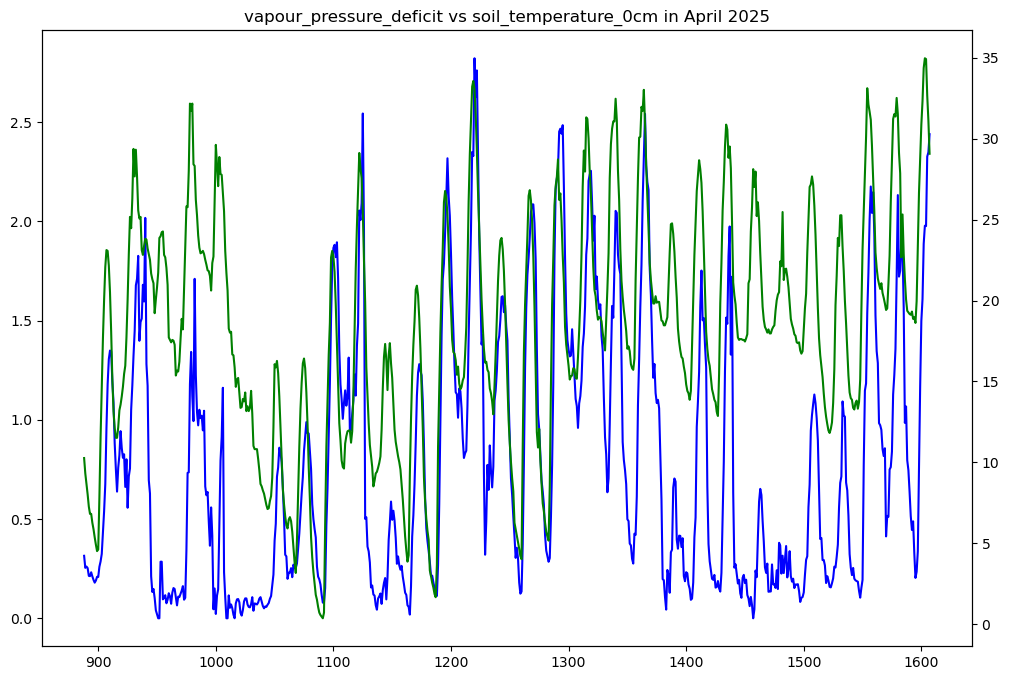

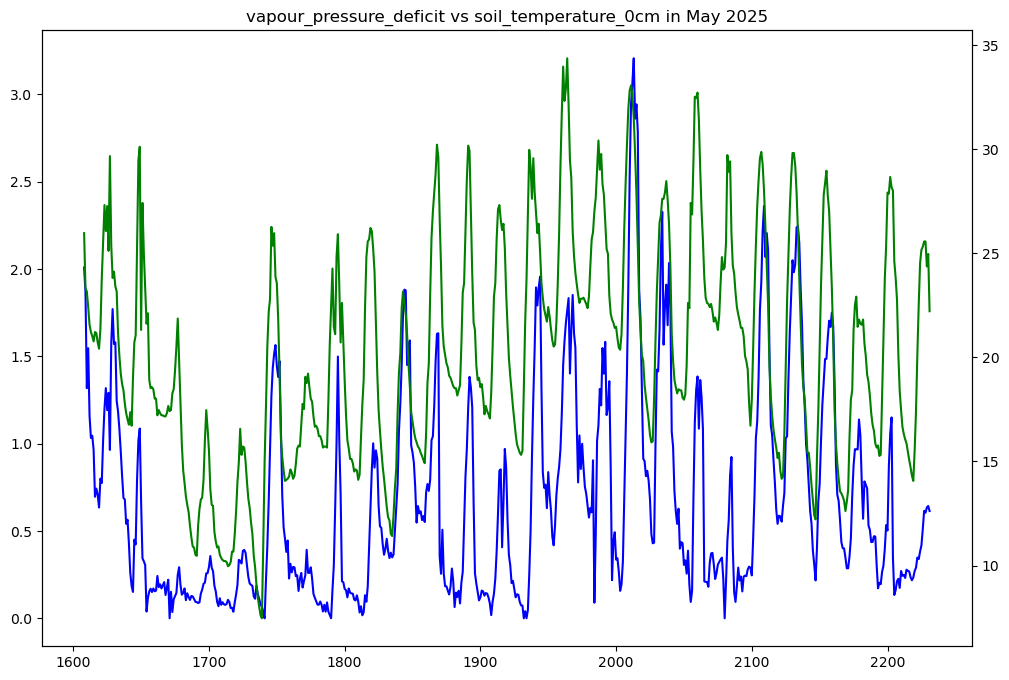

In [194]:
# Draw plot of the most correlated column with 'vapour_pressure_deficit'
# The vapour_pressure_deficit values are the good reverse of the vapour_pressure_deficit for the most part.
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.title('vapour_pressure_deficit vs soil_temperature_0cm in April 2025')
ax1.plot(df04[['vapour_pressure_deficit']], color='blue')
ax2 = ax1.twinx()
ax2.plot(df04[['soil_temperature_0cm']], color='green', label='Data 2')

fig, ax1 = plt.subplots()
plt.title('vapour_pressure_deficit vs soil_temperature_0cm in May 2025')
ax1.plot(df05[['vapour_pressure_deficit']], color='blue', label='Data 1')
ax2 = ax1.twinx()
ax2.plot(df05[['soil_temperature_0cm']], color='green', label='Data 2')

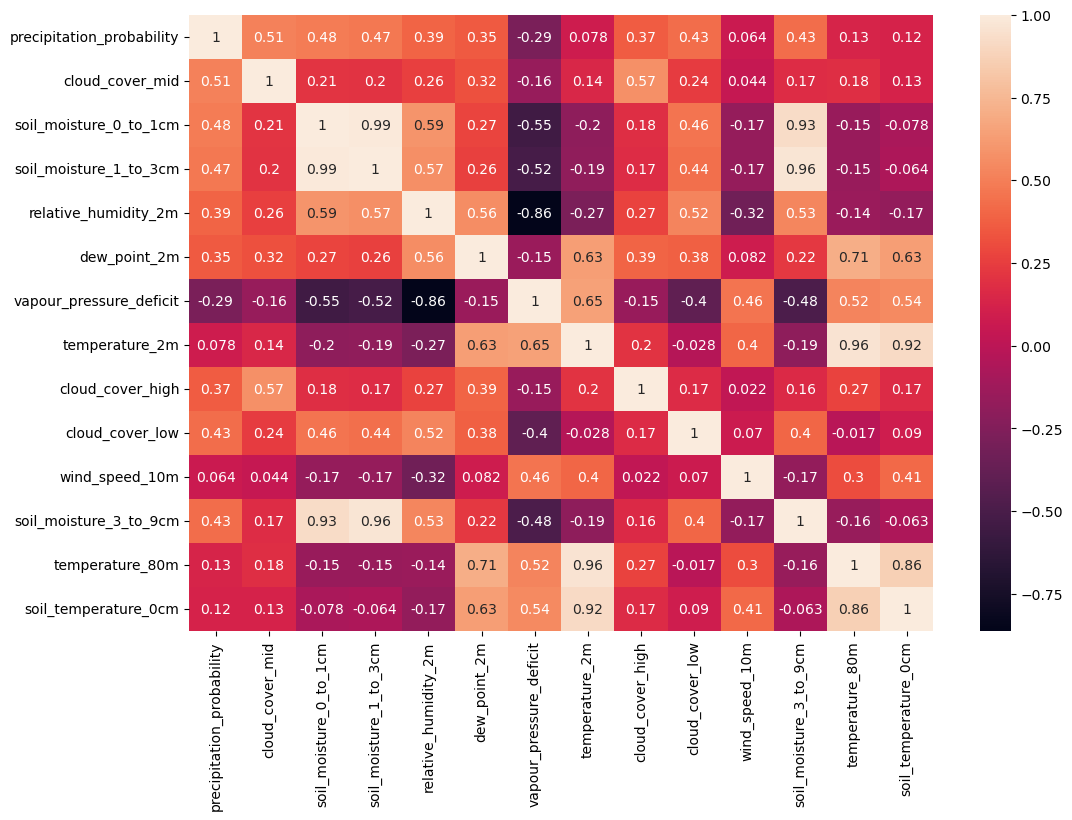

In [195]:
# Draw the Heatmap of Weather Data Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df1h.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [196]:
# How about if we limit the 'temperature_2m' to certain range, let's say, more than 18C
# Data for 4 Columns where temperature_2m more than 18 C
df1h2 = df1h.where(df1h['temperature_2m'] > 18)
df1h2 = df1h2.dropna()
df1h2

precipitation_probability  cloud_cover_mid  soil_moisture_0_to_1cm  \
595                         0.0            100.0                   0.231   
596                         1.0            100.0                   0.229   
597                         1.0              0.0                   0.229   
598                         2.0              0.0                   0.228   
599                         8.0              0.0                   0.227   
...                         ...              ...                     ...   
2227                        3.0             33.0                   0.265   
2228                        2.0            100.0                   0.262   
2229                        3.0            100.0                   0.261   
2230                        6.0            100.0                   0.260   
2231                       10.0            100.0                   0.259   

      soil_moisture_1_to_3cm  relative_humidity_2m  dew_point_2m  \
595                    0.238                  72.0     13.068562   
596                    0.237                  69.0     13.279072   
597                    0.237                  70.0     13.691494   
598                    0.236                  69.0     14.139482   
599                    0.235                  71.0     14.197729   
...                      ...                   ...           ...   
2227                   0.269                  76.0     17.093630   
2228                   0.266                  77.0     17.687681   
2229                   0.264                  76.0     17.577087   
2230                   0.263                  75.0     16.932825   
2231                   0.262                  75.0     16.208752   

      vapour_pressure_deficit  temperature_2m  cloud_cover_high  \
595                  0.585521         18.1995             100.0   
596                  0.685738         19.0995             100.0   
597                  0.671908         19.2995               5.0   
598                  0.725077         19.9995               0.0   
599                  0.661702         19.5995               0.0   
...                       ...             ...               ...   
2227                 0.615556         21.5025              90.0   
2228                 0.604456         21.9025             100.0   
2229                 0.634595         22.0025             100.0   
2230                 0.643173         21.5525             100.0   
2231                 0.614321         20.8025             100.0   

      cloud_cover_low  wind_speed_10m  soil_moisture_3_to_9cm  \
595             100.0       26.072052                   0.253   
596             100.0       26.987997                   0.252   
597             100.0       28.241076                   0.252   
598              97.0       28.467329                   0.251   
599              56.0       28.241076                   0.251   
...               ...             ...                     ...   
2227            100.0        5.091168                   0.275   
2228             98.0        5.860375                   0.273   
2229            100.0        9.387651                   0.271   
2230             74.0       12.599998                   0.270   
2231             71.0       12.287555                   0.268   

      temperature_80m  soil_temperature_0cm  
595         17.660500             23.367500  
596         18.660500             21.267500  
597         18.910500             21.917501  
598         19.060501             21.867500  
599         19.110500             21.217500  
...               ...                   ...  
2227        21.160500             25.567501  
2228        20.560501             25.567501  
2229        20.210500             24.367500  
2230        19.360500             24.967500  
2231        17.710500             22.217500  

[884 rows x 14 columns]

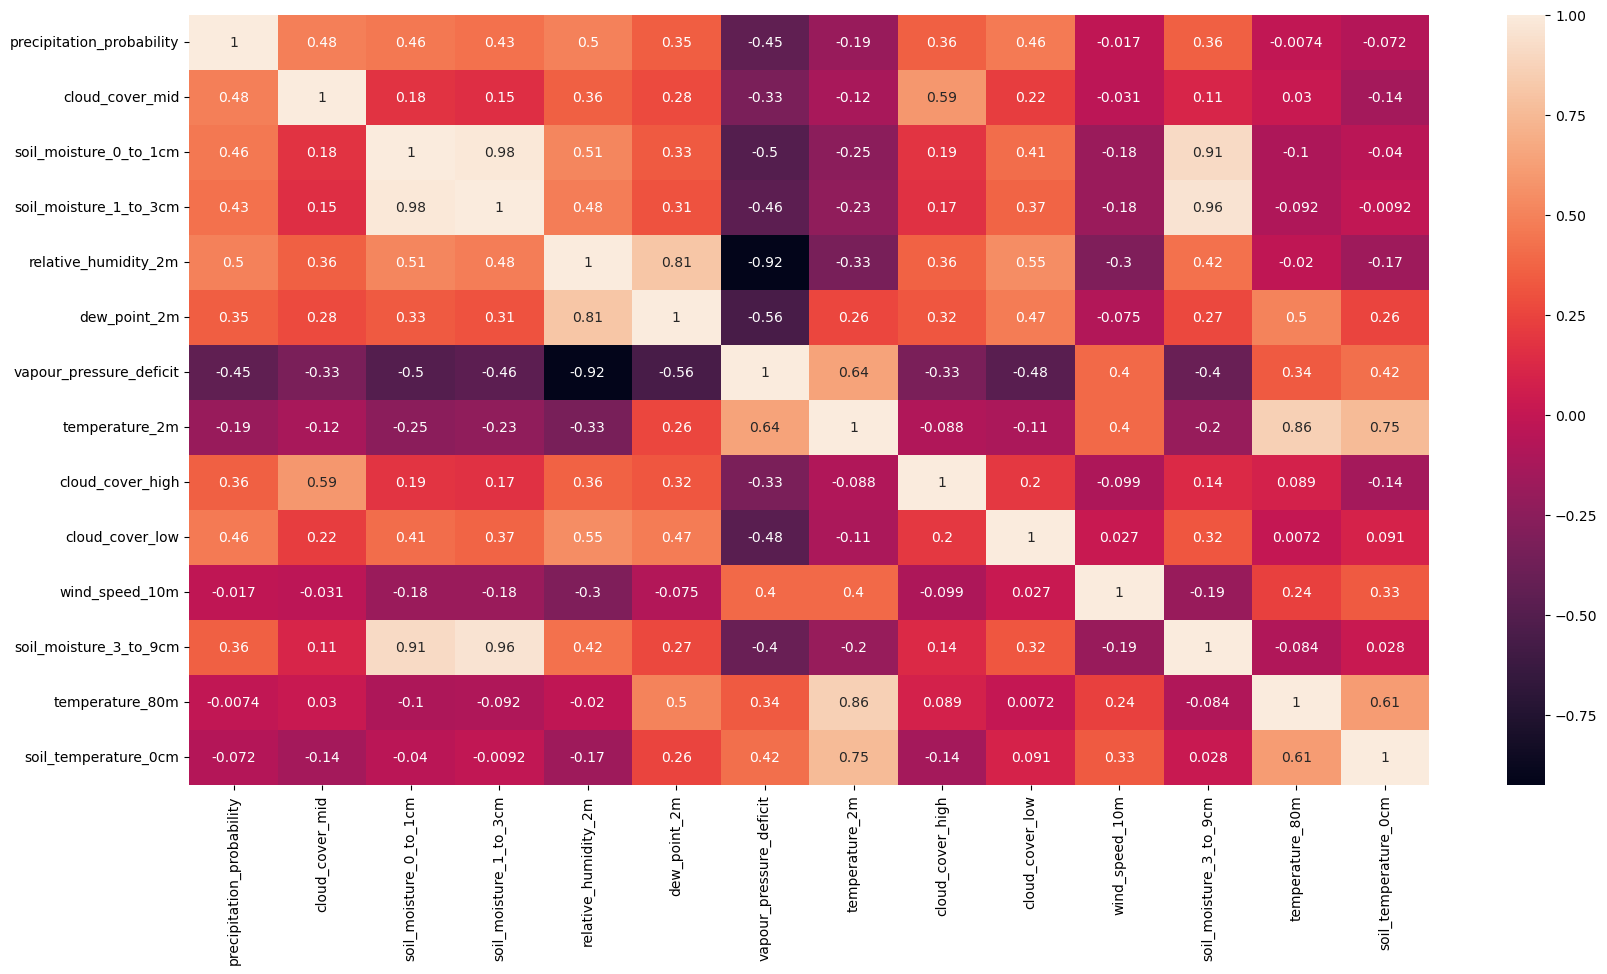

In [197]:
sns.heatmap(df1h2.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [198]:
######### Conclusion from the Heatmap ##############
# 'relative_humidity_2m' has correlation of -0.86 to 'vapour_pressure_deficit'.
# 'temperature_80m' has correlation of 0.92 to 'temperature_2m'.
# 'temperature_80m' has correlation of 0.86 to 'soil_temperature_0cm'.
# 'temperature_80m' has correlation of 0.71 to 'dew_point_2m'.
# 'temperature_2m' has correlation of 0.92 to 'soil_temperature_0cm'.
# 'dew_point_2m' has correlation of 0.81 to 'relative_humidity_2m' parameter if temperature_2m > 18C, compared to 0.56 with all data included.
# 'cloud_cover_mid' has correlation of 0.51 to 'precipitation_probability'.
# 'cloud_cover_low' has correlation of 0.52 to 'relative_humidity_2m'
# 'soil_moisture_0_to_1cm' has correlation of 0.59 to 'relative_humidity_2m'.
# 'soil_temperature_0cm has correlation of 0.63 to 'dew_point_2m'.
# 'vapour_pressure_deficit' has correlation of 0.65 to 'temperature_2m'.

In [199]:
# LAB : Check 'corr' method of Pandas with mathematical high order polynomial equations (quadratic to power-of-5 equations)
# Equations used:
# 1. y1 = 2x^2 + 5x + 6
# 2. y2 = 2x^3 + 7x^2 + 10x + 20
# 3. y3 = 5x^4 + 12x^3 + 8x^2 + 6x + 20
# 4. y4 = 3x^5 + 8x^4 + 10x^3 + 4x^2 + 9x + 17
# 5. y5 = 2x^7 + 9x^6 + 12x^5 + 31x^4 + 90x^3 + 6x^2 + 78x + 111
dfq = pd.read_csv('quadratic_equation.csv')
dfq

x   y1     y2      y3       y4          y5
0    1   13     39      51       51         339
1    2   24     84     240      355        2723
2    3   39    167     839     1727       19191
3    4   58    300    2220     5877       96135
4    5   81    495    4875    15787      365651
5    6  108    764    9416    36071     1133499
6    7  139   1119   16575    73335     3013863
7    8  174   1572   27204   136537     7120991
8    9  213   2135   42275   237347    15327795
9   10  256   2820   62880   390507    30601491
10  11  303   3639   90231   614191    57426359
11  12  354   4604  125660   930365   102323703
12  13  409   5727  170619  1365147   174479091
13  14  468   7020  226680  1949167   286486955
14  15  531   8495  295535  2717927   455222631
15  16  598  10164  378996  3712161   702851919
16  17  669  12039  478995  4978195  1057988243
17  18  744  14132  597584  6568307  1557007491

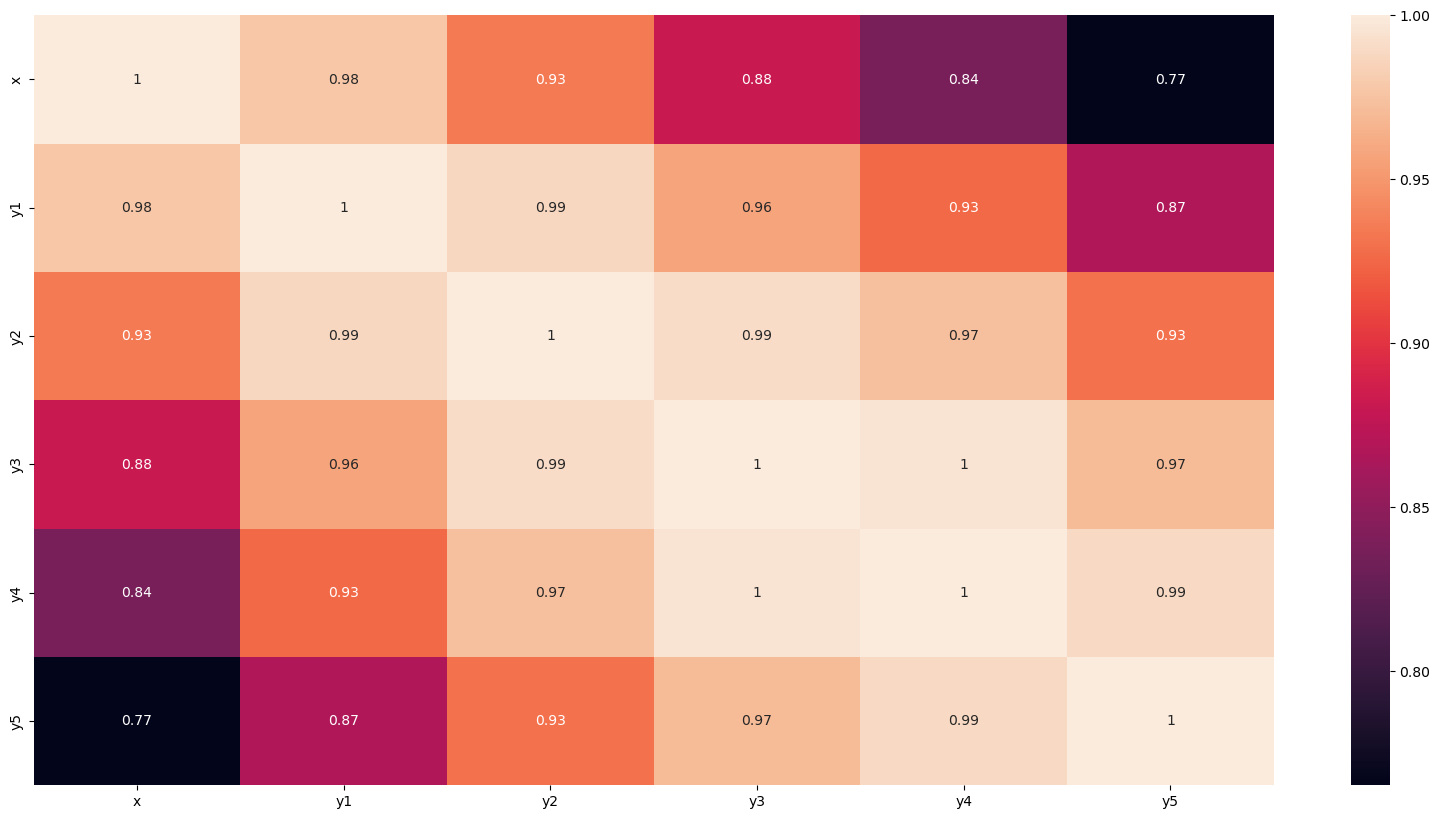

In [200]:
sns.heatmap(dfq.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [201]:
# CONCLUSION: 
# 'corr' Method of Pandas is accurate enough until cube equation, but for higher order equation, is much less.
# Correlation value of 0.8 is still can be regarded as correlated enough, due to corr method algorithm limitation.

   2
2 x + 5 x + 6


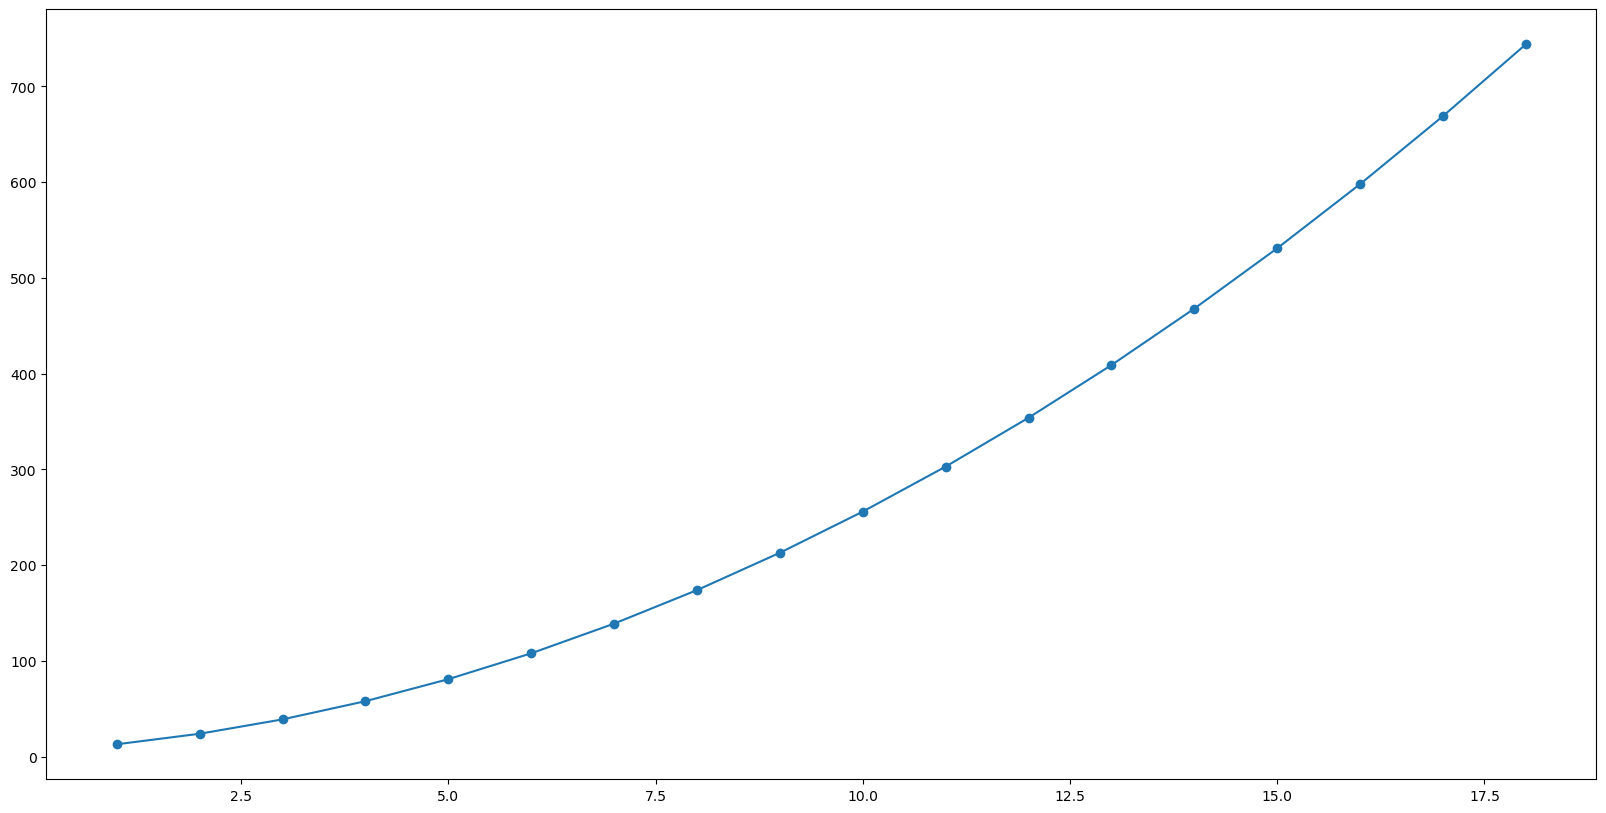

In [202]:
# Trendline of Polynomial Equations of Dataset x and y1 from the previous Lab Dataset.
# Convert the data in Dataframe into a basic List
dfqdictx = dfq[['x']].to_dict(orient='records')
dfqdicty1 = dfq[['y1']].to_dict(orient='records')
x = []
y1 = []

for i in dfqdictx:
    x.append(i['x'])

for i in dfqdicty1:
    y1.append(i['y1'])
    
import matplotlib.pyplot as plt
import numpy as np

#create scatterplot
plt.scatter(x, y1)

#calculate equation for quadratic trendline
z = np.polyfit(x, y1, 2)
p = np.poly1d(z)
print(p)

#add trendline to plot
plt.plot(x, p(x))

In [203]:
# Conclusion: it's proven that the Trendline equation made by 'poly1d' Function is exactly the same as the original one.

   3     2
2 x + 7 x + 10 x + 20


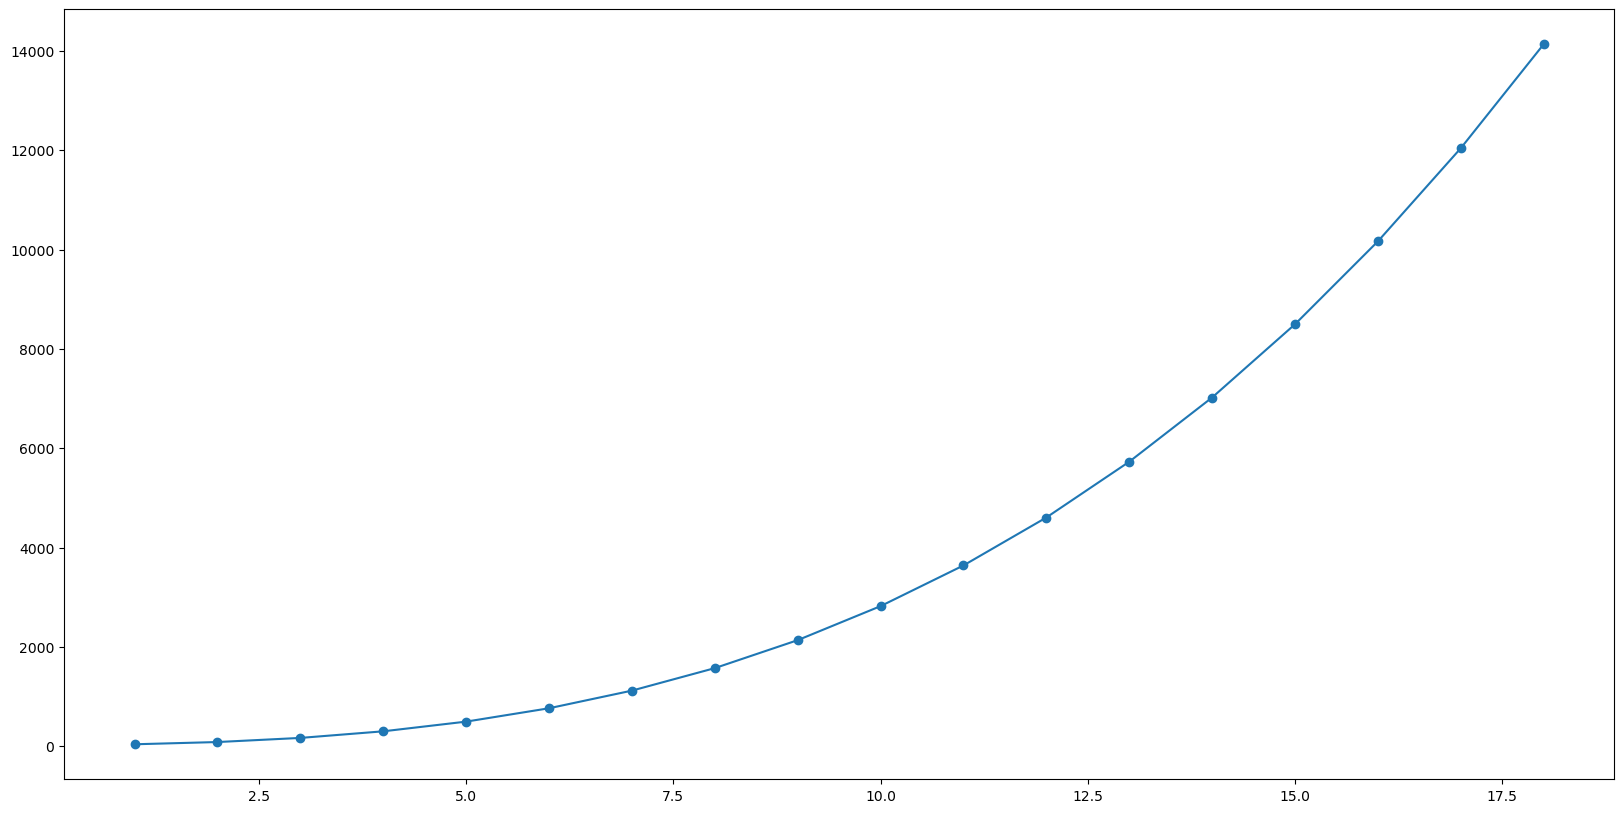

In [204]:
# Trendline of Polynomial Equations of Dataset x and y2 from the previous Lab Dataset.
# Convert the data in Dataframe into a basic List
dfqdicty2 = dfq[['y2']].to_dict(orient='records')
y2 = []

for i in dfqdicty2:
    y2.append(i['y2'])
    
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(x, y2)

#calculate equation for quadratic trendline
z = np.polyfit(x, y2, 3)
p = np.poly1d(z)  # It's proven that poly1d is successfully create the polynomial equation for y2 dataset
print(p)

#add trendline to plot
plt.plot(x, p(x))

   4      3     2
5 x + 12 x + 8 x + 6 x + 20


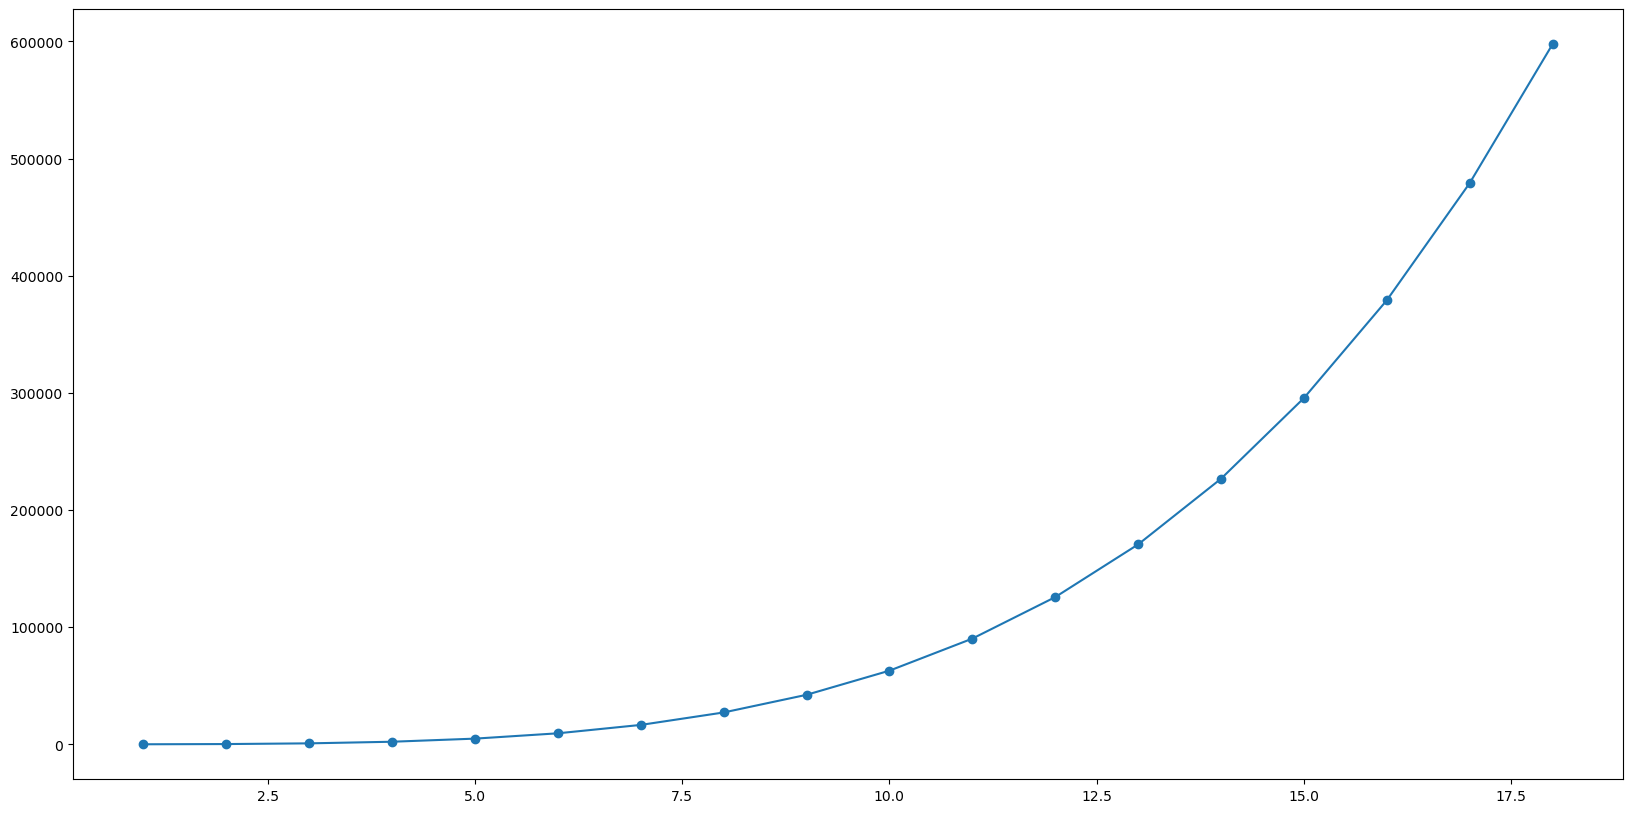

In [205]:
# Trendline of Polynomial Equations of Dataset x and y3 from the previous Lab Dataset.
# Convert the data in Dataframe into a basic List
dfqdicty3 = dfq[['y3']].to_dict(orient='records')
y3 = []

for i in dfqdicty3:
    y3.append(i['y3'])
    
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(x, y3)

#calculate equation for quadratic trendline
z = np.polyfit(x, y3, 4)
p = np.poly1d(z)  # It's proven that poly1d is successfully create the polynomial equation for y3 dataset
print(p)

#add trendline to plot
plt.plot(x, p(x))

   5     4      3     2
3 x + 8 x + 10 x + 4 x + 9 x + 17


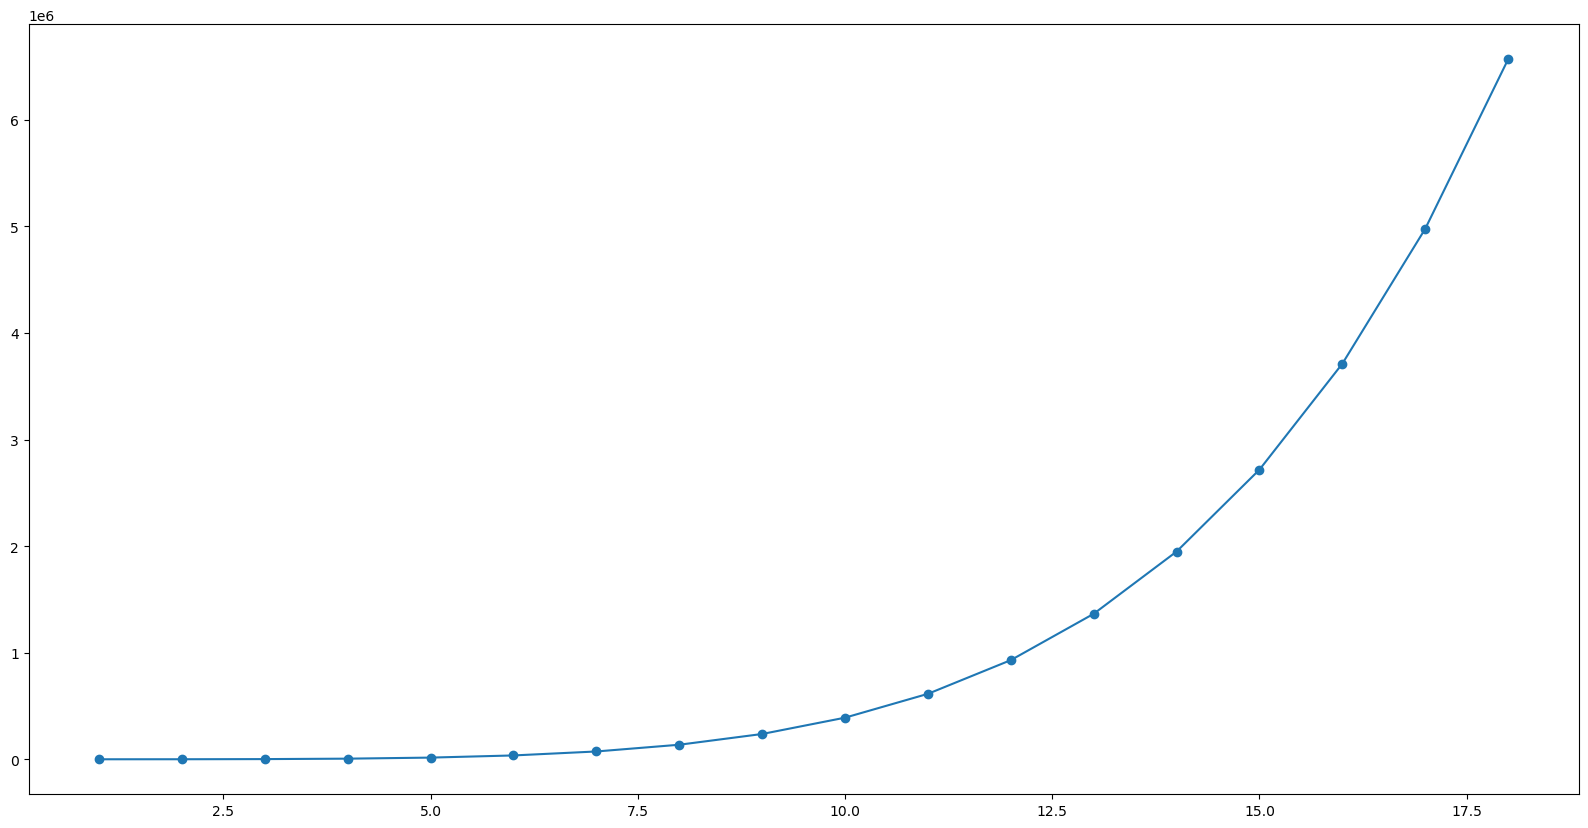

In [206]:
# Trendline of Polynomial Equations of Dataset x and y4 from the previous Lab Dataset.
# Convert the data in Dataframe into a basic List
dfqdicty4 = dfq[['y4']].to_dict(orient='records')
y4 = []

for i in dfqdicty4:
    y4.append(i['y4'])
    
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(x, y4)

#calculate equation for quadratic trendline
z = np.polyfit(x, y4, 5)
p = np.poly1d(z)  # It's proven that poly1d is successfully create the polynomial equation for y4 dataset
print(p)

#add trendline to plot
plt.plot(x, p(x))

   7     6      5      4      3     2
2 x + 9 x + 12 x + 31 x + 90 x + 6 x + 78 x + 111


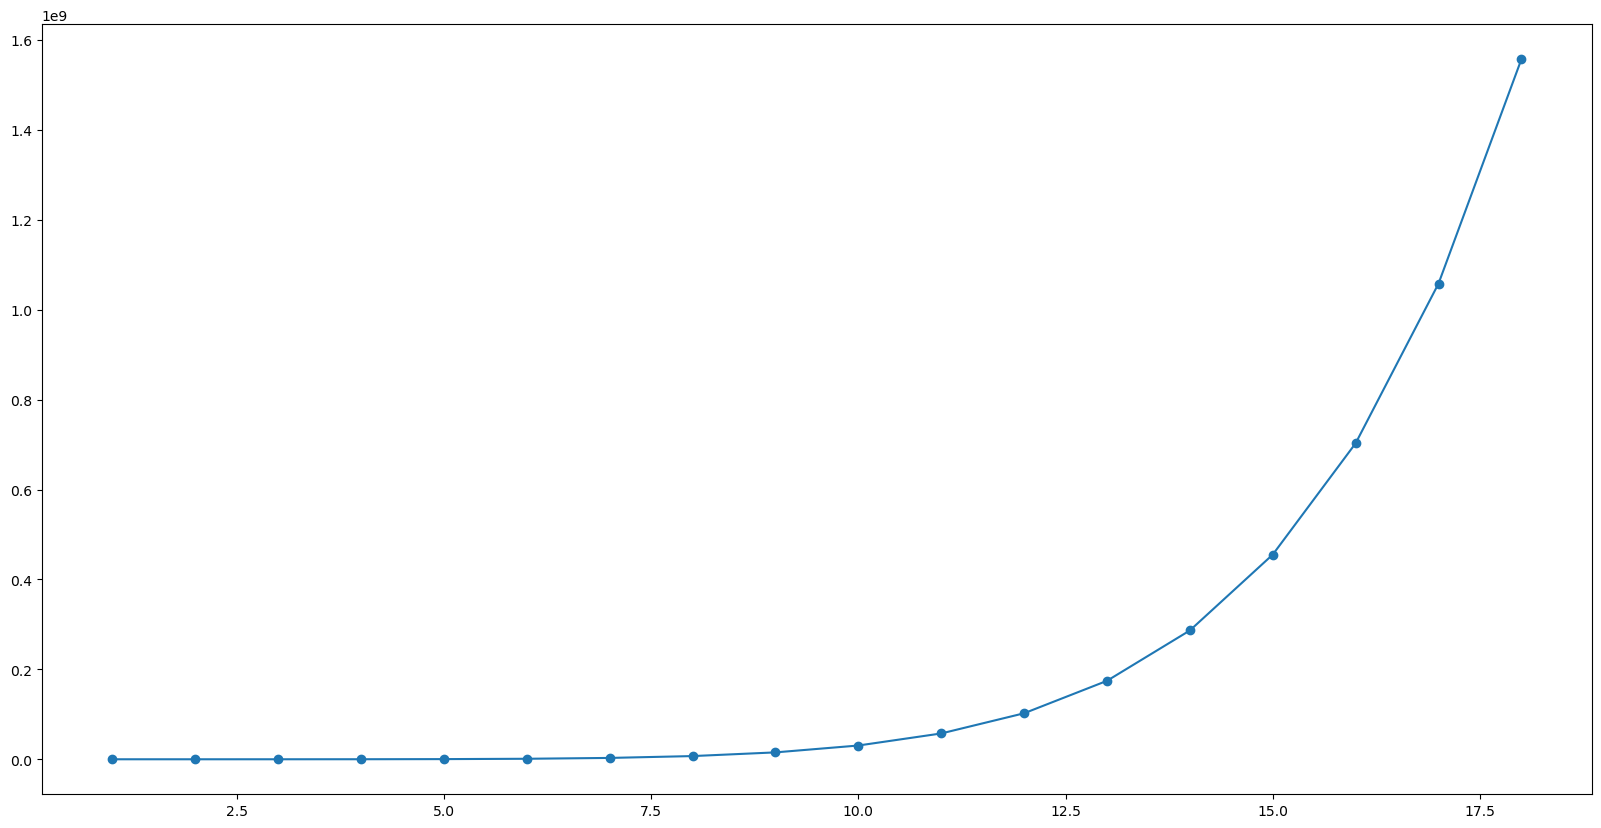

In [207]:
# Trendline of Polynomial Equations of Dataset x and y5 from the previous Lab Dataset.
# Convert the data in Dataframe into a basic List
dfqdicty5 = dfq[['y5']].to_dict(orient='records')
y5 = []

for i in dfqdicty5:
    y5.append(i['y5'])
    
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(x, y5)

#calculate equation for quadratic trendline
z = np.polyfit(x, y5, 7)
p = np.poly1d(z)  # It's proven that poly1d is successfully create the polynomial equation for y5 dataset
print(p)

#add trendline to plot
plt.plot(x, p(x))

In [208]:
# The plot of all data of all Columns/parameters
df1

Unnamed: 0                       date  temperature_2m  \
581          581  2025-03-19 05:00:00+00:00         16.7995   
582          582  2025-03-19 06:00:00+00:00         16.6995   
583          583  2025-03-19 07:00:00+00:00         15.8495   
584          584  2025-03-19 08:00:00+00:00         15.3495   
585          585  2025-03-19 09:00:00+00:00         14.6495   
...          ...                        ...             ...   
2227        2227  2025-05-26 19:00:00+00:00         21.5025   
2228        2228  2025-05-26 20:00:00+00:00         21.9025   
2229        2229  2025-05-26 21:00:00+00:00         22.0025   
2230        2230  2025-05-26 22:00:00+00:00         21.5525   
2231        2231  2025-05-26 23:00:00+00:00         20.8025   

      relative_humidity_2m  dew_point_2m  apparent_temperature  \
581                   53.0      7.163813             13.256210   
582                   53.0      7.071089             13.207399   
583                   57.0      7.343195             12.507574   
584                   59.0      7.379331             12.011299   
585                   61.0      7.208212             11.212486   
...                    ...           ...                   ...   
2227                  76.0     17.093630             23.275127   
2228                  77.0     17.687681             23.821278   
2229                  76.0     17.577087             23.358010   
2230                  75.0     16.932825             22.161495   
2231                  75.0     16.208752             21.156380   

      precipitation_probability  precipitation  rain  showers  pressure_msl  \
581                         0.0            0.0   0.0      0.0        1012.3   
582                         0.0            0.0   0.0      0.0        1012.2   
583                         0.0            0.0   0.0      0.0        1012.3   
584                         0.0            0.0   0.0      0.0        1011.8   
585                         0.0            0.0   0.0      0.0        1011.4   
...                         ...            ...   ...      ...           ...   
2227                        3.0            0.0   0.0      0.0        1018.7   
2228                        2.0            0.0   0.0      0.0        1018.1   
2229                        3.0            0.0   0.0      0.0        1017.5   
2230                        6.0            0.0   0.0      0.0        1017.1   
2231                       10.0            0.0   0.0      0.0        1017.1   

      surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
581          993.66210        100.0              0.0              0.0   
582          993.55770        100.0              0.0              0.0   
583          993.60156        100.0              0.0              0.0   
584          993.07860        100.0              0.0              0.0   
585          992.64110        100.0              0.0              0.0   
...                ...          ...              ...              ...   
2227        1000.24040        100.0            100.0             33.0   
2228         999.67584        100.0             98.0            100.0   
2229         999.09290        100.0            100.0            100.0   
2230         998.67255        100.0             74.0            100.0   
2231         998.62580        100.0             71.0            100.0   

      cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
581              100.0     24140.0       19.296133                   0.233   
582              100.0     24140.0       18.792551                   0.232   
583              100.0     24140.0       18.214718                   0.232   
584              100.0     24140.0       18.250260                   0.232   
585              100.0     24140.0       18.643690                   0.232   
...                ...         ...             ...                     ...   
2227              90.0     21100.0        5.091168                   0.265   
2228  

In [209]:
# Try to find the other Columns value when the 'temperature_2m' is maximum
#temperature_2m_max = df[df1.columns[1]].max()  # OR temperature_2m_max = df['temperature_2m'].max()
temperature_2m_max = df1['temperature_2m'].max()
print(temperature_2m_max)
df1ht2mmax = df1.where(df1['temperature_2m'] == temperature_2m_max)
df1ht2mmax = df1ht2mmax.dropna()
df1ht2mmax[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

30.8525


date  temperature_2m  relative_humidity_2m  \
2013  2025-05-17 21:00:00+00:00         30.8525                  28.0   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
2013     10.237361                        0.0              0.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
2013              0.0               0.0       26.525429   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
2013                   0.284                   0.291                   0.302   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
2013                 3.207373          27.4605               31.5175

In [210]:
# Try to find the other Columns value when the 'temperature_2m' is minimum
temperature_2m_min = df1['temperature_2m'].min()
print(temperature_2m_min)
df1ht2mmin = df1.where(df1['temperature_2m'] == temperature_2m_min)
df1ht2mmin = df1ht2mmin.dropna()
df1ht2mmin[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

-2.7975001


date  temperature_2m  relative_humidity_2m  \
636  2025-03-21 12:00:00+00:00         -2.7975                  87.0   

     dew_point_2m  precipitation_probability  cloud_cover_low  \
636     -4.659359                        0.0             10.0   

     cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
636              0.0               0.0        1.018234   

     soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
636                   0.267                   0.269                   0.273   

     vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
636                  0.06488           2.7105               -3.0825

In [211]:
# Find values when the 'precipitation_probability' is Maximum
precipitation_probability_max = df1['precipitation_probability'].max()
print(precipitation_probability_max)
df1hppmax = df1.where(df1['precipitation_probability'] == precipitation_probability_max).sort_values(by = ['cloud_cover_mid','soil_moisture_0_to_1cm'], ascending=[False,False])
df1hppmax = df1hppmax.dropna()
df1hppmax[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm',
           'cloud_cover_low','cloud_cover_high','wind_speed_10m','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

100.0


date  temperature_2m  relative_humidity_2m  \
1014  2025-04-06 06:00:00+00:00       14.902500                  97.0   
1015  2025-04-06 07:00:00+00:00       15.752501                  99.0   
1013  2025-04-06 05:00:00+00:00       15.302500                  96.0   
1017  2025-04-06 09:00:00+00:00       16.502500                  96.0   

      dew_point_2m  precipitation_probability  cloud_cover_mid  \
1014     14.430263                      100.0            100.0   
1015     15.595463                      100.0            100.0   
1013     14.668031                      100.0            100.0   
1017     15.862131                      100.0            100.0   

      soil_moisture_0_to_1cm  cloud_cover_low  cloud_cover_high  \
1014                   0.417            100.0             100.0   
1015                   0.406             99.0             100.0   
1013                   0.396            100.0             100.0   
1017                   0.390             99.0             100.0   

      wind_speed_10m  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1014       12.229406                   0.416                   0.412   
1015        7.968939                   0.404                   0.398   
1013        9.957109                   0.393                   0.393   
1017        9.793058                   0.395                   0.406   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1014                 0.050880        15.310500             16.667501  
1015                 0.017908        15.510500             16.617500  
1013                 0.069604        14.760500             18.067501  
1017                 0.075138        15.210501             14.667500

In [212]:
# Find values when the 'precipitation_probability' is 50%
df1hpp50 = df1.where(df1['precipitation_probability'] == 50).sort_values(by = ['cloud_cover_mid'], ascending=[False])
df1hpp50 = df1hpp50.dropna()
df1hpp50[['date','temperature_2m','relative_humidity_2m','dew_point_2m','precipitation_probability','cloud_cover_mid','cloud_cover_low',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']]

date  temperature_2m  relative_humidity_2m  \
2055  2025-05-19 15:00:00+00:00         20.0025                  96.0   
699   2025-03-24 03:00:00+00:00         17.2525                  90.0   
1897  2025-05-13 01:00:00+00:00         19.1525                  91.0   
1228  2025-04-15 04:00:00+00:00         17.7025                  64.0   

      dew_point_2m  precipitation_probability  cloud_cover_mid  \
2055     19.344767                       50.0             99.0   
699      15.596647                       50.0             98.0   
1897     17.647644                       50.0             95.0   
1228     10.806604                       50.0             61.0   

      cloud_cover_low  cloud_cover_high  wind_speed_10m  \
2055            100.0              99.0        6.379216   
699              99.0               4.0       16.595179   
1897              7.0              99.0        2.741678   
1228            100.0               0.0       15.188417   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
2055                   0.262                   0.263                   0.261   
699                    0.381                   0.381                   0.393   
1897                   0.315                   0.317                   0.322   
1228                   0.358                   0.307                   0.226   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
2055                 0.093540        20.160500             27.417501  
699                  0.196987        15.910501             15.917500  
1897                 0.199684        20.010500             19.617500  
1228                 0.729761        17.610500             17.017500

In [213]:
# Find values when the 'precipitation_probability' is Minimum
precipitation_probability_min = df1['precipitation_probability'].min()
print(precipitation_probability_min)
df1hppmin = df1.where(df1['precipitation_probability'] == precipitation_probability_min).sort_values(by = ['cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True]).head(5)
df1hppmin = df1hppmin.dropna()
df1hppmin[['date','temperature_2m','precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm',
           'soil_moisture_3_to_9cm','relative_humidity_2m','cloud_cover_high','dew_point_2m','vapour_pressure_deficit',
           'cloud_cover_low','wind_speed_10m','soil_moisture_1_to_3cm','temperature_80m','soil_temperature_0cm']]

0.0


date  temperature_2m  precipitation_probability  \
1374  2025-04-21 06:00:00+00:00         22.3525                        0.0   
1373  2025-04-21 05:00:00+00:00         22.5025                        0.0   
1341  2025-04-19 21:00:00+00:00         27.7025                        0.0   
1340  2025-04-19 20:00:00+00:00         28.1025                        0.0   
1322  2025-04-19 02:00:00+00:00         25.0025                        0.0   

      cloud_cover_mid  soil_moisture_0_to_1cm  soil_moisture_3_to_9cm  \
1374              0.0                   0.149                   0.195   
1373              0.0                   0.149                   0.196   
1341              0.0                   0.161                   0.202   
1340              0.0                   0.163                   0.203   
1322              0.0                   0.169                   0.210   

      relative_humidity_2m  cloud_cover_high  dew_point_2m  \
1374                  58.0               9.0     13.688183   
1373                  53.0               0.0     12.447384   
1341                  45.0              98.0     14.694766   
1340                  46.0              63.0     15.399475   
1322                  36.0               0.0      8.896405   

      vapour_pressure_deficit  cloud_cover_low  wind_speed_10m  \
1374                 1.134731              0.0       17.771753   
1373                 1.281522              0.0       13.441071   
1341                 2.042824              5.0       10.799999   
1340                 2.052846             27.0       12.522619   
1322                 2.028199              0.0        7.628263   

      soil_moisture_1_to_3cm  temperature_80m  soil_temperature_0cm  
1374                   0.168          21.3605             20.267500  
1373                   0.168          21.4605             19.817501  
1341                   0.179          25.6105             31.167501  
1340                   0.180          25.6605             32.467500  
1322                   0.186          22.6605             20.667501

In [214]:
# Try to find the other Columns value when the 'relative_humidity_2m' is maximum
relative_humidity_2m_max = df1['relative_humidity_2m'].max()
print(relative_humidity_2m_max)
df1hrh2mmax = df1.where(df1['relative_humidity_2m'] == relative_humidity_2m_max)
df1hrh2mmax = df1hrh2mmax.dropna()
df1hrh2mmax[['date','relative_humidity_2m','temperature_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']].sort_values(by='precipitation_probability', ascending=False)

100.0


date  relative_humidity_2m  temperature_2m  \
1016  2025-04-06 08:00:00+00:00                 100.0         15.8025   
1010  2025-04-06 02:00:00+00:00                 100.0         16.1025   
951   2025-04-03 15:00:00+00:00                 100.0         18.9525   
1009  2025-04-06 01:00:00+00:00                 100.0         17.1525   
952   2025-04-03 16:00:00+00:00                 100.0         19.5025   
2080  2025-05-20 16:00:00+00:00                 100.0         22.1025   
1671  2025-05-03 15:00:00+00:00                 100.0         16.3525   
1457  2025-04-24 17:00:00+00:00                 100.0         19.5025   
1741  2025-05-06 13:00:00+00:00                 100.0         11.9525   
1790  2025-05-08 14:00:00+00:00                 100.0         18.6525   
1932  2025-05-14 12:00:00+00:00                 100.0         16.7525   
1934  2025-05-14 14:00:00+00:00                 100.0         19.1525   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
1016     15.802500                       99.0             61.0   
1010     16.102500                       87.0            100.0   
951      18.952500                       86.0            100.0   
1009     17.152498                       72.0            100.0   
952      19.502502                       57.0            100.0   
2080     22.102500                       45.0            100.0   
1671     16.352500                       37.0            100.0   
1457     19.502502                       35.0            100.0   
1741     11.952499                        0.0            100.0   
1790     18.652498                        0.0            100.0   
1932     16.752500                        0.0            100.0   
1934     19.152498                        0.0            100.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
1016             98.0             100.0       15.696165   
1010            100.0              98.0        3.396233   
951              76.0               0.0        2.305125   
1009            100.0              98.0        6.479999   
952              95.0               0.0        5.815978   
2080             99.0              99.0        8.404285   
1671            100.0              97.0       13.217443   
1457            100.0              58.0        1.484318   
1741              0.0               0.0        3.096837   
1790              0.0               0.0        0.509117   
1932              0.0               0.0        5.804825   
1934              0.0               0.0        8.404285   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1016                   0.427                   0.432                   0.440   
1010                   0.400                   0.402                   0.361   
951                    0.377                   0.376                   0.377   
1009                   0.332                   0.306                   0.294   
952                    0.339                   0.350                   0.362   
2080                   0.295                   0.295                   0.288   
1671                   0.347                   0.350                   0.356   
1457                   0.306                   0.308                   0.305   
1741                   0.297                   0.299                   0.303   
1790                   0.306                   0.308                   0.311   
1932                   0.300                   0.302                   0.307   
1934                   0.297                   0.300                   0.306   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1016             0.000000e+00        15.810500             15.867499  
1010             0.000000e+00        13.610500             20.617500  
951              0.000000e+00        17.460500             21.717500  
1009             1.192093e-07        12.910501             21.717500  
952              0.000000e+00        18.010500        

In [215]:
# Conclusion: when 'relative_humidity_2m' reaches maximum, the 'precipitation_probability' is one of the highest also.
# This concurs to common logic, in contrary to condition in Las Vegas
# (precipitation_probability is extremely low when the 'relative_humidity_2m' reaches maximum).

In [216]:
# Find values when the 'relative_humidity_2m' is 50%
df1hrh50 = df1.where(df1['relative_humidity_2m'] == 50).sort_values(by = ['precipitation_probability'], ascending=[False])
df1hrh50 = df1hrh50.dropna()
df1hrh50[['date','relative_humidity_2m','temperature_2m','vapour_pressure_deficit','dew_point_2m','precipitation_probability','cloud_cover_mid','cloud_cover_low',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','temperature_80m','soil_temperature_0cm']]

date  relative_humidity_2m  temperature_2m  \
1227  2025-04-15 03:00:00+00:00                  50.0       23.252500   
1439  2025-04-23 23:00:00+00:00                  50.0       26.402500   
1225  2025-04-15 01:00:00+00:00                  50.0       25.702500   
832   2025-03-29 16:00:00+00:00                  50.0       22.152500   
1943  2025-05-14 23:00:00+00:00                  50.0       28.052500   
1941  2025-05-14 21:00:00+00:00                  50.0       28.052500   
827   2025-03-29 11:00:00+00:00                  50.0       20.002500   
2036  2025-05-18 20:00:00+00:00                  50.0       27.102500   
1216  2025-04-14 16:00:00+00:00                  50.0       25.952500   
1307  2025-04-18 11:00:00+00:00                  50.0       18.552500   
1206  2025-04-14 06:00:00+00:00                  50.0       17.652500   
1412  2025-04-22 20:00:00+00:00                  50.0       24.852500   
1414  2025-04-22 22:00:00+00:00                  50.0       24.102500   
1085  2025-04-09 05:00:00+00:00                  50.0        4.002500   
1611  2025-05-01 03:00:00+00:00                  50.0       24.602500   
1746  2025-05-06 18:00:00+00:00                  50.0       21.352500   
1057  2025-04-08 01:00:00+00:00                  50.0       11.002501   
914   2025-04-02 02:00:00+00:00                  50.0       15.502501   
2019  2025-05-18 03:00:00+00:00                  50.0       22.002500   
1343  2025-04-19 23:00:00+00:00                  50.0       26.852500   

      vapour_pressure_deficit  dew_point_2m  precipitation_probability  \
1227                 1.426596     12.251946                       39.0   
1439                 1.720850     15.145651                       19.0   
1225                 1.651252     14.502851                       11.0   
832                  1.334735     11.240775                        4.0   
1943                 1.895097     16.660276                        3.0   
1941                 1.895097     16.660276                        2.0   
827                  1.169993      9.263409                        1.0   
2036                 1.792990     15.788316                        1.0   
1216                 1.675822     14.732438                        0.0   
1307                 1.069192      7.929086                        0.0   
1206                 1.010522      7.100584                        0.0   
1412                 1.570049     13.722118                        0.0   
1414                 1.501311     13.033067                        0.0   
1085                 0.407752     -5.493462                        0.0   
1611                 1.546837     13.492453                        0.0   
1746                 1.271212     10.505167                        0.0   
1057                 0.657563      0.971700                        0.0   
914                  0.881633      5.120452                        0.0   
2019                 1.322617     11.102864                        0.0   
1343                 1.766929     15.558811                        0.0   

      cloud_cover_mid  cloud_cover_low  cloud_cover_high  wind_speed_10m  \
1227              0.0             97.0               0.0        2.305125   
1439             13.0             16.0              99.0       10.137692   
1225              0.0             10.0               0.0       12.261158   
832             100.0              0.0              98.0       23.675303   
1943             42.0            100.0               0.0       17.819090   
1941              3.0              8.0               0.0       17.057314   
827              15.0              0.0              76.0        9.255571   
2036              7.0              8.0              17.0        5.052841   
1216              2.0              0.0              19.0       17.974781   
1307             99.0              6.0               0.0       15.379206   
1206              0.0              0.0               0.0        7.421590   
1412              0.0     

In [217]:
# Conclusion: when 'relative_humidity_2m' reaches 50%, the highest 'precipitation_probability' is 39%.

In [218]:
# Try to find the other Columns value when the 'relative_humidity_2m' is minimum
relative_humidity_2m_min = df1['relative_humidity_2m'].min()
print(relative_humidity_2m_min)
df1hrh2mmin = df1.where(df1['relative_humidity_2m'] == relative_humidity_2m_min)
df1hrh2mmin = df1hrh2mmin.dropna()
df1hrh2mmin[['date','relative_humidity_2m','temperature_2m','dew_point_2m','precipitation_probability','cloud_cover_low','cloud_cover_mid',
            'cloud_cover_high','wind_speed_10m','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm',
            'soil_moisture_3_to_9cm','vapour_pressure_deficit','temperature_80m','soil_temperature_0cm']].sort_values(by='precipitation_probability', ascending=True)

19.0


date  relative_humidity_2m  temperature_2m  \
1269  2025-04-16 21:00:00+00:00                  19.0         21.5525   
1270  2025-04-16 22:00:00+00:00                  19.0         21.5525   
1271  2025-04-16 23:00:00+00:00                  19.0         20.8025   

      dew_point_2m  precipitation_probability  cloud_cover_low  \
1269     -3.064591                        0.0              0.0   
1270     -3.064591                        0.0              0.0   
1271     -3.681689                        0.0              0.0   

      cloud_cover_mid  cloud_cover_high  wind_speed_10m  \
1269              0.0               0.0        6.369050   
1270              0.0              37.0        5.400000   
1271              0.0              24.0        5.315336   

      soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  \
1269                   0.217                   0.232                   0.246   
1270                   0.215                   0.229                   0.244   
1271                   0.213                   0.227                   0.243   

      vapour_pressure_deficit  temperature_80m  soil_temperature_0cm  
1269                 2.085398          17.6605               24.8675  
1270                 2.085398          17.5105               22.7175  
1271                 1.991730          17.2605               19.6175

In [219]:
# Conclusion: when the 'relative_humidity_2m' reaches minimum (19%), the 'precipitation_probability' reaches minimum also (0%).

In [220]:
# Find Daily Average of Precipitation Probability (Table)
dfda1 = df1.groupby('ymd')[df1h.columns[0:]].mean().sort_values('precipitation_probability', ascending=False).head(5)
dfda1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-04-06                  54.833333        93.708333   
2025-04-03                  51.375000        81.875000   
2025-05-03                  31.291667        91.291667   
2025-03-31                  27.500000        49.291667   
2025-05-12                  26.791667        58.250000   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-04-06                0.352958                0.354542   
2025-04-03                0.298792                0.300750   
2025-05-03                0.335875                0.339000   
2025-03-31                0.309292                0.311667   
2025-05-12                0.341292                0.339500   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-04-06             96.041667     13.331632                 0.061971   
2025-04-03             82.125000     17.717496                 0.574346   
2025-05-03             91.250000     15.129816                 0.165439   
2025-03-31             87.791667     13.269716                 0.212106   
2025-05-12             83.166667     17.631228                 0.468887   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-04-06       13.954583         74.041667        96.625000        8.261871   
2025-04-03       21.369167         76.250000        71.541667       14.200839   
2025-05-03       16.571250         89.041667        63.166667        8.347819   
2025-03-31       15.308750         62.000000        78.166667       10.745450   
2025-05-12       20.823333         71.666667        74.041667        8.622397   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-04-06                0.358708        13.395917             15.734167  
2025-04-03                0.309208        20.304250             22.555000  
2025-05-03                0.340208        15.714667             18.230000  
2025-03-31                0.308917        14.941750             17.171667  
2025-05-12                0.335333        19.356333             21.830000

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

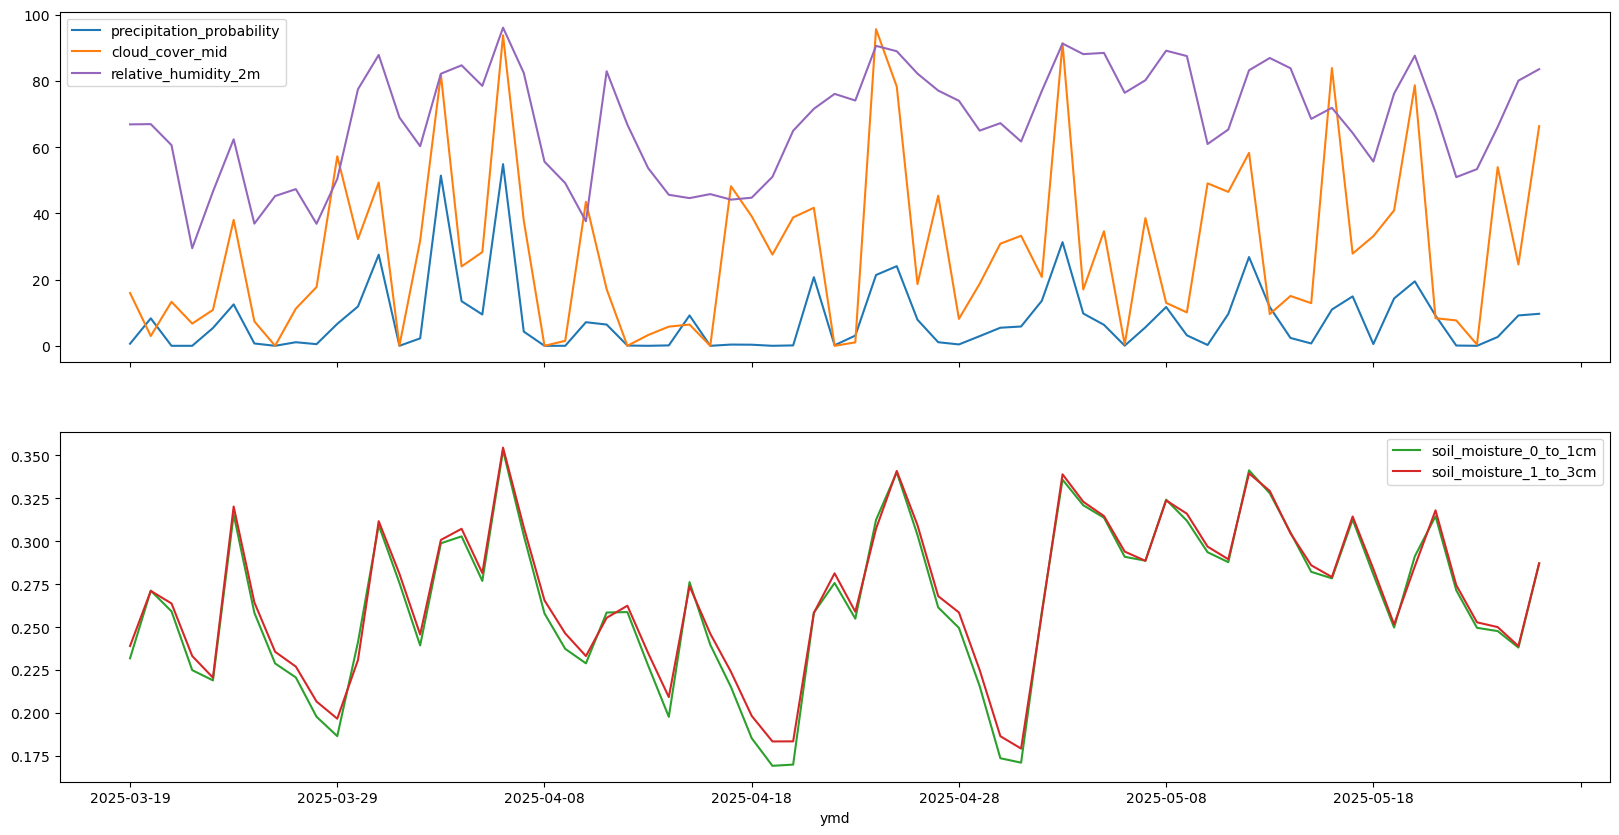

In [221]:
# Find Daily Average of Precipitation Probability (Plot)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)  # Set global size for all plots
dfda2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values('ymd', ascending=True)
dfda2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [222]:
# Find Daily Average of Relative Humidity 2m (Table)
dfda3 = df1.groupby('ymd')[df1h.columns[[4,0]]].mean().sort_values('relative_humidity_2m', ascending=False).head(10)
dfda3

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-04-06             96.041667                  54.833333
2025-05-03             91.250000                  31.291667
2025-04-24             90.541667                  21.375000
2025-05-08             89.083333                  11.708333
2025-04-25             88.916667                  24.041667
2025-05-05             88.416667                   6.333333
2025-05-04             88.041667                   9.750000
2025-03-31             87.791667                  27.500000
2025-05-20             87.583333                  19.458333
2025-05-09             87.458333                   3.166667

In [223]:
# Find Monthly Average values of Precipitation Probability (Table)
dfma1 = df1.groupby(['year','month'])[df1h.columns[0:]].mean().sort_values(by = ['precipitation_probability','cloud_cover_mid',
                                        'soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
                                        'relative_humidity_2m','cloud_cover_high','dew_point_2m','vapour_pressure_deficit'], 
                                        ascending=[False,False,False,False,False,False,False,False,False,False])
dfma1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 05                      8.831731        33.673077   
     04                      8.218056        28.886111   
     03                      5.859935        20.283388   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 05                   0.287492                0.289117   
     04                   0.253883                0.259607   
     03                   0.243567                0.247840   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 05                74.913462     14.547957                 0.671594   
     04                66.851389     10.539709                 0.786940   
     03                54.768730      5.096467                 0.880913   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 05          19.638878         39.136218        42.022436        8.303039   
     04          17.725695         30.741667        33.441667        9.382421   
     03          15.285845         18.687296        26.322476       11.941970   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 05                   0.292835        18.513705             20.397869  
     04                   0.269937        16.591750             18.325139  
     03                   0.256166        14.110012             15.050236

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

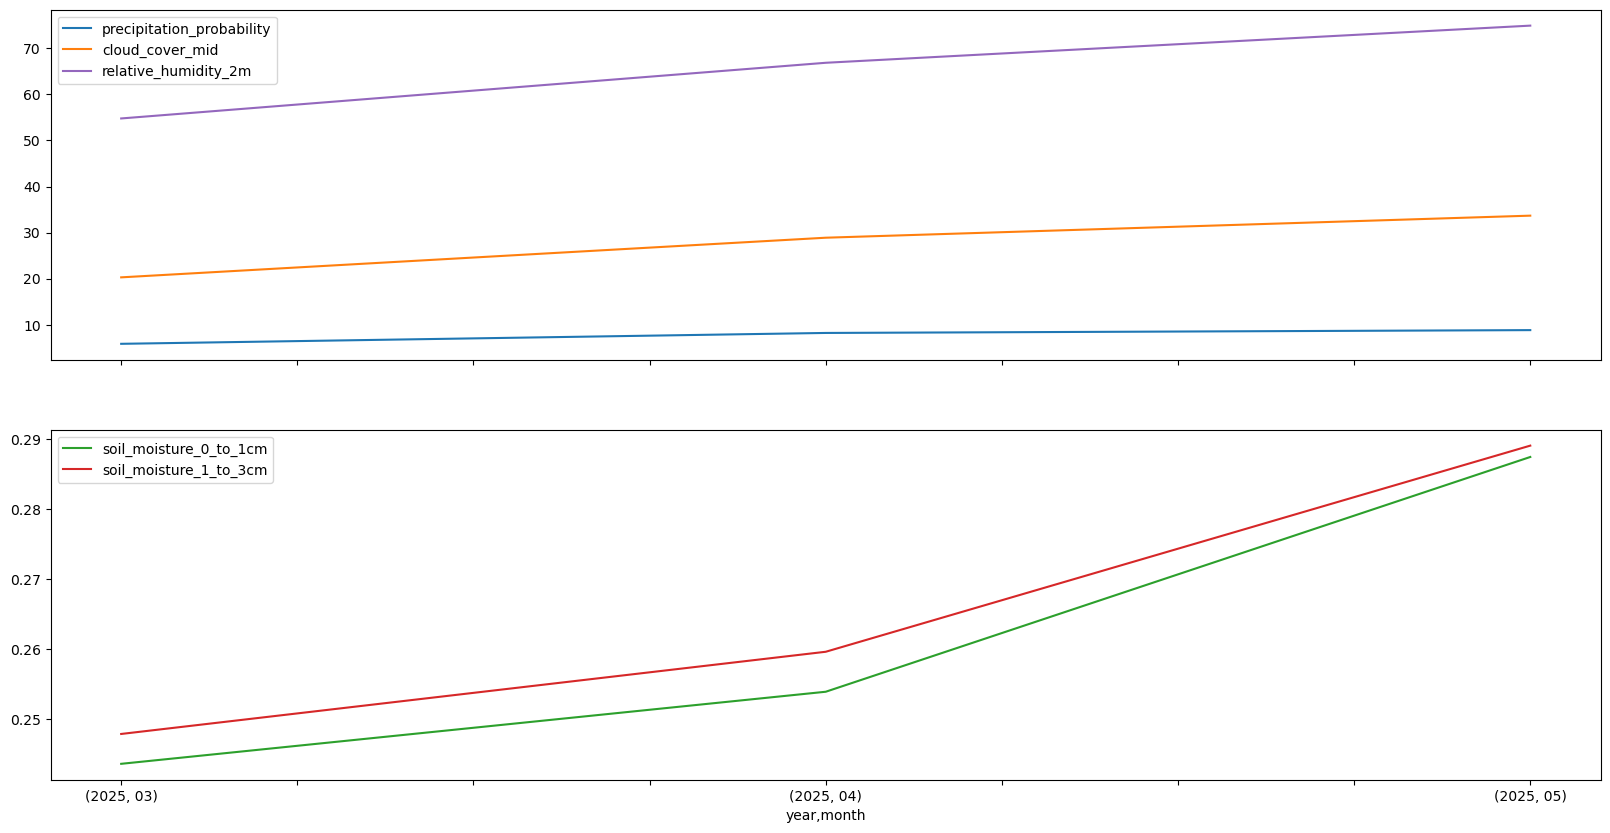

In [224]:
# Find Monthly Average values of Precipitation Probability (Plot)
dfma2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values(by = ['year', 'month'], ascending=[True,True])
# dfma2.plot(subplots=[('precipitation_probability', 'soil_moisture_0_to_1cm')])
dfma2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [225]:
# Find Monthly Average values of Relative Humidity 2m (Table)
dfma3 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].mean().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfma3

relative_humidity_2m  precipitation_probability
year month                                                 
2025 05                74.913462                   8.831731
     04                66.851389                   8.218056
     03                54.768730                   5.859935

In [226]:
# Find Hourly Average values of Precipitation Probability (Table)
dfha1 = df1.groupby(['hmstz'])[df1h.columns[0:]].mean().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfha1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
23:00:00+00:00                  10.942029        28.840580   
00:00:00+00:00                  10.823529        34.941176   
01:00:00+00:00                  10.647059        30.588235   
22:00:00+00:00                  10.608696        29.768116   
02:00:00+00:00                   9.779412        28.205882   
16:00:00+00:00                   8.652174        27.115942   
21:00:00+00:00                   8.202899        31.347826   
03:00:00+00:00                   8.000000        30.205882   
14:00:00+00:00                   7.985507        30.666667   
15:00:00+00:00                   7.956522        30.405797   
17:00:00+00:00                   7.927536        25.231884   
04:00:00+00:00                   7.602941        30.308824   
20:00:00+00:00                   7.478261        25.449275   
12:00:00+00:00                   7.246377        34.782609   
05:00:00+00:00                   7.246377        28.579710   
06:00:00+00:00                   7.246377        25.246377   
07:00:00+00:00                   7.231884        27.057971   
13:00:00+00:00                   7.217391        31.362319   
18:00:00+00:00                   7.057971        30.768116   
19:00:00+00:00                   6.971014        28.231884   
11:00:00+00:00                   6.913043        29.318841   
08:00:00+00:00                   6.623188        31.565217   
09:00:00+00:00                   6.057971        23.231884   
10:00:00+00:00                   5.956522        25.202899   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
23:00:00+00:00                0.263391                0.268696   
00:00:00+00:00                0.257765                0.262956   
01:00:00+00:00                0.259250                0.263735   
22:00:00+00:00                0.259449                0.265130   
02:00:00+00:00                0.260721                0.265397   
16:00:00+00:00                0.267812                0.271594   
21:00:00+00:00                0.261406                0.265928   
03:00:00+00:00                0.266338                0.268471   
14:00:00+00:00                0.270246                0.272580   
15:00:00+00:00                0.269029                0.271899   
17:00:00+00:00                0.266000                0.270580   
04:00:00+00:00                0.264985                0.268838   
20:00:00+00:00                0.260623                0.267478   
12:00:00+00:00                0.269493                0.271333   
05:00:00+00:00                0.263609                0.267986   
06:00:00+00:00                0.264725                0.268623   
07:00:00+00:00                0.263739                0.267594   
13:00:00+00:00                0.269696                0.272681   
18:00:00+00:00                0.265739                0.271565   
19:00:00+00:00                0.261986                0.268797   
11:00:00+00:00                0.269942                0.271014   
08:00:00+00:00                0.263420                0.267290   
09:00:00+00:00                0.264681                0.267116   
10:00:00+00:00                0.267768                0.268261   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
23:00:00+00:00             56.173913     10.882049                 1.214140   
00:00:00+00:00             57.529412     10.437071                 1.106596   
01:00:00+00:00             62.029412     10.544955                 0.886789   
22:00:00+00:00             55.724638     11.495598                 1.272770   
02:00:00+00:00             65.823529     10.718384                 0.747160   
16:00:00+00:00             67.014493     12.405831                 0.796096   
21:00:00+00:00             53.695652     11.403278    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

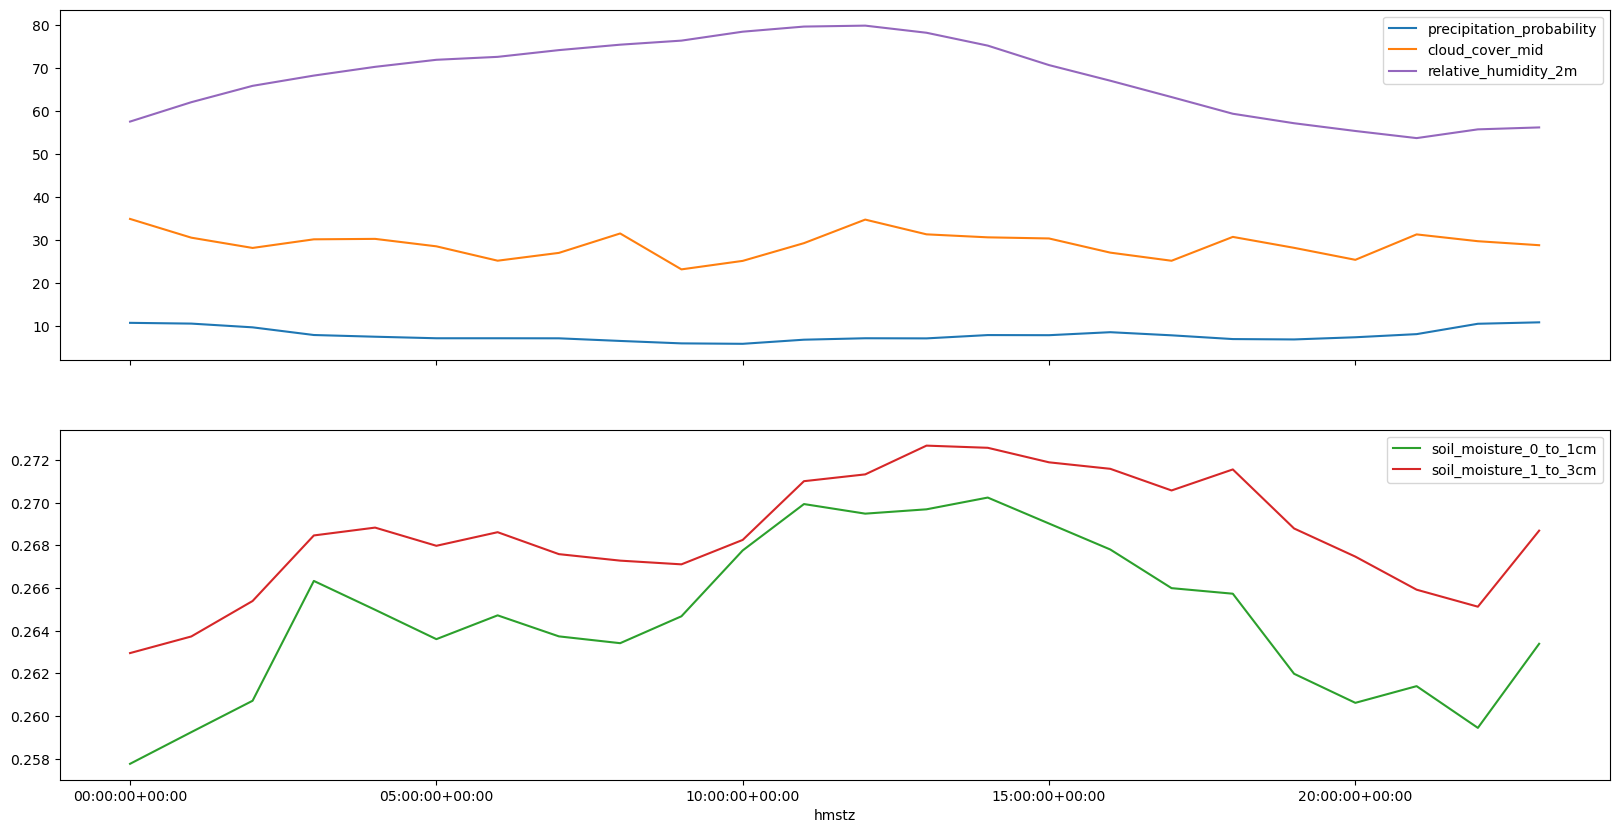

In [227]:
# Find Hourly Average values of Precipitation Probability (Plot)
dfha2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].mean().sort_values(by = ['hmstz'], ascending=[True])
dfha2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [228]:
# Find Hourly Average values of Relative Humidity 2m (Table)
dfha3 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].mean().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfha3

relative_humidity_2m  precipitation_probability
hmstz                                                          
12:00:00+00:00             79.797101                   7.246377
11:00:00+00:00             79.579710                   6.913043
10:00:00+00:00             78.391304                   5.956522
13:00:00+00:00             78.144928                   7.217391
09:00:00+00:00             76.318841                   6.057971
08:00:00+00:00             75.376812                   6.623188
14:00:00+00:00             75.159420                   7.985507
07:00:00+00:00             74.115942                   7.231884
06:00:00+00:00             72.550725                   7.246377
05:00:00+00:00             71.869565                   7.246377
15:00:00+00:00             70.637681                   7.956522
04:00:00+00:00             70.235294                   7.602941
03:00:00+00:00             68.205882                   8.000000
16:00:00+00:00             67.014493                   8.652174
02:00:00+00:00             65.823529                   9.779412
17:00:00+00:00             63.217391                   7.927536
01:00:00+00:00             62.029412                  10.647059
18:00:00+00:00             59.347826                   7.057971
00:00:00+00:00             57.529412                  10.823529
19:00:00+00:00             57.144928                   6.971014
23:00:00+00:00             56.173913                  10.942029
22:00:00+00:00             55.724638                  10.608696
20:00:00+00:00             55.347826                   7.478261
21:00:00+00:00             53.695652                   8.202899

In [229]:
# Observation Result:
# - The fluctuation of average relative humidity and soil moisture values is relatively similar. Maybe, it's due to partial condensation
#   phenomenon, so when the precipitation probability is relatively stable (almost flat), the soil moisture is still fluctuating.
#   This phenomenon is used in Fog Farming to supply fresh water in arid/semi-arid area by using a lot of nets to help water vapour condensation.

In [230]:
# Find Daily Maximum of Precipitation Probability (Table)
dfdmax1 = df1.groupby('ymd')[df1h.columns[0:]].max().sort_values('precipitation_probability', ascending=False).head(5)
dfdmax1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-04-06                      100.0            100.0   
2025-04-03                       97.0            100.0   
2025-05-21                       97.0            100.0   
2025-05-03                       93.0            100.0   
2025-03-31                       90.0            100.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-04-06                   0.427                   0.432   
2025-04-03                   0.423                   0.407   
2025-05-21                   0.402                   0.401   
2025-05-03                   0.400                   0.404   
2025-03-31                   0.390                   0.393   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-04-06                 100.0     17.785336                 0.115238   
2025-04-03                 100.0     21.519682                 2.017349   
2025-05-21                  96.0     19.394514                 2.361591   
2025-05-03                 100.0     16.352500                 0.292116   
2025-03-31                  96.0     18.642853                 0.446352   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-04-06         18.6025             100.0            100.0       16.800856   
2025-04-03         27.8025             100.0            100.0       30.248568   
2025-05-21         26.8025              98.0            100.0       26.319422   
2025-05-03         17.6525             100.0            100.0       21.862406   
2025-03-31         20.9525             100.0            100.0       18.723460   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-04-06                   0.440          19.6105             23.067501  
2025-04-03                   0.403          25.4605             25.167501  
2025-05-21                   0.384          23.1605             29.867500  
2025-05-03                   0.388          16.5105             21.867500  
2025-03-31                   0.363          20.8605             20.367500

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

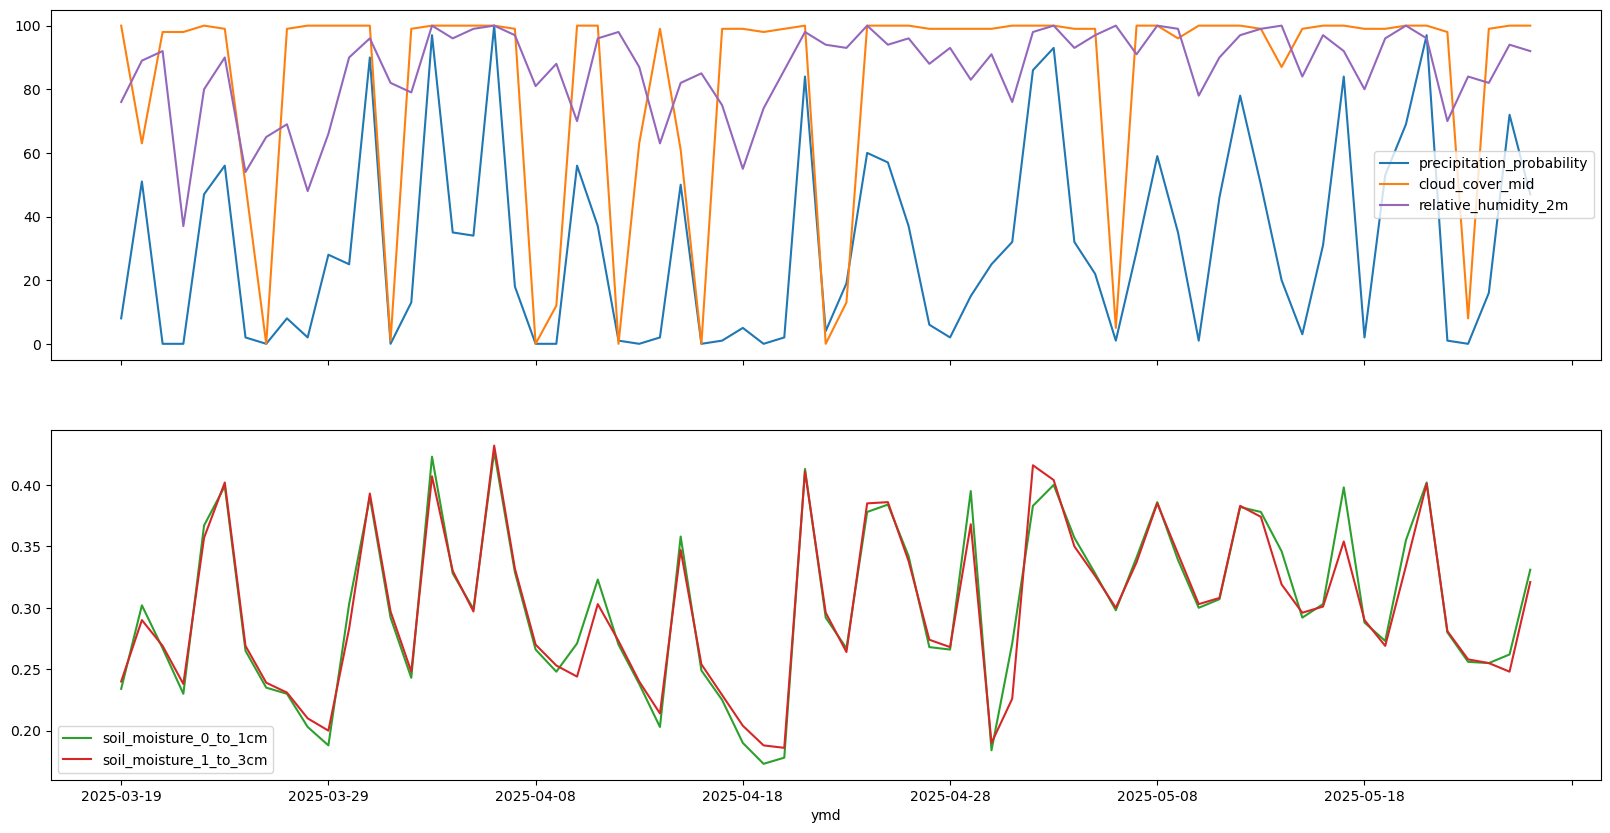

In [231]:
# Find Daily Maximum of Precipitation Probability (Plot)
dfdmax2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values('ymd', ascending=True)
dfdmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [232]:
# Find Daily Maximum of Relative Humidity 2m (Table)
dfdmax2 = df1.groupby('ymd')[df1h.columns[[4,0]]].max().sort_values('relative_humidity_2m', ascending=False).head(10)
dfdmax2

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-04-03                 100.0                       97.0
2025-05-08                 100.0                       59.0
2025-04-24                 100.0                       60.0
2025-05-03                 100.0                       93.0
2025-05-20                 100.0                       69.0
2025-04-06                 100.0                      100.0
2025-05-14                 100.0                       20.0
2025-05-06                 100.0                        1.0
2025-04-05                  99.0                       34.0
2025-05-13                  99.0                       50.0

In [233]:
# Find Monthly Maximum values of Precipitation Probability (Table)
dfmmax1 = df1.groupby(['year','month'])[df1h.columns[0:]].max().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmmax1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 04                         100.0            100.0   
     05                          97.0            100.0   
     03                          90.0            100.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 04                      0.427                   0.432   
     05                      0.402                   0.416   
     03                      0.399                   0.402   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 04                    100.0     22.277930                 2.821701   
     05                    100.0     23.446577                 3.207373   
     03                     96.0     19.002602                 2.434383   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 04            30.6025             100.0            100.0       30.633865   
     05            30.8525             100.0            100.0       27.103000   
     03            26.8525             100.0            100.0       30.018473   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 04                      0.440        27.560501             34.967500  
     05                      0.388        28.810501             34.367500  
     03                      0.393        23.760500             29.317501

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

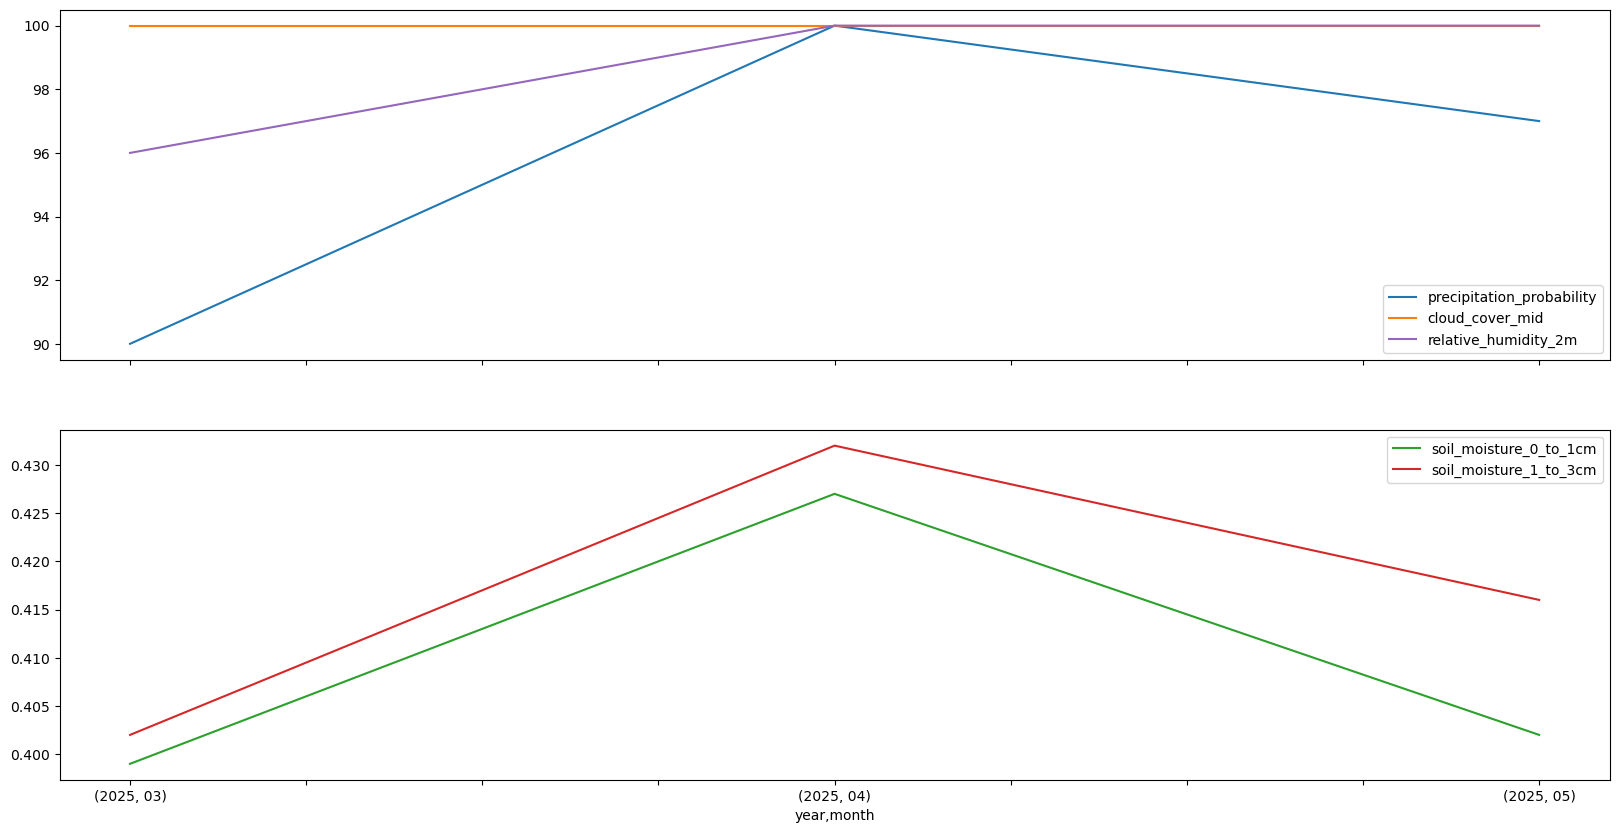

In [234]:
# Find Monthly Maximum values of Precipitation Probability (Plot)
dfmmax2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values(by = ['year','month'], ascending=[True,True])
dfmmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [235]:
# Find Monthly Maximum values of Relative Humidity 2m (Table)
dfmmax2 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].max().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfmmax2

relative_humidity_2m  precipitation_probability
year month                                                 
2025 04                    100.0                      100.0
     05                    100.0                       97.0
     03                     96.0                       90.0

In [236]:
# Find Hourly Maximum values of Precipitation Probability (Table)
dfhmax1 = df1.groupby(['hmstz'])[df1h.columns[0:]].max().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfhmax1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
06:00:00+00:00                      100.0            100.0   
07:00:00+00:00                      100.0            100.0   
05:00:00+00:00                      100.0            100.0   
09:00:00+00:00                      100.0            100.0   
08:00:00+00:00                       99.0            100.0   
00:00:00+00:00                       97.0            100.0   
11:00:00+00:00                       97.0            100.0   
03:00:00+00:00                       95.0            100.0   
18:00:00+00:00                       93.0            100.0   
14:00:00+00:00                       92.0            100.0   
17:00:00+00:00                       92.0            100.0   
12:00:00+00:00                       91.0            100.0   
04:00:00+00:00                       90.0            100.0   
10:00:00+00:00                       90.0            100.0   
13:00:00+00:00                       89.0            100.0   
02:00:00+00:00                       87.0            100.0   
15:00:00+00:00                       86.0            100.0   
19:00:00+00:00                       86.0            100.0   
22:00:00+00:00                       86.0            100.0   
01:00:00+00:00                       72.0            100.0   
20:00:00+00:00                       71.0            100.0   
16:00:00+00:00                       70.0            100.0   
21:00:00+00:00                       64.0            100.0   
23:00:00+00:00                       59.0            100.0   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
06:00:00+00:00                   0.417                   0.416   
07:00:00+00:00                   0.406                   0.404   
05:00:00+00:00                   0.396                   0.393   
09:00:00+00:00                   0.390                   0.395   
08:00:00+00:00                   0.427                   0.432   
00:00:00+00:00                   0.402                   0.401   
11:00:00+00:00                   0.378                   0.385   
03:00:00+00:00                   0.398                   0.396   
18:00:00+00:00                   0.386                   0.416   
14:00:00+00:00                   0.413                   0.411   
17:00:00+00:00                   0.375                   0.376   
12:00:00+00:00                   0.383                   0.384   
04:00:00+00:00                   0.394                   0.391   
10:00:00+00:00                   0.377                   0.362   
13:00:00+00:00                   0.401                   0.393   
02:00:00+00:00                   0.400                   0.402   
15:00:00+00:00                   0.406                   0.405   
19:00:00+00:00                   0.384                   0.386   
22:00:00+00:00                   0.373                   0.353   
01:00:00+00:00                   0.386                   0.371   
20:00:00+00:00                   0.423                   0.407   
16:00:00+00:00                   0.400                   0.404   
21:00:00+00:00                   0.383                   0.385   
23:00:00+00:00                   0.395                   0.385   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
06:00:00+00:00                  97.0     19.825928                 1.557914   
07:00:00+00:00                  99.0     19.963972                 1.581724   
05:00:00+00:00                  96.0     19.922579                 1.605850   
09:00:00+00:00                  97.0     20.332212                 1.380920   
08:00:00+00:00                 100.0     19.970184                 1.422268   
00:00:00+00:00                  97.0     20.266685                 2.786320   
11:00:00+00:00                  98.0     20.572153    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

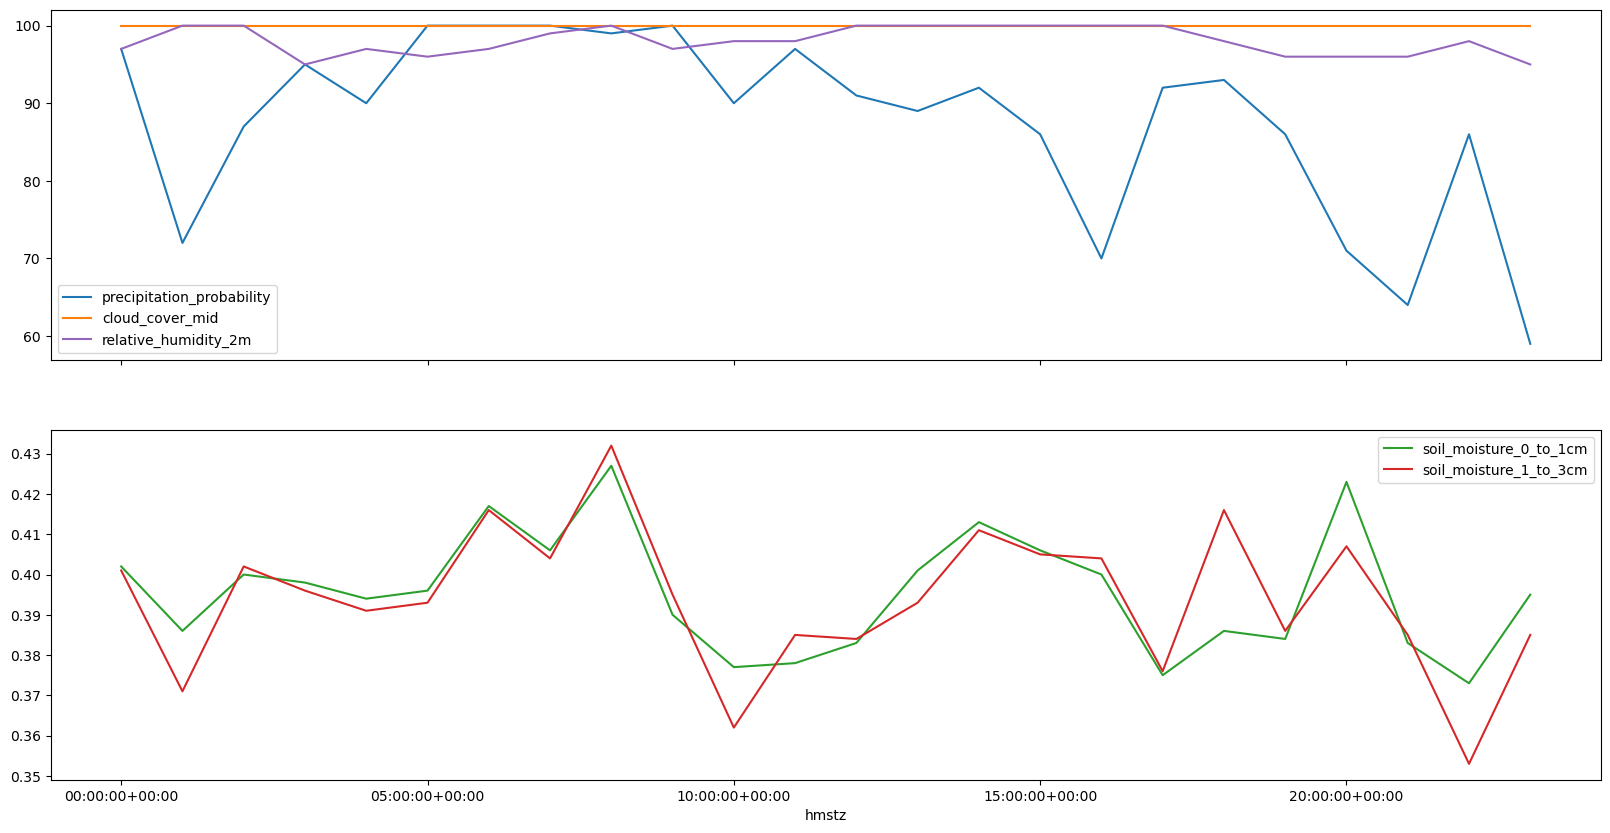

In [237]:
# Find Hourly Maximum values of Precipitation Probability (Plot)
dfhmax2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].max().sort_values(by = ['hmstz'], ascending=[True])
dfhmax2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [238]:
# Find Hourly Maximum values of Relative Humidity 2m (Table)
dfhmax2 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].max().sort_values(by = ['relative_humidity_2m'], ascending=[False])
dfhmax2

relative_humidity_2m  precipitation_probability
hmstz                                                          
12:00:00+00:00                 100.0                       91.0
14:00:00+00:00                 100.0                       92.0
02:00:00+00:00                 100.0                       87.0
17:00:00+00:00                 100.0                       92.0
16:00:00+00:00                 100.0                       70.0
08:00:00+00:00                 100.0                       99.0
15:00:00+00:00                 100.0                       86.0
01:00:00+00:00                 100.0                       72.0
13:00:00+00:00                 100.0                       89.0
07:00:00+00:00                  99.0                      100.0
22:00:00+00:00                  98.0                       86.0
18:00:00+00:00                  98.0                       93.0
10:00:00+00:00                  98.0                       90.0
11:00:00+00:00                  98.0                       97.0
00:00:00+00:00                  97.0                       97.0
09:00:00+00:00                  97.0                      100.0
06:00:00+00:00                  97.0                      100.0
04:00:00+00:00                  97.0                       90.0
05:00:00+00:00                  96.0                      100.0
19:00:00+00:00                  96.0                       86.0
20:00:00+00:00                  96.0                       71.0
21:00:00+00:00                  96.0                       64.0
03:00:00+00:00                  95.0                       95.0
23:00:00+00:00                  95.0                       59.0

In [239]:
# Observation Result:
# - When the maximum value of 'relative_humidity_2m' and 'precipitation_probability' decreases, the maximum value of moisture rises. Maybe, it's due to
#   the occurence of rain (humidity falls due to part of water vapour turns to liquid, and after that, the precipitation_probability falls also because
#   it's already release the water vapour as rain).

In [240]:
# Find Daily Minimum of Precipitation Probability (Table)
dfdmin1 = df1.groupby('ymd')[df1h.columns[0:]].min().sort_values(['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm'], ascending=True).head(5)
dfdmin1

precipitation_probability  cloud_cover_mid  \
ymd                                                      
2025-04-21                        0.0              0.0   
2025-05-01                        0.0              0.0   
2025-04-20                        0.0              0.0   
2025-04-19                        0.0              0.0   
2025-04-18                        0.0              0.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
ymd                                                          
2025-04-21                   0.148                   0.167   
2025-05-01                   0.149                   0.173   
2025-04-20                   0.154                   0.176   
2025-04-19                   0.159                   0.177   
2025-04-18                   0.171                   0.189   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
ymd                                                                       
2025-04-21                  40.0     12.389624                 0.043685   
2025-05-01                  47.0     13.492453                 0.634595   
2025-04-20                  38.0     13.304026                 0.275796   
2025-04-19                  36.0      7.743205                 0.634993   
2025-04-18                  26.0      3.101421                 0.959298   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
ymd                                                                             
2025-04-21         18.5025               0.0              0.0        5.937272   
2025-05-01         22.0025               0.0              0.0        5.091168   
2025-04-20         17.2525               2.0              0.0        0.804984   
2025-04-19         20.0025               0.0              0.0        4.452954   
2025-04-18         18.1525               0.0              0.0        4.024922   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
ymd                                                                        
2025-04-21                   0.195          17.4105             18.467500  
2025-05-01                   0.201          19.2105             20.417501  
2025-04-20                   0.201          18.9605             15.717500  
2025-04-19                   0.201          18.2105             16.917501  
2025-04-18                   0.212          16.6105             15.117499

array([<Axes: xlabel='ymd'>, <Axes: xlabel='ymd'>], dtype=object)

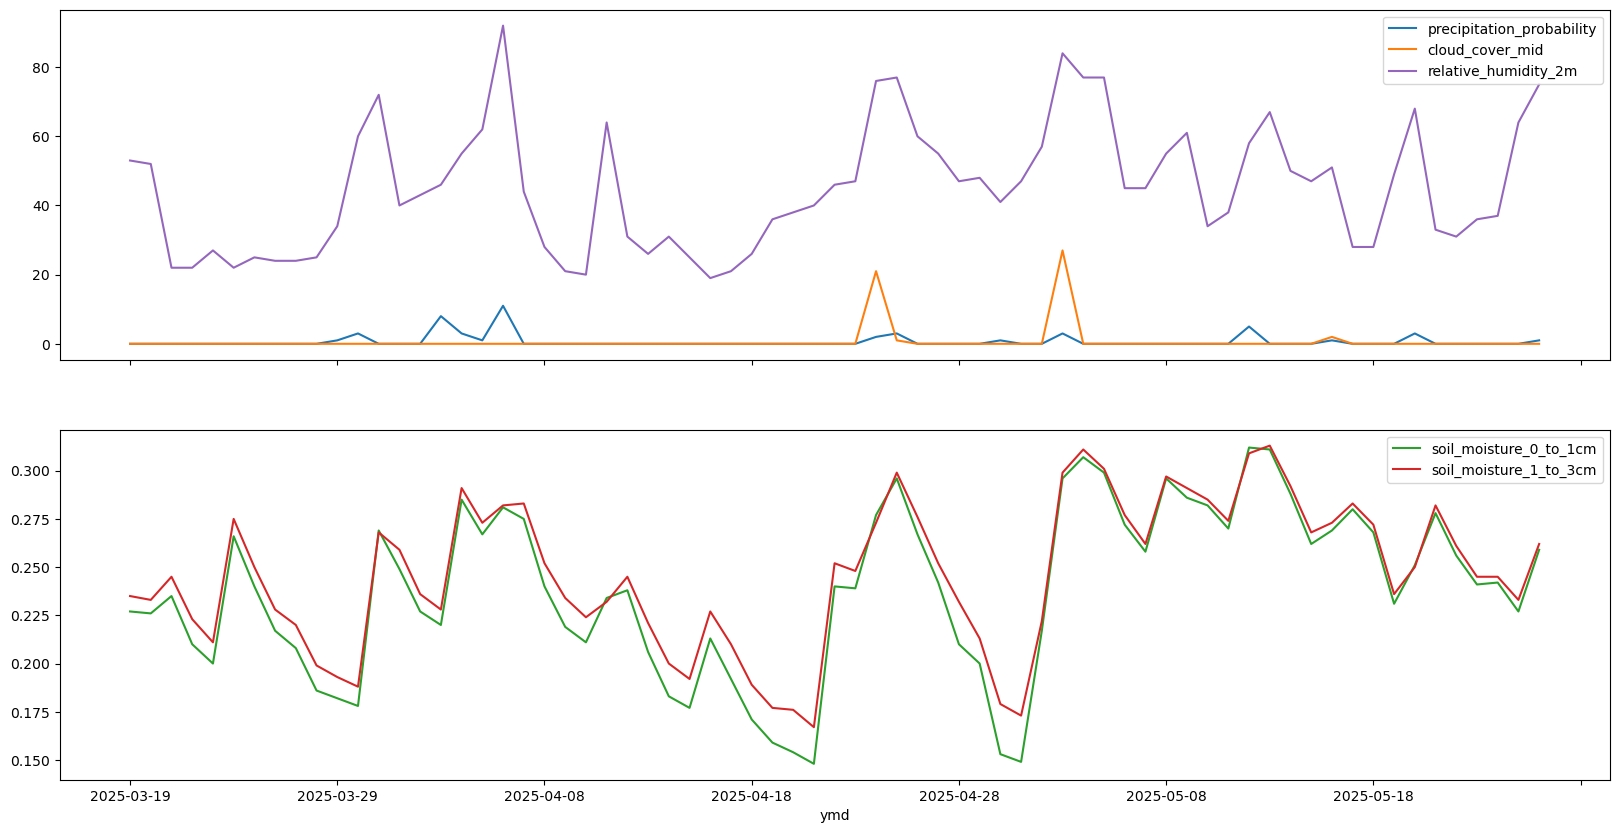

In [241]:
# Find Daily Minimum of Precipitation Probability (Plot)
dfdmin2 = df1.groupby('ymd')[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values('ymd', ascending=True)
dfdmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [242]:
# Find Daily Minimum of relative_humidity_2m (Table)
dfdmin3 = df1.groupby('ymd')[df1h.columns[[4,0]]].min().sort_values(['relative_humidity_2m'], ascending=True).head(5)
dfdmin3

relative_humidity_2m  precipitation_probability
ymd                                                        
2025-04-16                  19.0                        0.0
2025-04-10                  20.0                        0.0
2025-04-09                  21.0                        0.0
2025-04-17                  21.0                        0.0
2025-03-21                  22.0                        0.0

In [243]:
# Observation Result of Daily Minimum Data
# - Fluctuation of 'relative_humidity_2m' is similar to 'soil_moisture_0_to_1cm', different compared to Hourly Minimum Data, 
#   maybe due to longer time scope.

In [244]:
# Find Monthly Minimum values of Precipitation Probability (Table)
dfmmin1 = df1.groupby(['year','month'])[df1h.columns[0:]].min().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True,True,True])
dfmmin1

precipitation_probability  cloud_cover_mid  \
year month                                               
2025 04                           0.0              0.0   
     05                           0.0              0.0   
     03                           0.0              0.0   

            soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
year month                                                   
2025 04                      0.148                   0.167   
     05                      0.149                   0.173   
     03                      0.178                   0.188   

            relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
year month                                                                
2025 04                     19.0     -7.360636                 0.000000   
     05                     28.0      6.472079                 0.000000   
     03                     22.0     -6.138609                 0.047987   

            temperature_2m  cloud_cover_high  cloud_cover_low  wind_speed_10m  \
year month                                                                      
2025 04             0.9025               0.0              0.0        0.360000   
     05             8.1525               0.0              0.0        0.360000   
     03            -2.7975               0.0              0.0        1.018234   

            soil_moisture_3_to_9cm  temperature_80m  soil_temperature_0cm  
year month                                                                 
2025 04                      0.195           0.7605                0.3675  
     05                      0.201           7.1605                7.4675  
     03                      0.206           2.6605               -3.0825

array([<Axes: xlabel='year,month'>, <Axes: xlabel='year,month'>],
      dtype=object)

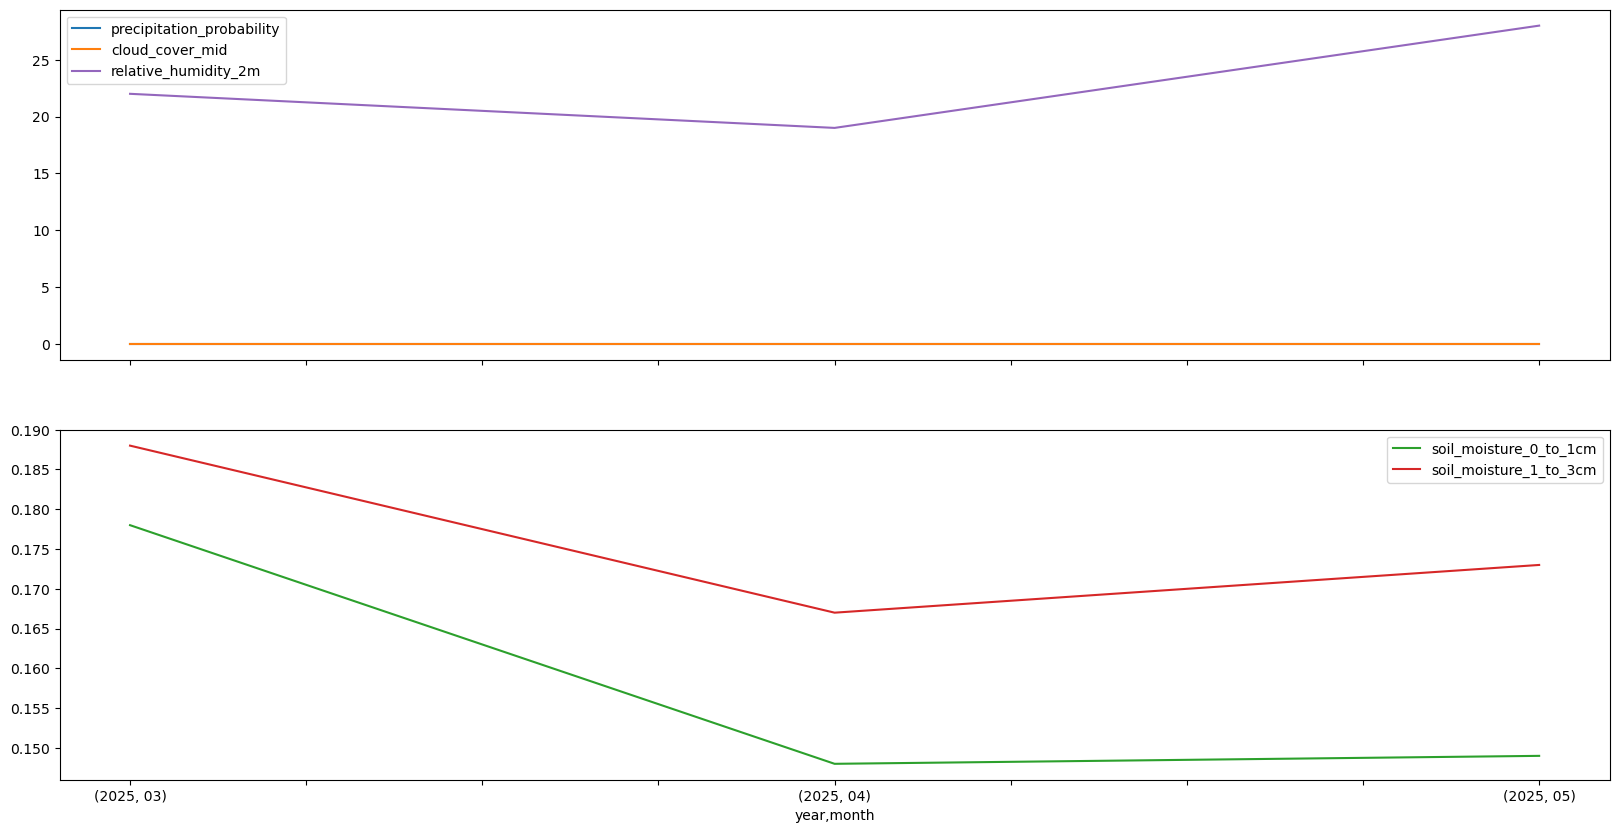

In [245]:
# Find Monthly Minimum values of Precipitation Probability (Plot)
dfmmin2 = df1.groupby(['year','month'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values(by = ['year','month'], ascending=[True,True])
dfmmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [246]:
# Find Monthly Minimum values of Relative Humidity 2m (Table)
dfmmin2 = df1.groupby(['year','month'])[df1h.columns[[4,0]]].min().sort_values(by = ['relative_humidity_2m'], ascending=[True])
dfmmin2

relative_humidity_2m  precipitation_probability
year month                                                 
2025 04                     19.0                        0.0
     03                     22.0                        0.0
     05                     28.0                        0.0

In [247]:
# Find Hourly Minimum values of Precipitation Probability (Table)
dfhmin1 = df1.groupby(['hmstz'])[df1h.columns[0:]].min().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[True,True,True,True,True,True,True,True,True,True])
dfhmin1

precipitation_probability  cloud_cover_mid  \
hmstz                                                        
04:00:00+00:00                        0.0              0.0   
03:00:00+00:00                        0.0              0.0   
02:00:00+00:00                        0.0              0.0   
01:00:00+00:00                        0.0              0.0   
00:00:00+00:00                        0.0              0.0   
07:00:00+00:00                        0.0              0.0   
06:00:00+00:00                        0.0              0.0   
05:00:00+00:00                        0.0              0.0   
08:00:00+00:00                        0.0              0.0   
23:00:00+00:00                        0.0              0.0   
22:00:00+00:00                        0.0              0.0   
21:00:00+00:00                        0.0              0.0   
09:00:00+00:00                        0.0              0.0   
10:00:00+00:00                        0.0              0.0   
11:00:00+00:00                        0.0              0.0   
20:00:00+00:00                        0.0              0.0   
14:00:00+00:00                        0.0              0.0   
12:00:00+00:00                        0.0              0.0   
13:00:00+00:00                        0.0              0.0   
19:00:00+00:00                        0.0              0.0   
15:00:00+00:00                        0.0              0.0   
18:00:00+00:00                        0.0              0.0   
17:00:00+00:00                        0.0              0.0   
16:00:00+00:00                        0.0              0.0   

                soil_moisture_0_to_1cm  soil_moisture_1_to_3cm  \
hmstz                                                            
04:00:00+00:00                   0.148                   0.168   
03:00:00+00:00                   0.148                   0.169   
02:00:00+00:00                   0.148                   0.169   
01:00:00+00:00                   0.148                   0.170   
00:00:00+00:00                   0.148                   0.171   
07:00:00+00:00                   0.149                   0.167   
06:00:00+00:00                   0.149                   0.168   
05:00:00+00:00                   0.149                   0.168   
08:00:00+00:00                   0.150                   0.167   
23:00:00+00:00                   0.153                   0.176   
22:00:00+00:00                   0.154                   0.177   
21:00:00+00:00                   0.157                   0.178   
09:00:00+00:00                   0.158                   0.168   
10:00:00+00:00                   0.159                   0.173   
11:00:00+00:00                   0.160                   0.174   
20:00:00+00:00                   0.160                   0.174   
14:00:00+00:00                   0.161                   0.174   
12:00:00+00:00                   0.161                   0.174   
13:00:00+00:00                   0.162                   0.174   
19:00:00+00:00                   0.163                   0.174   
15:00:00+00:00                   0.164                   0.174   
18:00:00+00:00                   0.167                   0.174   
17:00:00+00:00                   0.170                   0.175   
16:00:00+00:00                   0.172                   0.175   

                relative_humidity_2m  dew_point_2m  vapour_pressure_deficit  \
hmstz                                                                         
04:00:00+00:00                  30.0     -5.247747             5.270660e-02   
03:00:00+00:00                  31.0     -5.802887             6.925583e-02   
02:00:00+00:00                  31.0     -5.230092             0.000000e+00   
01:00:00+00:00                  28.0     -7.360636             1.192093e-07   
00:00:00+00:00                  21.0     -6.458873             3.803062e-02   
07:00:00+00:00                  30.0     -5.318303             1.790810e-02   
06:00:00+00:00                  31.0     -4.884931    

array([<Axes: xlabel='hmstz'>, <Axes: xlabel='hmstz'>], dtype=object)

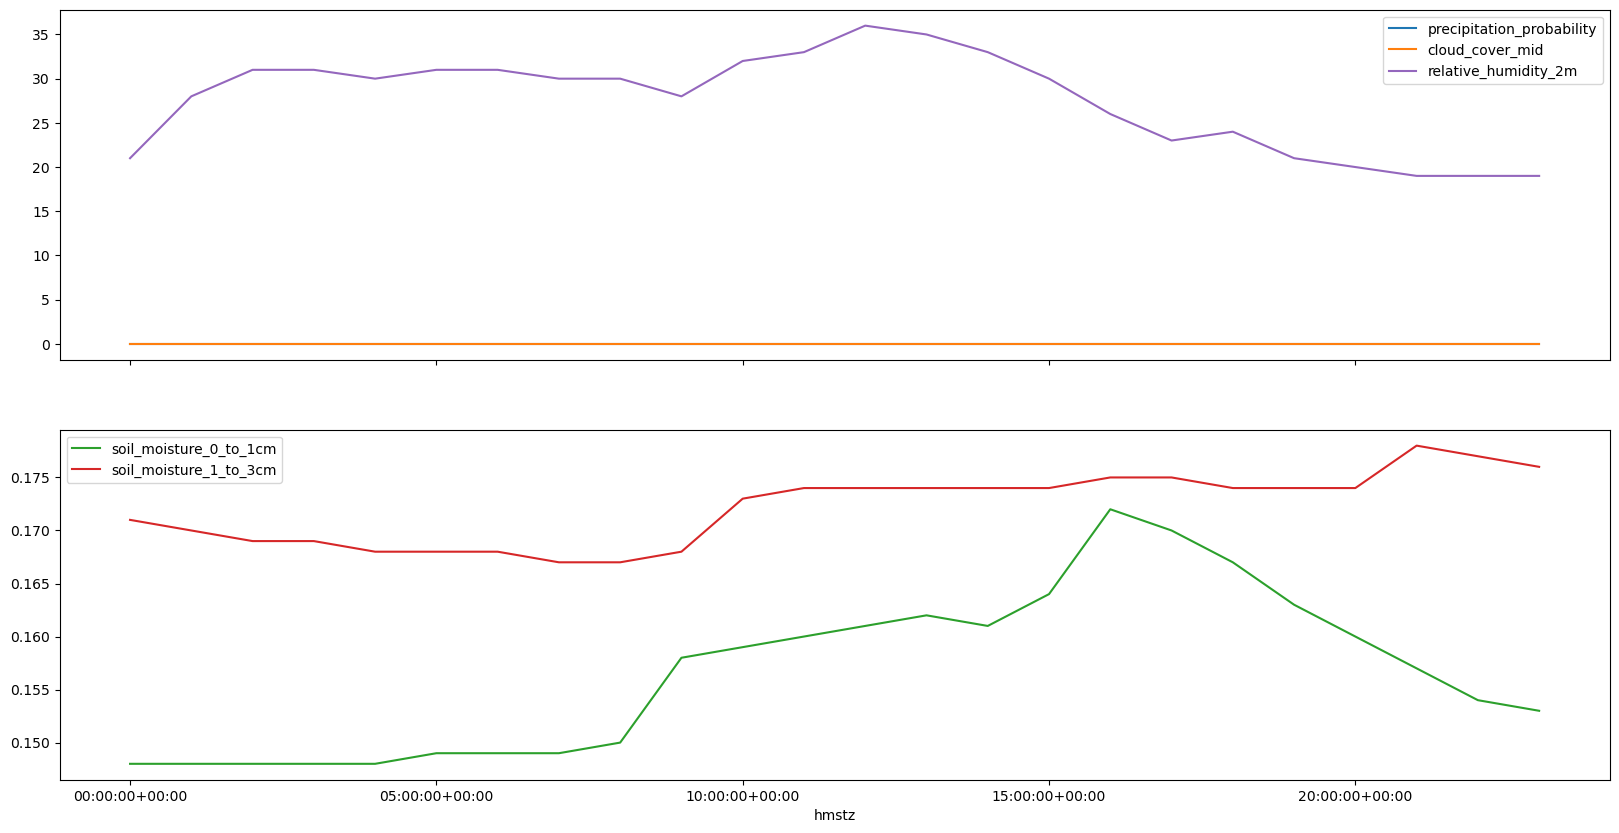

In [248]:
# Find Hourly Minimum values of Precipitation Probability (Plot)
dfhmin2 = df1.groupby(['hmstz'])[['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','relative_humidity_2m']].min().sort_values(by = ['hmstz'], ascending=[True])
dfhmin2.plot(subplots=[('precipitation_probability','cloud_cover_mid','relative_humidity_2m'),('soil_moisture_0_to_1cm','soil_moisture_1_to_3cm')])

In [249]:
# Find Hourly Minimum values of Relative Humidity 2m (Table)
dfhmin2 = df1.groupby(['hmstz'])[df1h.columns[[4,0]]].min().sort_values(by = ['relative_humidity_2m'], ascending=[True])
dfhmin2

relative_humidity_2m  precipitation_probability
hmstz                                                          
23:00:00+00:00                  19.0                        0.0
21:00:00+00:00                  19.0                        0.0
22:00:00+00:00                  19.0                        0.0
20:00:00+00:00                  20.0                        0.0
19:00:00+00:00                  21.0                        0.0
00:00:00+00:00                  21.0                        0.0
17:00:00+00:00                  23.0                        0.0
18:00:00+00:00                  24.0                        0.0
16:00:00+00:00                  26.0                        0.0
09:00:00+00:00                  28.0                        0.0
01:00:00+00:00                  28.0                        0.0
07:00:00+00:00                  30.0                        0.0
08:00:00+00:00                  30.0                        0.0
04:00:00+00:00                  30.0                        0.0
15:00:00+00:00                  30.0                        0.0
06:00:00+00:00                  31.0                        0.0
02:00:00+00:00                  31.0                        0.0
05:00:00+00:00                  31.0                        0.0
03:00:00+00:00                  31.0                        0.0
10:00:00+00:00                  32.0                        0.0
14:00:00+00:00                  33.0                        0.0
11:00:00+00:00                  33.0                        0.0
13:00:00+00:00                  35.0                        0.0
12:00:00+00:00                  36.0                        0.0

In [250]:
# Observation result:
# - When the minimum value of 'relative_humidity_2m' rises, the min value of 'soil_moisture_0_to_1cm' doesn't immediately rise, but instead, steadily almost flat. Maybe, it's due to part of liquid water in the soil vaporize and change into water vapour, so increase the relative humidity of air (near the soil).
# - When 'relative_humidity_2m' falls, the value of 'soil_moisture_0_to_1cm' doesn't immediately falls, but instead, in contrary, rises big enough. Maybe, it's due to part of water vapour in the air near the soil condensates and add liquid water in the soil so the soil moisture increases.

# Mode value of a Column (for sample, we take 'temperature_2m' Column)

In [251]:
# Find Mode value if not rounded
dfmod = df1.mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod = dfmod.dropna()
dfmod
# The result is 17.4525 if we don't do any number rounding. But this result in the most cases, maybe is not the best mode at all.

Unnamed: 0                       date  temperature_2m  \
0         581  2025-03-19 05:00:00+00:00         17.4525   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                  92.0     15.176124             17.777193   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1017.5   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0          990.0348        100.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     12200.0        3.096837                   0.265   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                   0.268                   0.283                    0.274   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                     0.288                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                      0.0        8.311245   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0        13.991941        17.654688               180.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                180.0          16.1605   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0           16.4605           17.3675               17.9675   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0               19.4675              17.067501                14.1675   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0           17.64  Nashville  2025-03-20  05:00:00+00:00  2025    04  20   05   

  minute  sectz tzsec  
0     00  00+00    00

In [252]:
dfmoda = df1[(df1['temperature_2m'] >= 17.45245) &  (df1['temperature_2m'] < 17.45255)] #.where(df1['temperature_2m'] == 19)
dfmoda = dfmoda.dropna()
print(dfmoda['temperature_2m'])
len(dfmoda)
# The result: the temperature of 17.4525 only occurred 11 times out of 1651 data samples.

920     17.4525
1354    17.4525
1396    17.4525
1491    17.4525
1530    17.4525
1768    17.4525
1777    17.4525
1802    17.4525
1900    17.4525
2117    17.4525
2223    17.4525
Name: temperature_2m, dtype: float64


11

In [253]:
# Find Mode value precise to 0 decimal number
dfmod0 = df1.round(0).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod0 = dfmod0.dropna()
dfmod0
# The result is 19 if we round it to the nearest integer (0 decimal number)

Unnamed: 0                       date  temperature_2m  \
0         581  2025-03-19 05:00:00+00:00            19.0   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                  92.0          16.0                  19.0   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1018.0   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0            1000.0        100.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     12200.0             5.0                     0.0   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                     0.0                     0.0                      0.0   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                       0.0                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                      0.0            13.0   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0             20.0             19.0               180.0               176.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                185.0                200.0             16.0   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0              16.0              17.0                  18.0   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                  19.0                   20.0                   17.0   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0            10.0  Nashville  2025-03-20  05:00:00+00:00  2025    04  20   05   

  minute  sectz tzsec  
0     00  00+00    00

In [254]:
# Find out how many occurrences of 'temperature_2m' rounded to 19C (0 decimal number)
dfmod0a = df1[(df1['temperature_2m'] >= 18.5) &  (df1['temperature_2m'] < 19.5)]
dfmod0a = dfmod0a.dropna()
print(dfmod0a['temperature_2m'])
# The result: temperature of 19C occurred 127 times out of 1651 data samples.
# This is far more occurences than if we use the 17.4525C (4 decimal numbers)

596     19.0995
597     19.2995
600     18.9995
666     18.7525
695     19.1025
         ...   
2198    19.0525
2205    19.2025
2208    19.4525
2209    18.8525
2225    19.0025
Name: temperature_2m, Length: 127, dtype: float64


In [255]:
# Find Mode value of Precipitation Probability (Table) precise to 1 decimal number
dfmod1 = df1.round(1).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod1 = dfmod1.dropna()
dfmod1

Unnamed: 0                       date  temperature_2m  \
0         581  2025-03-19 05:00:00+00:00            19.7   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                  92.0          15.6                  16.2   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1017.5   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0             998.8        100.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     12200.0             5.2                     0.3   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                     0.3                     0.3                      0.3   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                       0.3                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                      0.2            17.3   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0             26.5             17.7               180.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                180.0             16.2   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0              17.5              17.4                  18.0   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                  19.5                   20.2                   14.2   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0            17.6  Nashville  2025-03-20  05:00:00+00:00  2025    04  20   05   

  minute  sectz tzsec  
0     00  00+00    00

In [256]:
# Find out how many occurrences of 'temperature_2m' rounded to 19.7C (1 decimal number)
dfmod1a = df1[(df1['temperature_2m'] >= 19.65) &  (df1['temperature_2m'] < 19.75)] #.where(df1['temperature_2m'] == 19)
dfmod1a = dfmod1a.dropna()
print(dfmod1a['temperature_2m'])
len(dfmod1a)
# The result: the temperature of 19.7C occurred only 18 times out of 1651 data samples.

828     19.6525
909     19.6525
1119    19.6525
1272    19.6525
1299    19.7025
1430    19.6525
1468    19.6525
1469    19.7025
1484    19.7025
1486    19.6525
1512    19.7025
1637    19.7025
1651    19.6525
1791    19.7025
1874    19.7025
1875    19.6525
2048    19.7025
2089    19.6525
Name: temperature_2m, dtype: float64


18

In [257]:
# Find Mode value of Precipitation Probability (Table) precise to 2 decimal numbers
dfmod2 = df1.round(2).mode().sort_values(by = ['precipitation_probability','cloud_cover_mid','soil_moisture_0_to_1cm','soil_moisture_1_to_3cm','soil_moisture_3_to_9cm','cloud_cover_low',
            'relative_humidity_2m','cloud_cover_high','dew_point_2m',
            'vapour_pressure_deficit'], ascending=[False,False,False,False,False,False,False,False,False,False])
dfmod2 = dfmod2.dropna()
dfmod2

Unnamed: 0                       date  temperature_2m  \
0         581  2025-03-19 05:00:00+00:00           17.45   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                  92.0          8.75                 16.18   

   precipitation_probability  precipitation  rain  showers  pressure_msl  \
0                        0.0            0.0   0.0      0.0        1017.5   

   surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0            998.63        100.0              0.0              0.0   

   cloud_cover_high  visibility  wind_speed_10m  soil_moisture_0_to_1cm  \
0               0.0     12200.0             3.1                    0.28   

   soil_moisture_1_to_3cm  soil_moisture_3_to_9cm  soil_moisture_9_to_27cm  \
0                    0.24                    0.28                     0.28   

   soil_moisture_27_to_81cm  evapotranspiration  snowfall  snow_depth  \
0                      0.29                 0.0       0.0         0.0   

   et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_80m  \
0                         0.0                     0.15            8.31   

   wind_speed_120m  wind_speed_180m  wind_direction_10m  wind_direction_80m  \
0            19.11            17.65               180.0               180.0   

   wind_direction_120m  wind_direction_180m  temperature_80m  \
0                180.0                180.0            16.16   

   temperature_120m  temperature_180m  soil_temperature_0cm  \
0             16.46             17.37                 17.97   

   soil_temperature_6cm  soil_temperature_18cm  soil_temperature_54cm  \
0                 19.47                  17.07                  14.17   

   wind_gusts_10m   Location         ymd           hmstz  year month day hour  \
0           17.64  Nashville  2025-03-20  05:00:00+00:00  2025    04  20   05   

  minute  sectz tzsec  
0     00  00+00    00

In [258]:
# Find out how many occurrences of 'temperature_2m' rounded to 17.45C (2 decimal numbers)
dfmod2a = df1[(df1['temperature_2m'] >= 17.445) &  (df1['temperature_2m'] < 17.455)] #.where(df1['temperature_2m'] == 19)
dfmod2a = dfmod2a.dropna()
print(dfmod2a['temperature_2m'])
len(dfmod2a)
# The result: the temperature of 17.45C occurred only 11 times out of 1651 data samples. This is perfectly the same as if we don't round it.

920     17.4525
1354    17.4525
1396    17.4525
1491    17.4525
1530    17.4525
1768    17.4525
1777    17.4525
1802    17.4525
1900    17.4525
2117    17.4525
2223    17.4525
Name: temperature_2m, dtype: float64


11

In [259]:
# CONCLUSION: to get the nearest possible Mode value of a Column (in this sample, we take 'temperature_2m'), we can't just take the real values
# but, instead, maybe we have to round it to the nearest integer/whole number.

# Standard Deviation and Outliers of Precipitation Probability

In [260]:
# Function Definition
def find_outliers_iqr(series):
       Q1 = series.quantile(0.25)
       print('Q1 = ', Q1)
       Q2 = series.quantile(0.50)
       print('Q2 = ', Q2)
       Q3 = series.quantile(0.75)
       print('Q3 = ', Q3)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       print('Lower Bound = ', lower_bound)
       upper_bound = Q3 + 1.5 * IQR
       print('Upper Bound = ', upper_bound)
       outliers = series[(series < lower_bound) | (series > upper_bound)]
       return outliers

In [261]:
##### Standard Deviation of 'precipitation_probability'
df1stdevpp = df1[['precipitation_probability']].std() #.sort_values(ascending=False)
df1stdevpp

precipitation_probability    16.726911
dtype: float64

In [262]:
df1[['precipitation_probability']].mean()

precipitation_probability    8.011508
dtype: float64

<Axes: ylabel='Density'>

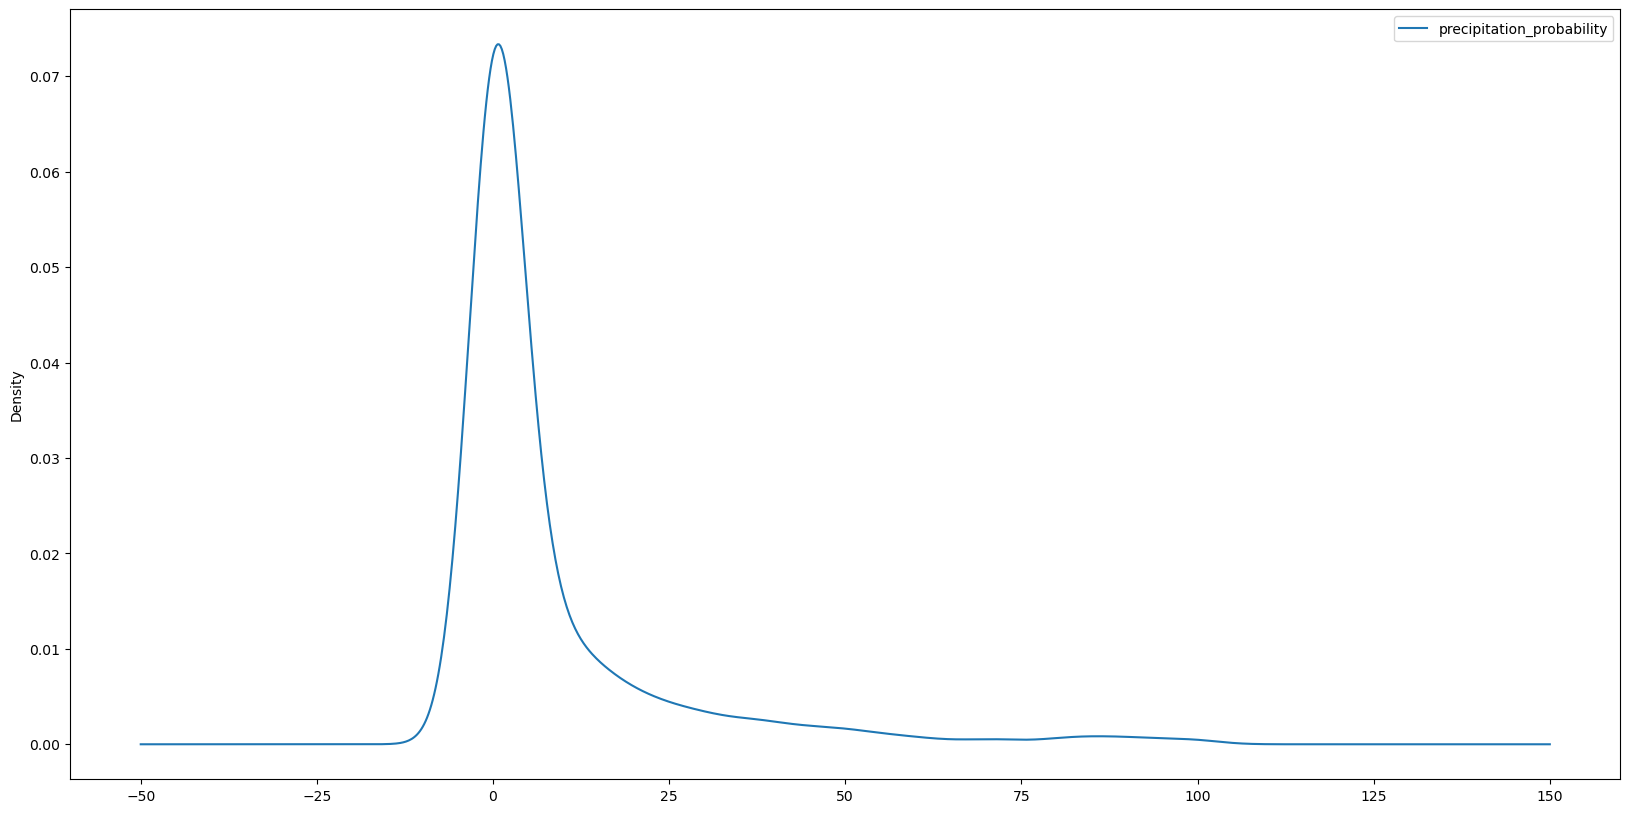

In [263]:
# Distribution Plot of 'precipitation_probability'
df1[['precipitation_probability']].plot.kde()

In [264]:
##### Outliers of 'precipitation_probability'
# Quantiles of 'precipitation_probability'
# Note: either Lower Bound and/or Upper Bound doesn't have to be exist at all in the Dataset.
find_outliers_iqr(df1[['precipitation_probability']]).dropna().sort_values(by='precipitation_probability', ascending=False)

Q1 =  precipitation_probability    0.0
Name: 0.25, dtype: float64
Q2 =  precipitation_probability    1.0
Name: 0.5, dtype: float64
Q3 =  precipitation_probability    7.0
Name: 0.75, dtype: float64
Lower Bound =  precipitation_probability   -10.5
dtype: float64
Upper Bound =  precipitation_probability    17.5
dtype: float64


precipitation_probability
1015                      100.0
1013                      100.0
1017                      100.0
1014                      100.0
1016                       99.0
...                         ...
847                        18.0
1034                       18.0
862                        18.0
1035                       18.0
693                        18.0

[239 rows x 1 columns]

<Axes: >

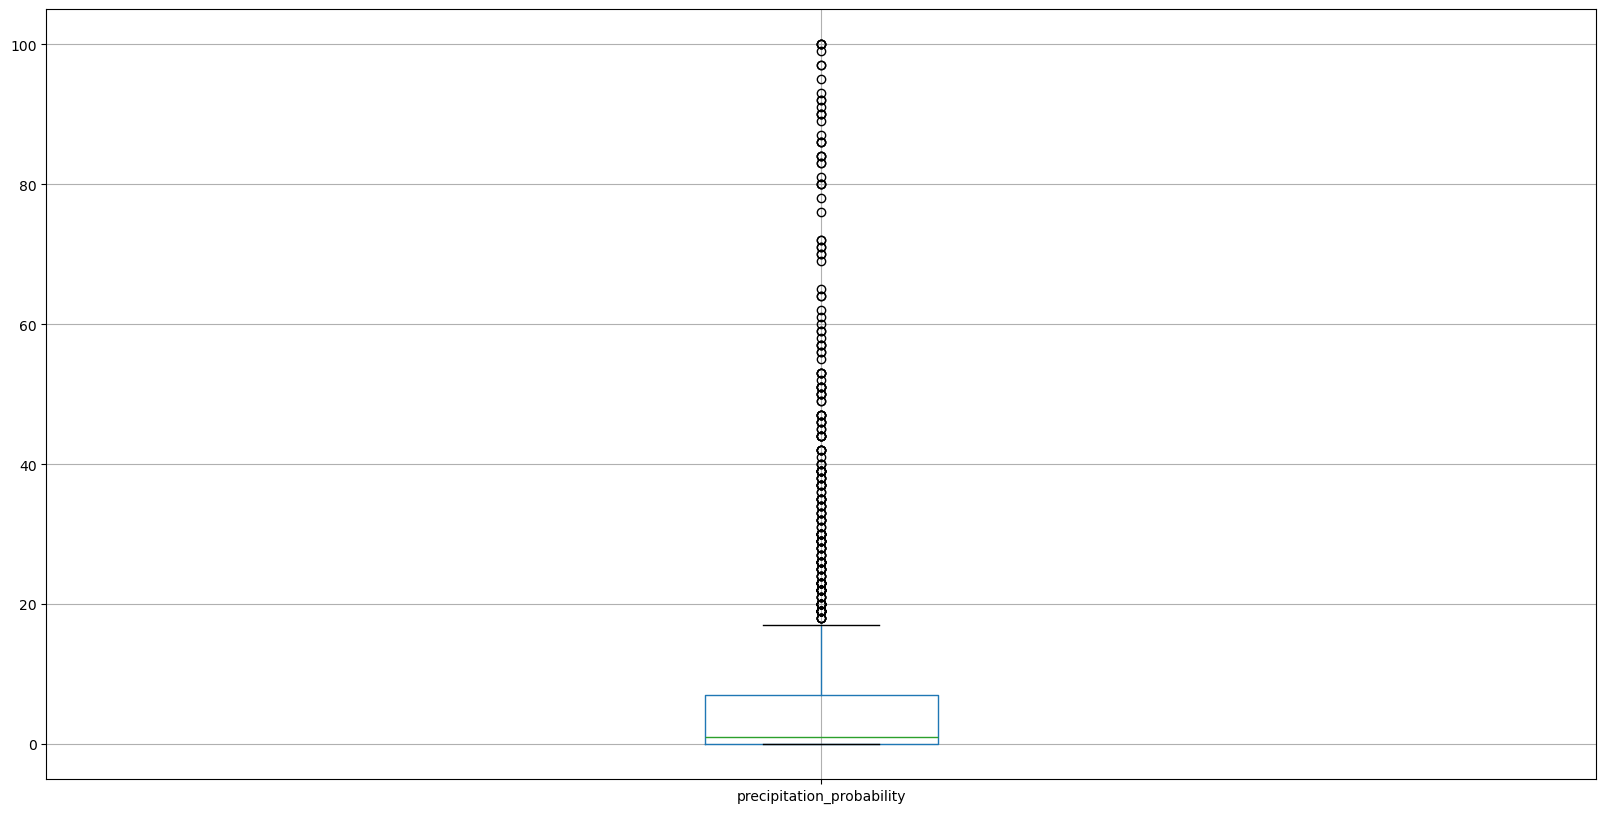

In [265]:
# Box Plot of 'precipitation_probability'
# Note:
# Top black horizontal line is Upper Bound value
# Bottom black horizontal line is Lower Bound value
# Lower blue line is 25 percentile
# Green line is Median a.k.a 50 percentile
# Upper blue line is 75 percentile
df1[['precipitation_probability']].boxplot()

<Axes: xlabel='date', ylabel='precipitation_probability'>

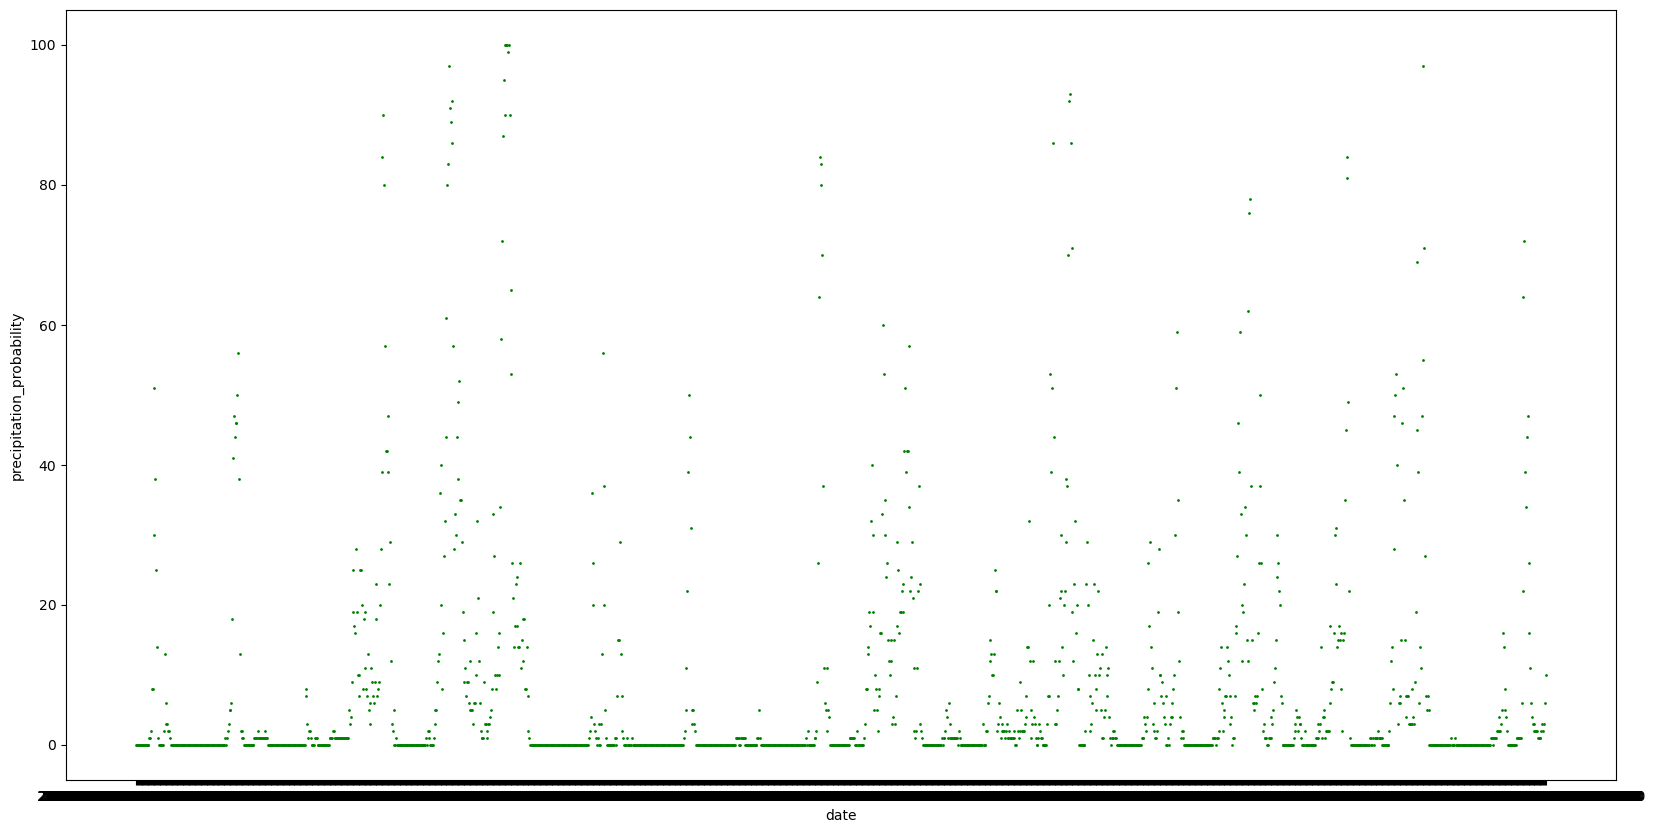

In [266]:
# Draw the Scatter Plot of 'precipitation_probability'
# We can see that the dots are concentrated at below/bottom (below the Upper Bound of 17.5)
import matplotlib.pyplot as plt
df1[['date','precipitation_probability']].plot.scatter(x='date', y='precipitation_probability', s=1, c='green')

In [267]:
##### Standard Deviation of 'temperature_2m'
df1stdevtemp = df1[['temperature_2m']].std() #.sort_values(ascending=False)
df1stdevtemp

temperature_2m    6.09753
dtype: float64

In [268]:
df1[['temperature_2m']].mean()

temperature_2m    17.995103
dtype: float64

In [269]:
df1[['temperature_2m']].max()

temperature_2m    30.8525
dtype: float64

<Axes: ylabel='Density'>

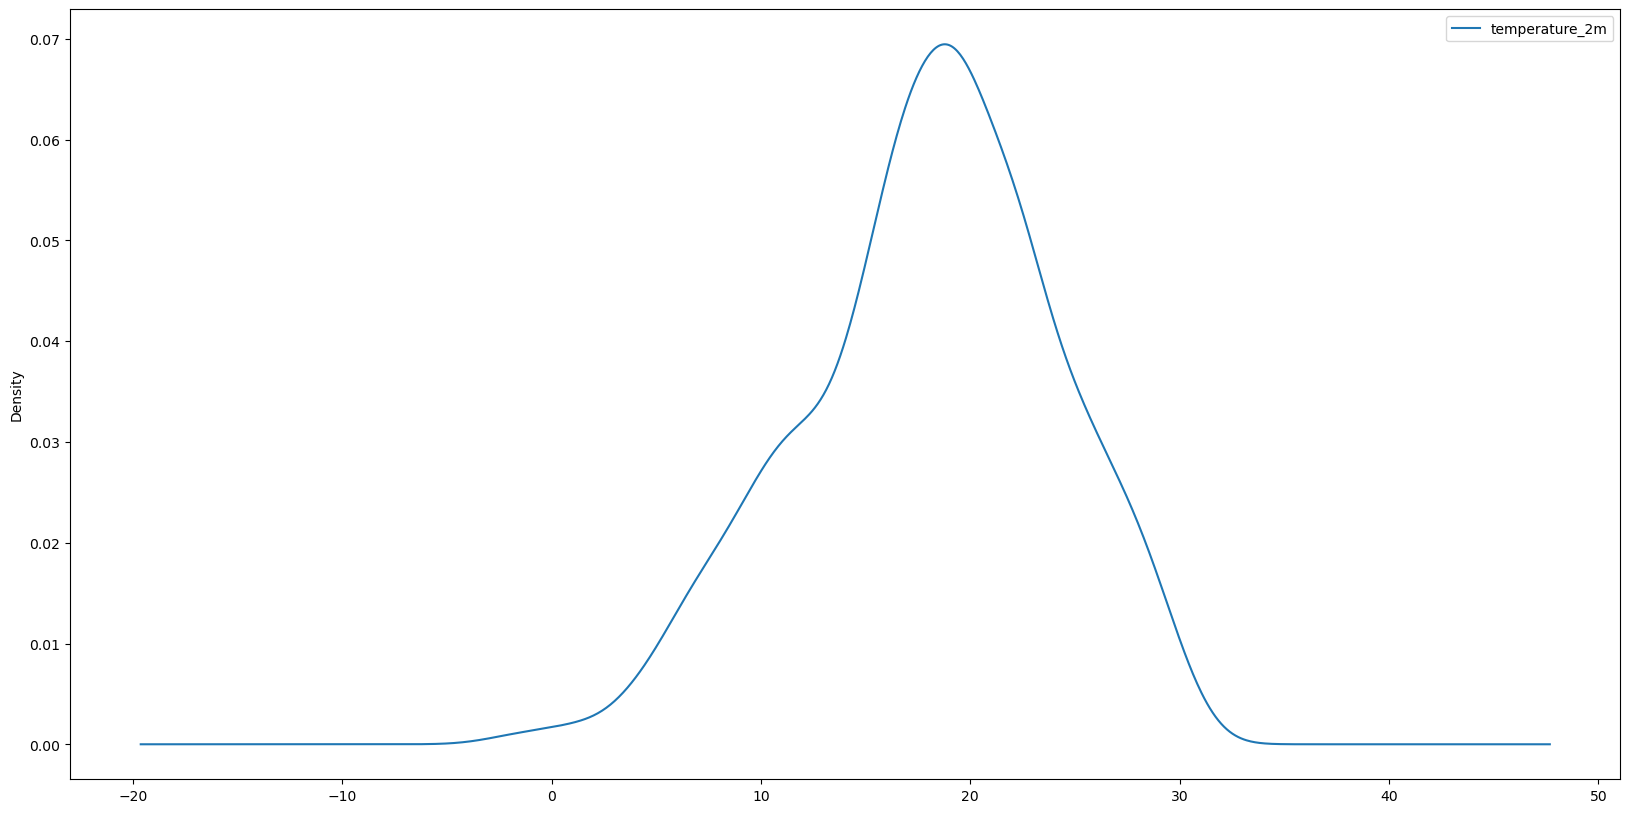

In [270]:
df1[['temperature_2m']].plot.kde()

In [271]:
##### Outliers of 'temperature_2m'
# Quantiles of 'temperature_2m'
# Note: either Lower Bound and/or Upper Bound doesn't have to be exist at all in the Dataset.
outlierstemp = find_outliers_iqr(df1[['temperature_2m']])
print(outlierstemp.dropna().sort_values(by='temperature_2m', ascending=False))

Q1 =  temperature_2m    14.252501
Name: 0.25, dtype: float64
Q2 =  temperature_2m    18.5525
Name: 0.5, dtype: float64
Q3 =  temperature_2m    22.2025
Name: 0.75, dtype: float64
Lower Bound =  temperature_2m    2.327502
dtype: float64
Upper Bound =  temperature_2m    34.127499
dtype: float64
      temperature_2m
1087          2.3025
1088          1.8525
629           1.6025
1089          1.4525
1092          1.3525
630           1.0025
1090          1.0025
1091          0.9025
631          -0.0975
637          -0.2975
632          -0.6475
633          -1.2975
634          -1.4975
635          -1.9975
636          -2.7975


<Axes: >

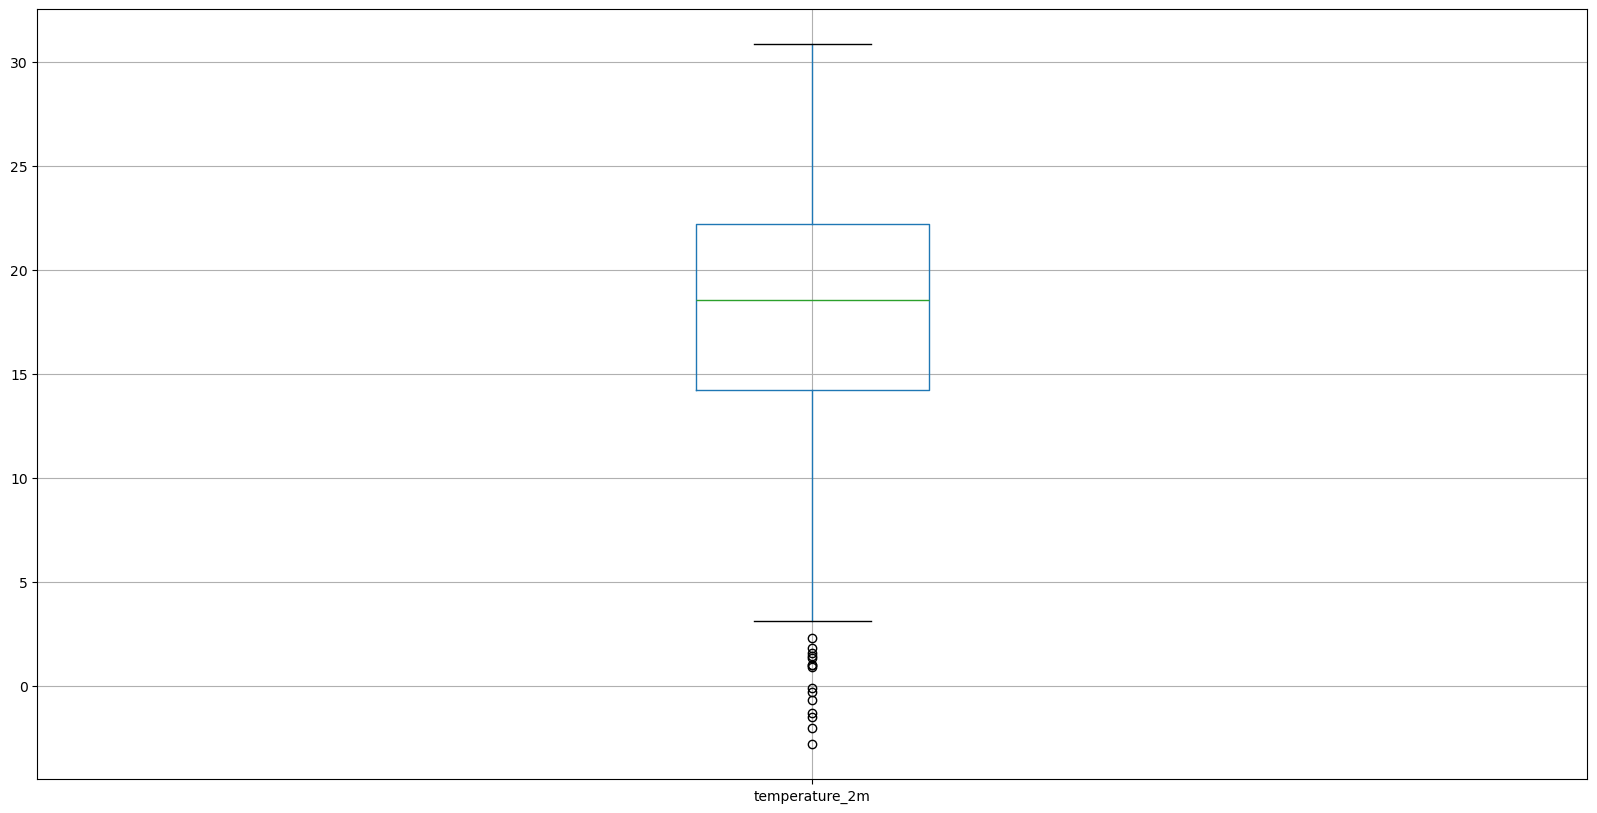

In [272]:
# Box Plot of 'temperature_2m'
# Note:
# Top black horizontal line is Upper Bound value
# Bottom black horizontal line is Lower Bound value
# Lower blue line is 25 percentile
# Green line is Median a.k.a 50 percentile
# Upper blue line is 75 percentile
df1[['temperature_2m']].boxplot()

<Axes: xlabel='date', ylabel='temperature_2m'>

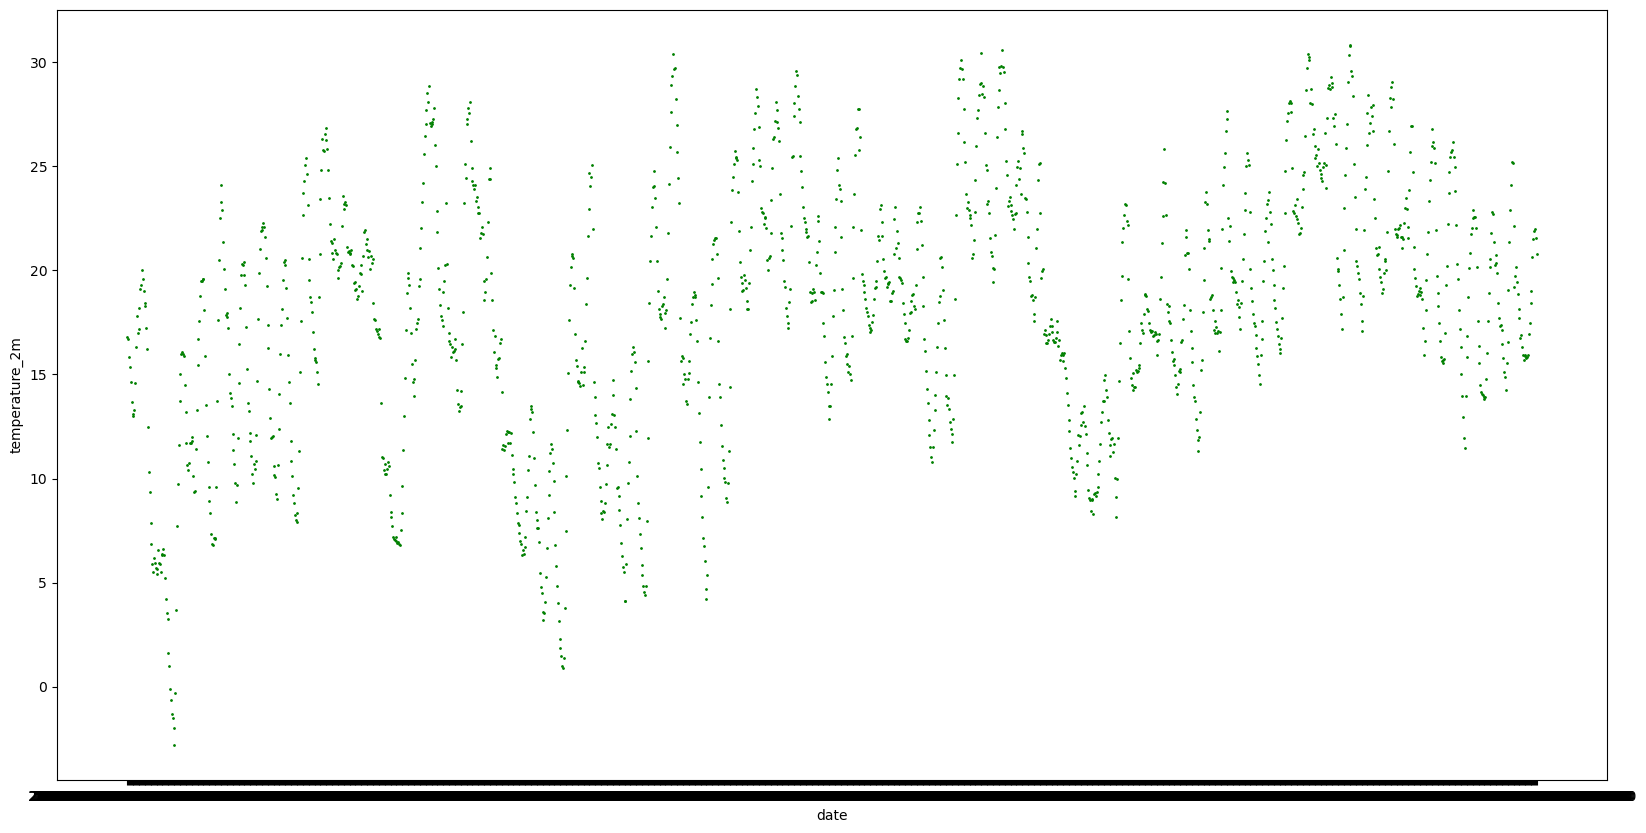

In [273]:
# Draw the Scatter Plot of 'temperature_2m'
# We can see that the dots are concentrated at below/bottom (below the Upper Bound of 17.5)
import matplotlib.pyplot as plt
df1[['date','temperature_2m']].plot.scatter(x='date', y='temperature_2m', s=1, c='green')

<Axes: >

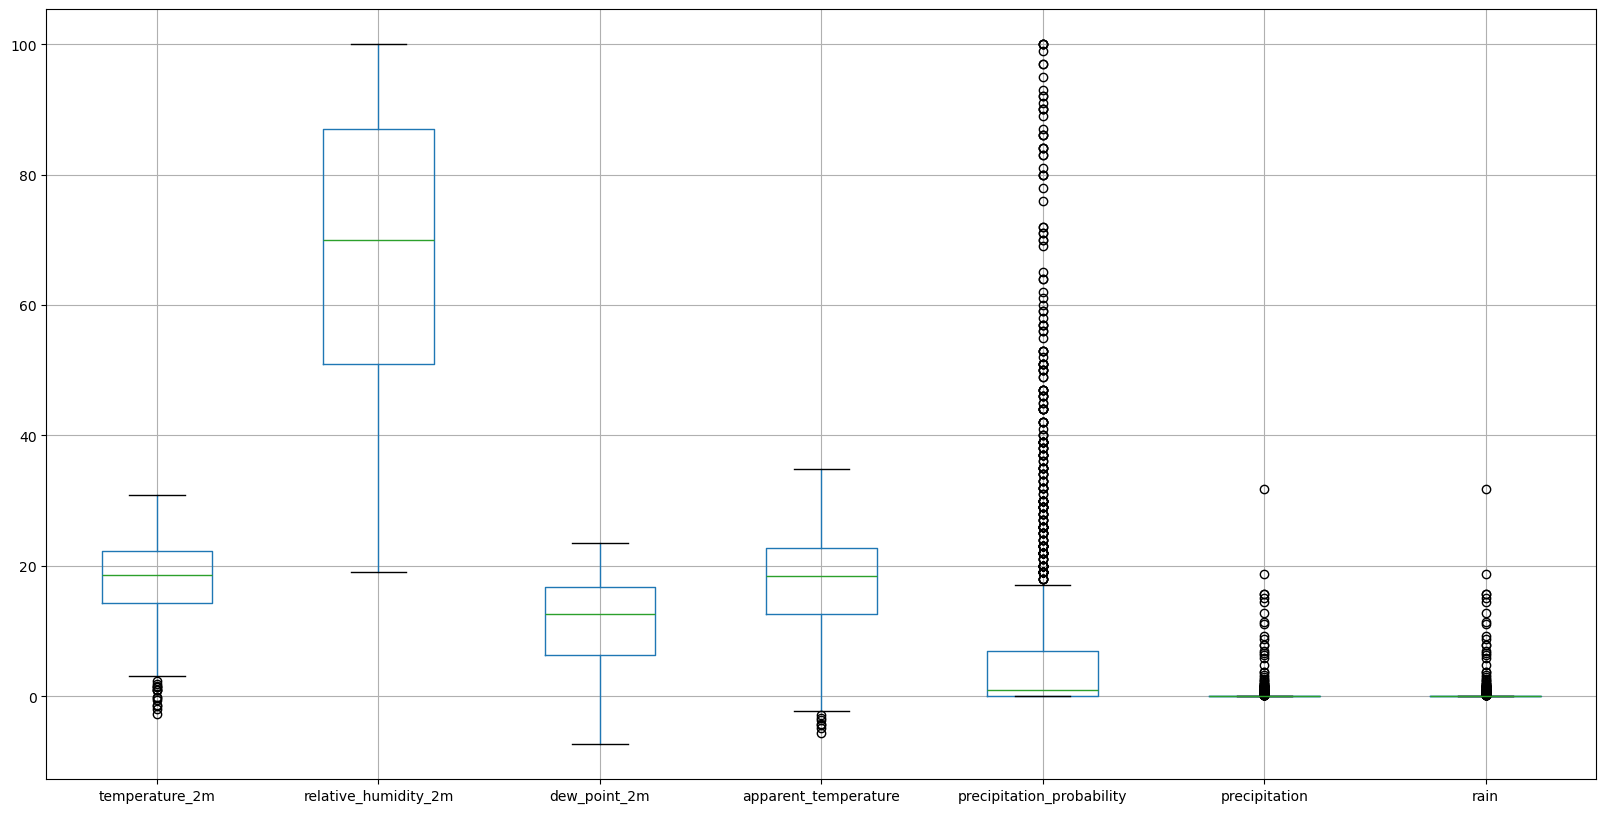

In [274]:
# Boxplot of all Columns
df1[df1.columns[1:9]].boxplot()

<Axes: >

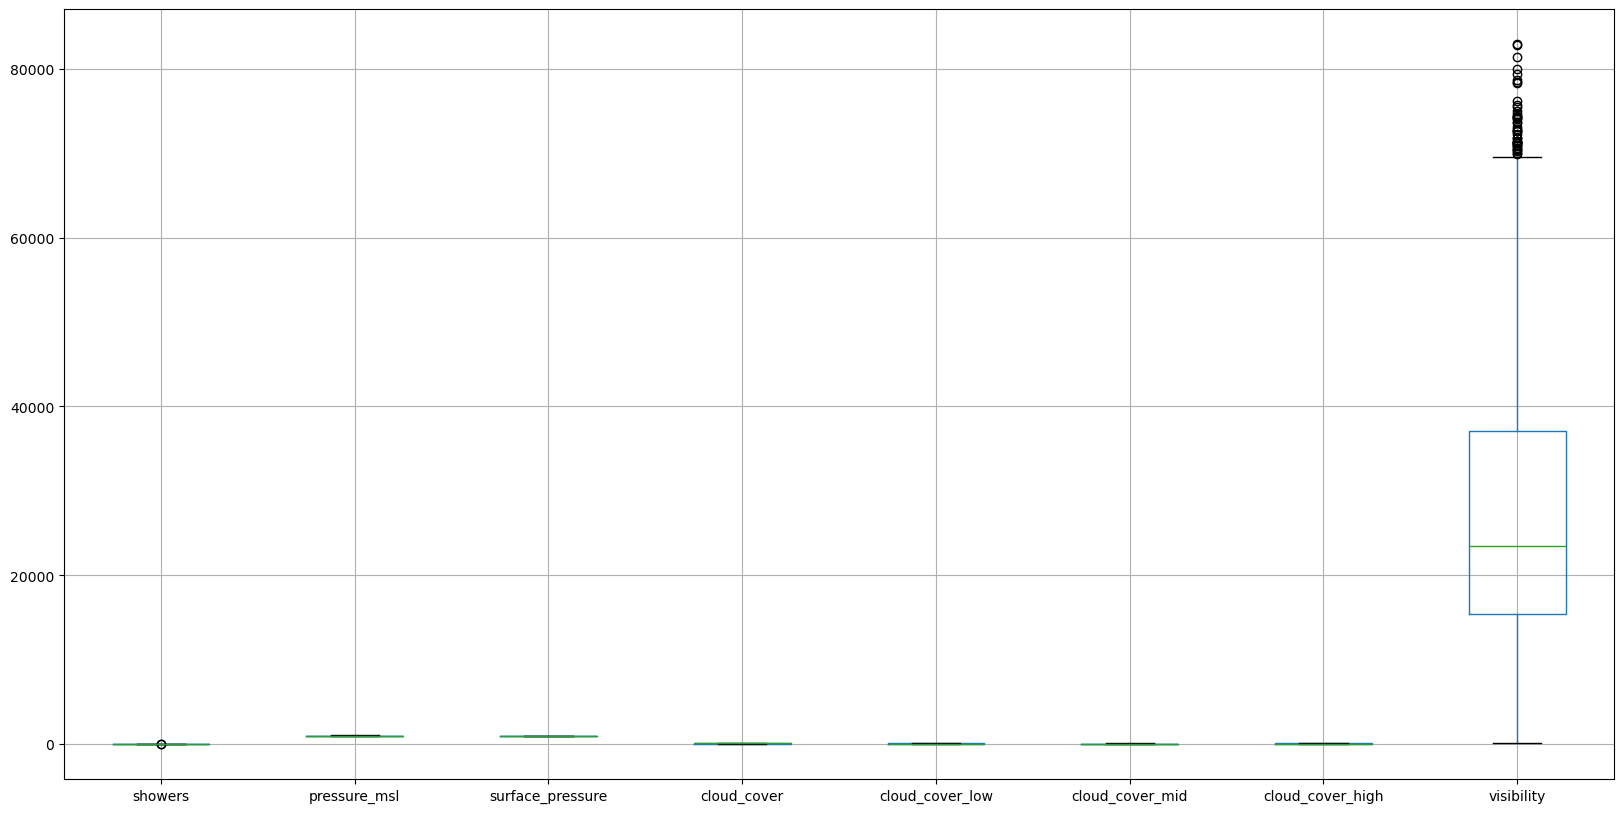

In [275]:
df1[df1.columns[9:17]].boxplot()

<Axes: >

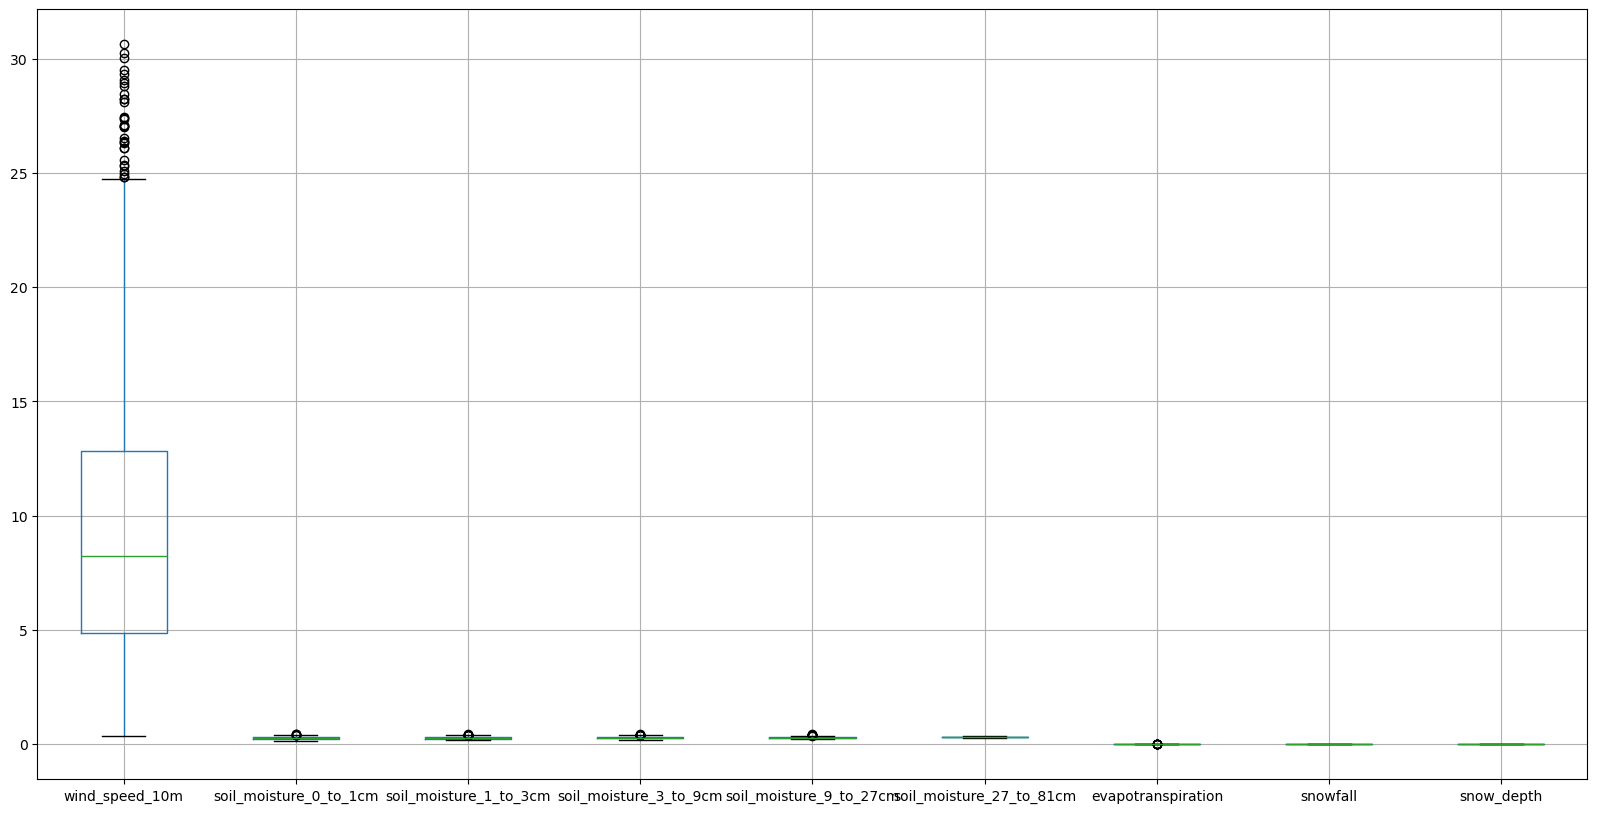

In [276]:
df1[df1.columns[17:26]].boxplot()

<Axes: >

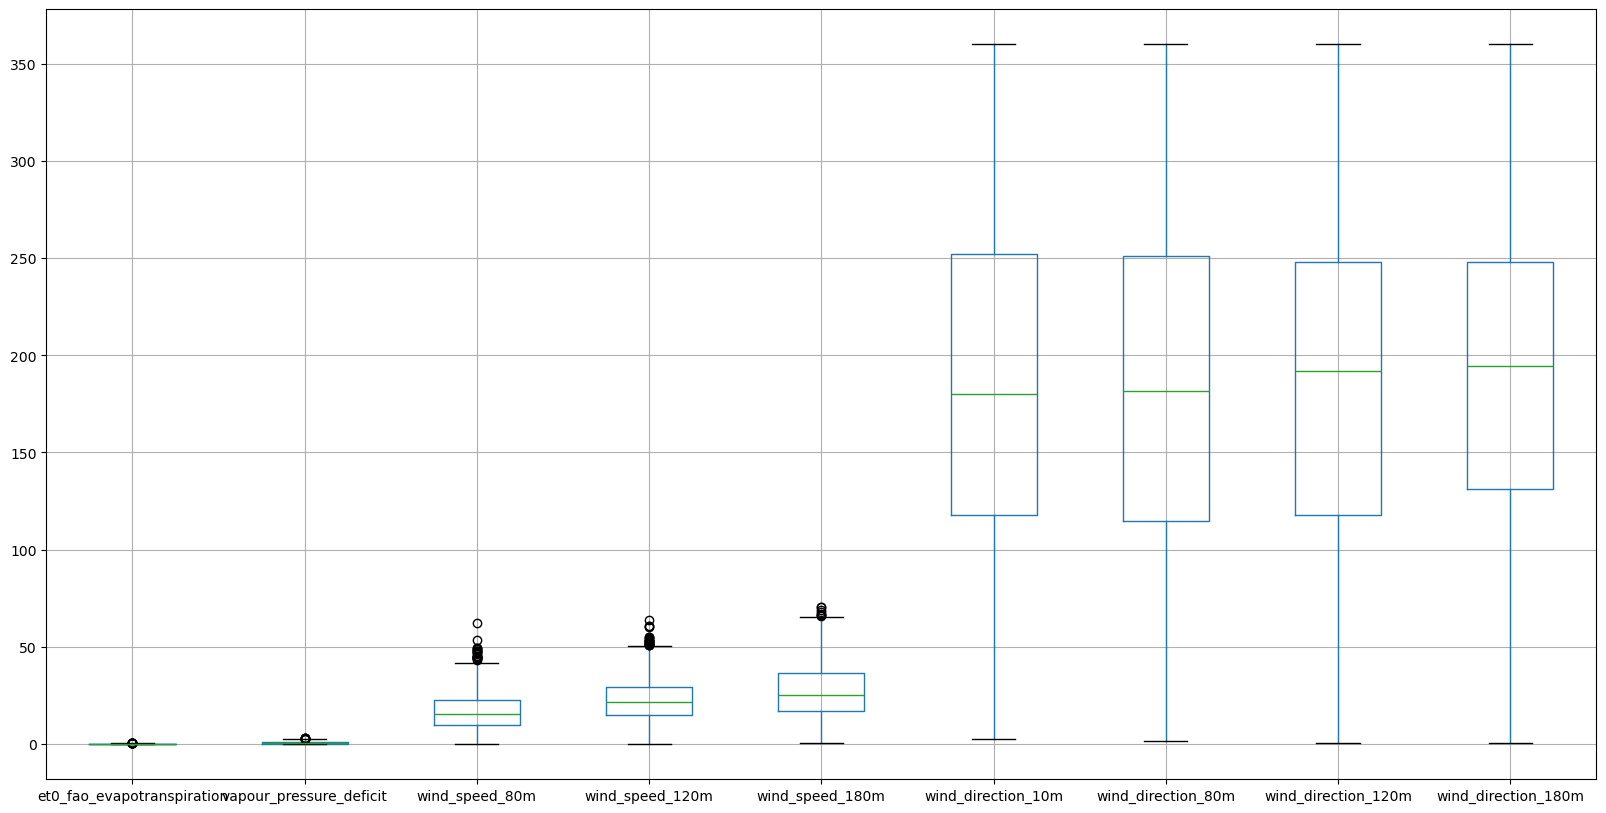

In [277]:
df1[df1.columns[26:35]].boxplot()

<Axes: >

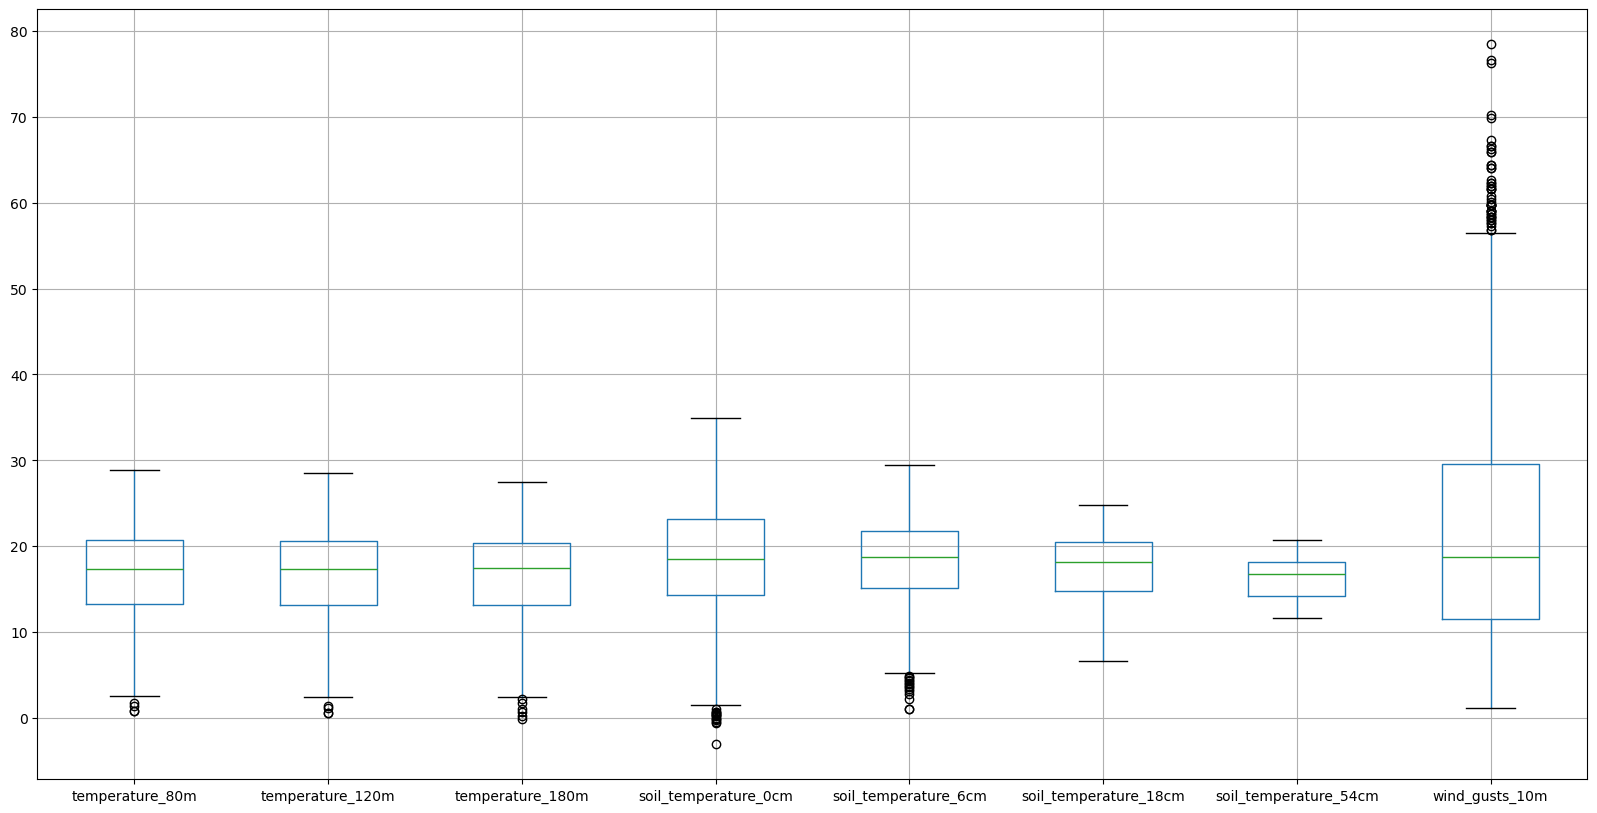

In [278]:
df1[df1.columns[35:]].boxplot()